# 1. Environment Setup and Installation

In [19]:
# Install required packages
!pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn plotly streamlit


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# set up plotting configurations for jupyter
plt.style.use('default')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# configure pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Environment setup complete")

Environment setup complete


# 2. Data Loading and Initial Exploration

In [21]:
# Load the dataset from UCI repository
from ucimlrepo import fetch_ucirepo

In [22]:
# fetch the online retail dataset
online_retail = fetch_ucirepo(id=352)
df = online_retail.data.features

In [23]:
# display basic information about the dataset
print("="*60)
print("Dataset Overview")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024*2:.2f} MB")

Dataset Overview
Dataset shape: (541909, 6)
Columns: ['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Memory usage: 239079.65 MB


In [24]:
# Display first few rows
print("\n🔍 First 5 rows:")
display(df.head())


🔍 First 5 rows:


Description  Quantity     InvoiceDate  UnitPrice  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6  12/1/2010 8:26       2.55   
1                  WHITE METAL LANTERN         6  12/1/2010 8:26       3.39   
2       CREAM CUPID HEARTS COAT HANGER         8  12/1/2010 8:26       2.75   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6  12/1/2010 8:26       3.39   
4       RED WOOLLY HOTTIE WHITE HEART.         6  12/1/2010 8:26       3.39   

   CustomerID         Country  
0     17850.0  United Kingdom  
1     17850.0  United Kingdom  
2     17850.0  United Kingdom  
3     17850.0  United Kingdom  
4     17850.0  United Kingdom

In [25]:
# Display data types and basic info
print("\n📋 Data Types:")
display(df.dtypes)


📋 Data Types:


Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [26]:
print("\n📈 Dataset Info:")
df.info()


📈 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB


# 3. Data Quality Assessment

In [27]:
# Comprehensive data quality check
print("="*60)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# First, convert InvoiceDate to datetime if it's not already
if df['InvoiceDate'].dtype == 'object':
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    print("✅ Converted InvoiceDate to datetime format")

# Missing values analysis
print("Missing Values:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)
display(missing_df)

# Unique values analysis
print("\n📊 Unique Values per Column:")
unique_values = df.nunique().sort_values(ascending=False)
display(unique_values)

# Check for problematic data
print("\n⚠️ Data Quality Issues:")
print(f"Negative quantities: {(df['Quantity'] < 0).sum():,}")
print(f"Negative prices: {(df['UnitPrice'] < 0).sum():,}")
print(f"Zero prices: {(df['UnitPrice'] == 0).sum():,}")
print(f"Missing CustomerIDs: {df['CustomerID'].isnull().sum():,}")

# Date range analysis (now with proper datetime objects)
print(f"\n📅 Date Range Analysis:")
print(f"First transaction: {df['InvoiceDate'].min()}")
print(f"Last transaction: {df['InvoiceDate'].max()}")
print(f"Total time period: {(df['InvoiceDate'].max() - df['InvoiceDate'].min()).days} days")

# Sample problematic records
print("\n🔍 Sample records with negative quantities:")
if (df['Quantity'] < 0).sum() > 0:
    display(df[df['Quantity'] < 0].head())
else:
    print("No negative quantities found!")


🔍 DATA QUALITY ASSESSMENT
✅ Converted InvoiceDate to datetime format
Missing Values:


Missing Count  Missing Percentage
CustomerID          135080           24.926694
Description           1454            0.268311
Quantity                 0            0.000000
InvoiceDate              0            0.000000
UnitPrice                0            0.000000
Country                  0            0.000000


📊 Unique Values per Column:


InvoiceDate    23260
CustomerID      4372
Description     4223
UnitPrice       1630
Quantity         722
Country           38
dtype: int64


⚠️ Data Quality Issues:
Negative quantities: 10,624
Negative prices: 2
Zero prices: 2,515
Missing CustomerIDs: 135,080

📅 Date Range Analysis:
First transaction: 2010-12-01 08:26:00
Last transaction: 2011-12-09 12:50:00
Total time period: 373 days

🔍 Sample records with negative quantities:


Description  Quantity         InvoiceDate  \
141                          Discount        -1 2010-12-01 09:41:00   
154   SET OF 3 COLOURED  FLYING DUCKS        -1 2010-12-01 09:49:00   
235    PLASTERS IN TIN CIRCUS PARADE        -12 2010-12-01 10:24:00   
236  PACK OF 12 PINK PAISLEY TISSUES        -24 2010-12-01 10:24:00   
237  PACK OF 12 BLUE PAISLEY TISSUES        -24 2010-12-01 10:24:00   

     UnitPrice  CustomerID         Country  
141      27.50     14527.0  United Kingdom  
154       4.65     15311.0  United Kingdom  
235       1.65     17548.0  United Kingdom  
236       0.29     17548.0  United Kingdom  
237       0.29     17548.0  United Kingdom

In [28]:
# Data cleaning function
def clean_data(df):
    """
    Clean the retail dataset for customer segmentation analysis
    """
    print("🧹 CLEANING DATA...")
    print(f"Original dataset shape: {df.shape}")
    
    # Remove records with missing CustomerIDs
    df_clean = df.dropna(subset=['CustomerID'])
    print(f"After removing missing CustomerIDs: {df_clean.shape} ({len(df) - len(df_clean):,} removed)")
    
    # Remove negative quantities (returns/cancellations)
    df_clean = df_clean[df_clean['Quantity'] > 0]
    print(f"After removing negative quantities: {df_clean.shape}")
    
    # Remove negative or zero prices
    df_clean = df_clean[df_clean['UnitPrice'] > 0]
    print(f"After removing invalid prices: {df_clean.shape}")
    
    # Convert data types
    df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)
    df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])
    
    # Create TotalAmount column
    df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']
    
    # Remove extreme outliers (transactions over $10,000)
    df_clean = df_clean[df_clean['TotalAmount'] <= 10000]
    print(f"After removing extreme outliers: {df_clean.shape}")
    
    # Final data quality check
    print(f"\n✅ Data cleaning complete!")
    print(f"Records removed: {len(df) - len(df_clean):,} ({((len(df) - len(df_clean)) / len(df) * 100):.1f}%)")
    print(f"Final dataset shape: {df_clean.shape}")
    
    return df_clean

# Apply cleaning
df_clean = clean_data(df)

# Display cleaned data summary
print("\n📊 Cleaned Data Summary:")
display(df_clean.describe())

# Show sample of cleaned data
print("\n🔍 Sample of cleaned data:")
display(df_clean.head())


🧹 CLEANING DATA...
Original dataset shape: (541909, 6)
After removing missing CustomerIDs: (406829, 6) (135,080 removed)
After removing negative quantities: (397924, 6)
After removing invalid prices: (397884, 6)
After removing extreme outliers: (397881, 7)

✅ Data cleaning complete!
Records removed: 144,028 (26.6%)
Final dataset shape: (397881, 7)

📊 Cleaned Data Summary:


Quantity                    InvoiceDate      UnitPrice  \
count  397881.000000                         397881  397881.000000   
mean       12.598093  2011-07-10 23:41:34.914459136       3.114871   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 14:39:00       1.950000   
75%        12.000000            2011-10-20 14:33:00       3.750000   
max      4800.000000            2011-12-09 12:50:00    8142.750000   
std        42.885991                            NaN      22.074187   

          CustomerID    TotalAmount  
count  397881.000000  397881.000000  
mean    15294.428462      21.681821  
min     12347.000000       0.001000  
25%     13969.000000       4.680000  
50%     15159.000000      11.800000  
75%     16795.000000      19.800000  
max     18287.000000    8142.750000  
std      1713.140641      73.719532


🔍 Sample of cleaned data:


Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  TotalAmount  
0       2.55       17850  United Kingdom        15.30  
1       3.39       17850  United Kingdom        20.34  
2       2.75       17850  United Kingdom        22.00  
3       3.39       17850  United Kingdom        20.34  
4       3.39       17850  United Kingdom        20.34

📊 CUSTOMER BEHAVIOR ANALYSIS
Available columns in df_clean:
['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']

Invoice-related columns: ['InvoiceDate']
Using unique dates as proxy for order counting...
Total unique customers: 4,337
Average orders per customer: 4.25
Average spending per customer: $1989.11

📈 Customer Behavior Statistics:


CustomerID   OrderCount     TotalItems     TotalSpent  \
count   4337.000000  4337.000000    4337.000000    4337.000000   
mean   15301.089232     4.251095    1155.762509    1989.113373   
min    12347.000000     1.000000       1.000000       2.900000   
25%    13814.000000     1.000000     160.000000     307.090000   
50%    15300.000000     2.000000     379.000000     673.260000   
75%    16779.000000     5.000000     991.000000    1661.060000   
max    18287.000000   210.000000  196915.000000  280206.020000   
std     1721.422291     7.636059    4771.712489    8532.426721   

                       FirstPurchase                   LastPurchase  \
count                           4337                           4337   
mean   2011-04-30 17:40:48.752593920  2011-09-08 11:48:18.718007808   
min              2010-12-01 08:26:00            2010-12-01 09:53:00   
25%              2011-01-17 11:12:00            2011-07-20 14:16:00   
50%              2011-04-05 10:13:00            2011-10-20 10:34:00   
75%              2011-08-19 10:51:00            2011-11-22 10:59:00   
max              2011-12-09 12:16:00            2011-12-09 12:50:00   
std                              NaN                            NaN   

       CustomerLifetime  
count       4337.000000  
mean         130.431635  
min            0.000000  
25%            0.000000  
50%           92.000000  
75%          252.000000  
max          373.000000  
std          132.050054

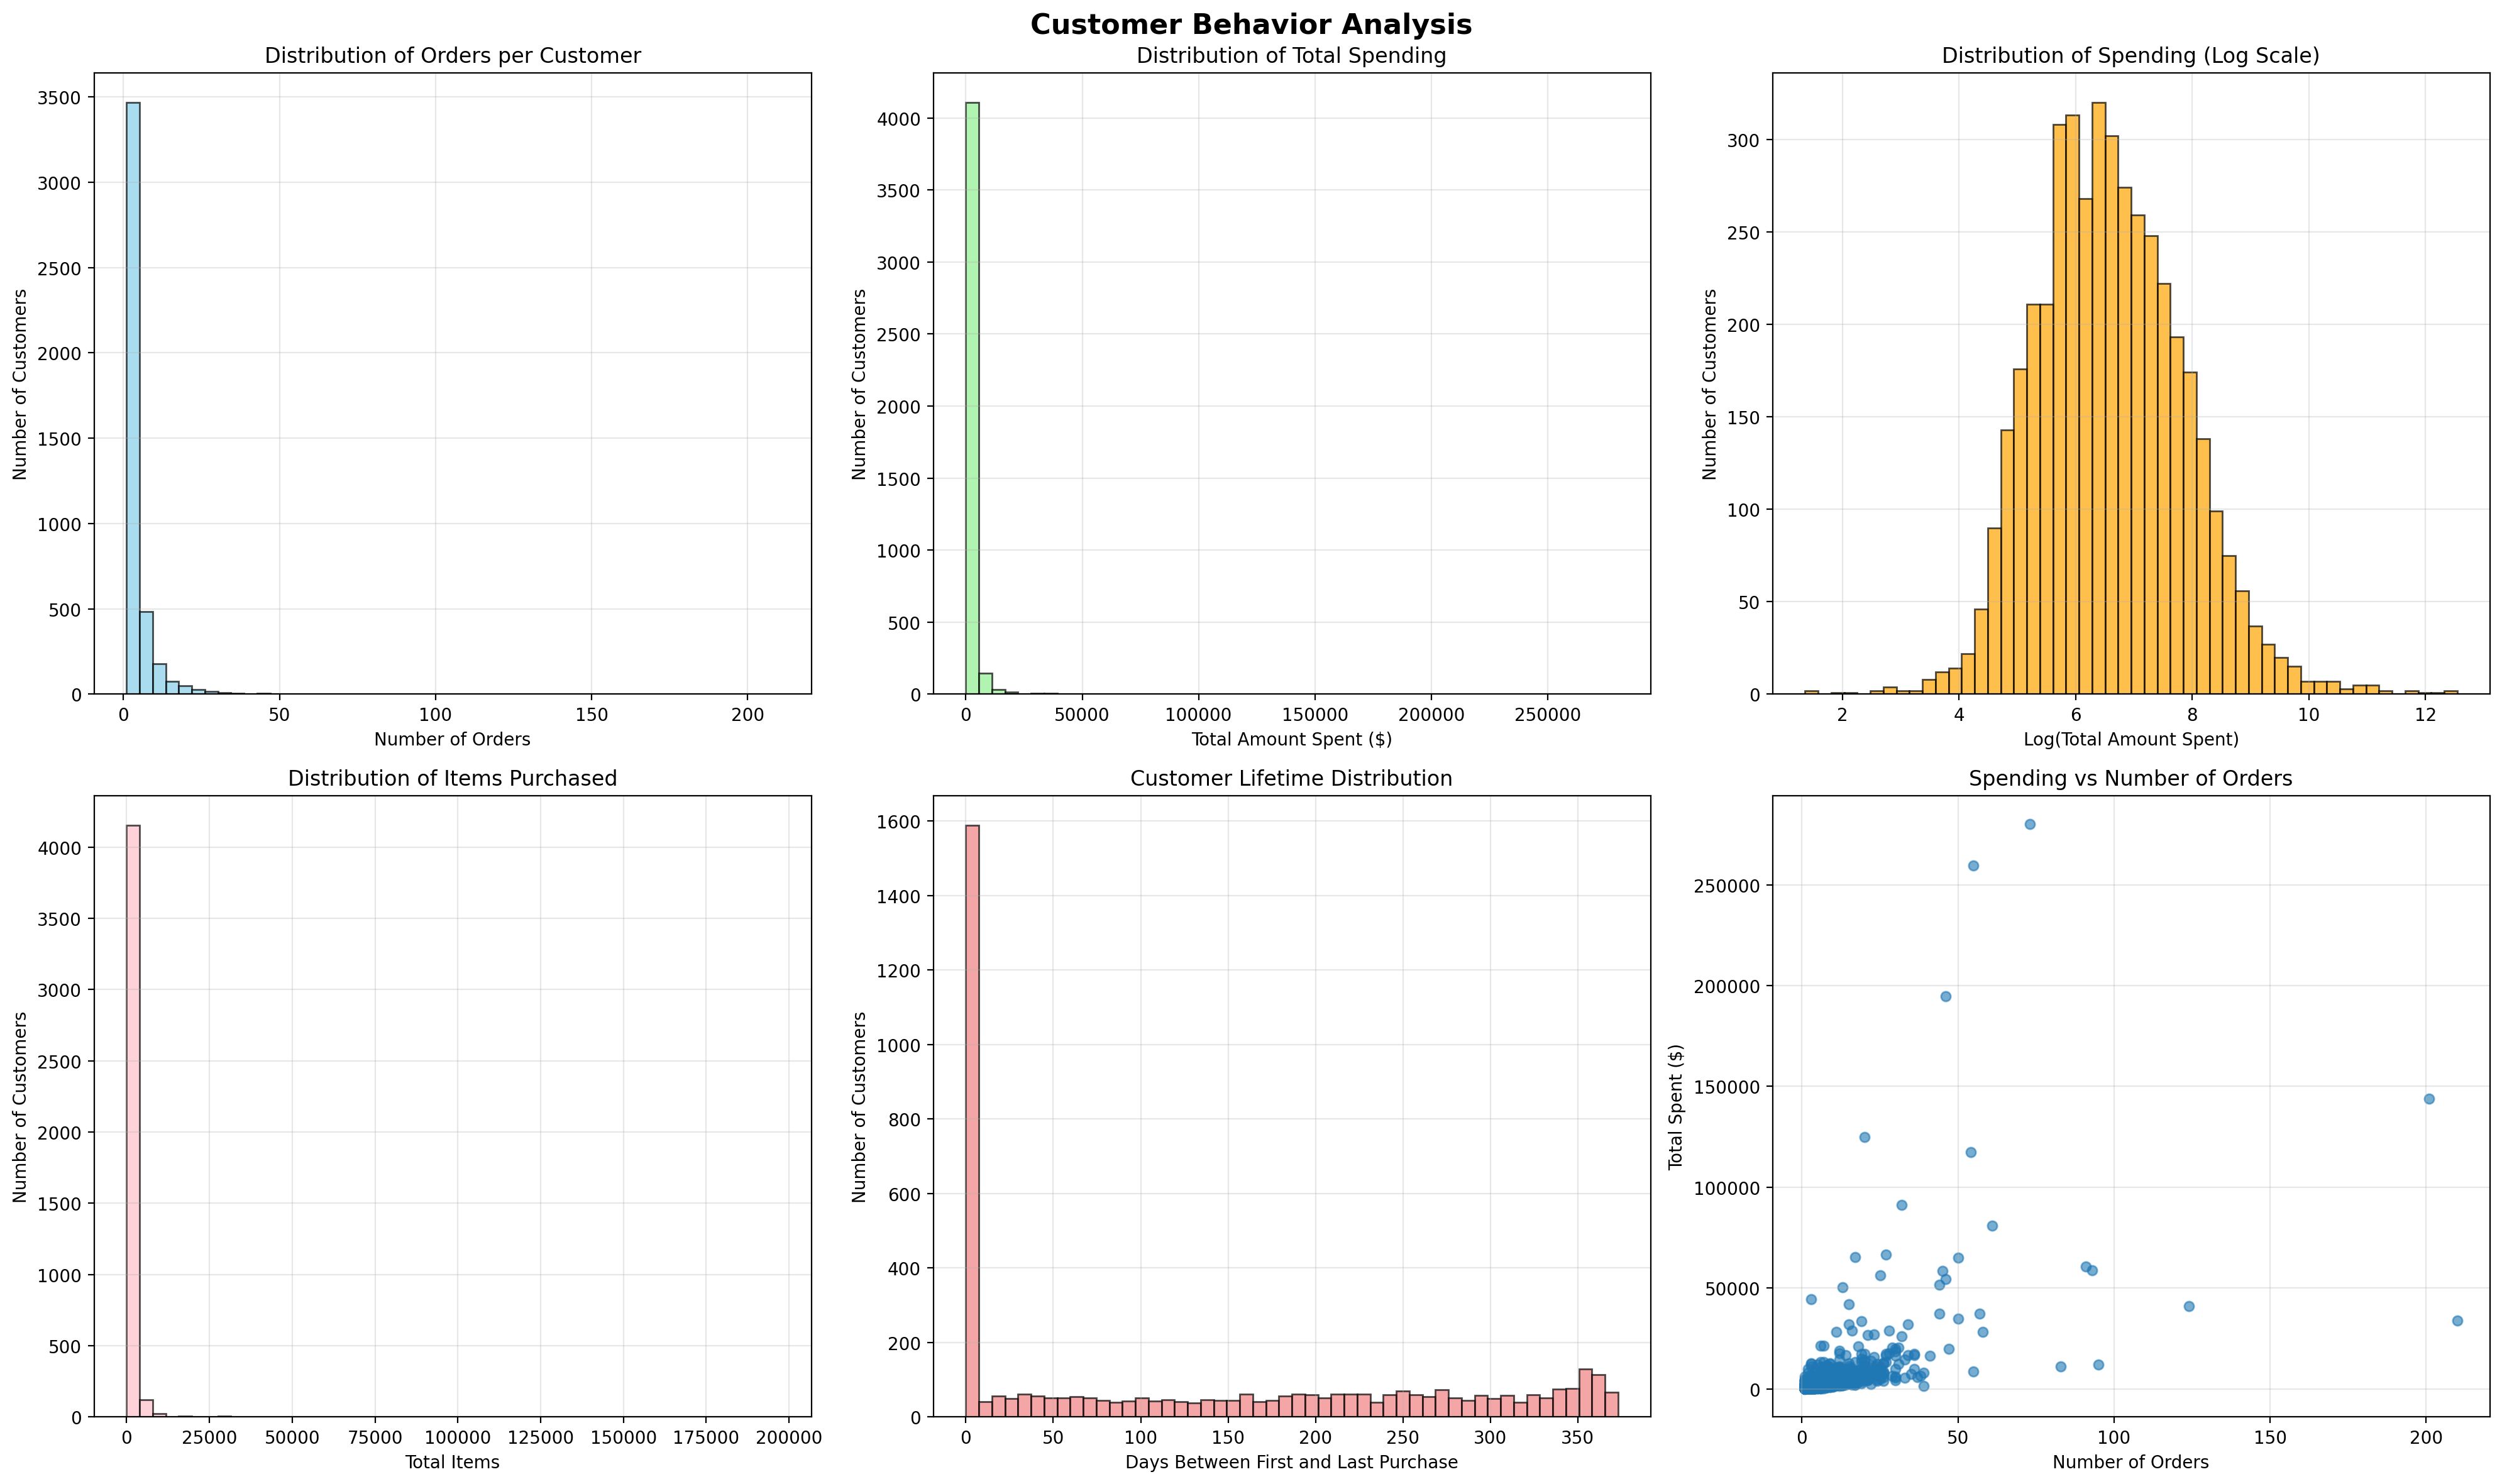


🏆 Top 10 Customers by Total Spending:


CustomerID  OrderCount  TotalSpent  TotalItems
1688       14646          73   280206.02      196915
4200       18102          55   259657.30       64124
3727       17450          46   194550.79       69993
1878       14911         201   143825.06       80265
54         12415          20   124914.53       77374
1332       14156          54   117379.63       57885
3770       17511          32    91062.38       64549
2701       16029          61    81024.84       40208
3175       16684          27    66653.56       50255
1288       14096          17    65164.79       16352

In [30]:
# Customer behavior analysis
print("="*60)
print("📊 CUSTOMER BEHAVIOR ANALYSIS")
print("="*60)

# First, let's check what columns we actually have
print("Available columns in df_clean:")
print(df_clean.columns.tolist())

# Check for invoice-related columns (they might have different names)
invoice_cols = [col for col in df_clean.columns if 'invoice' in col.lower()]
print(f"\nInvoice-related columns: {invoice_cols}")

# Use the correct column name for invoices
if 'InvoiceNo' in df_clean.columns:
    invoice_col = 'InvoiceNo'
elif 'Invoice' in df_clean.columns:
    invoice_col = 'Invoice'
elif len(invoice_cols) > 0:
    invoice_col = invoice_cols[0]
else:
    print("⚠️ No invoice column found. Using alternative method...")
    invoice_col = None

# Aggregate customer-level metrics
if invoice_col and invoice_col != 'InvoiceDate':
    # If we have a proper invoice number column
    customer_summary = df_clean.groupby('CustomerID').agg({
        invoice_col: 'nunique',          # Number of unique orders
        'Quantity': 'sum',               # Total items purchased
        'TotalAmount': 'sum',            # Total money spent
        'InvoiceDate': ['min', 'max']    # First and last purchase dates
    }).round(2)
    
    # Fix: Flatten multi-level column names properly
    customer_summary.columns = [
        'OrderCount',           # invoice_col nunique
        'TotalItems',          # Quantity sum
        'TotalSpent',          # TotalAmount sum
        'FirstPurchase',       # InvoiceDate min
        'LastPurchase'         # InvoiceDate max
    ]
    
else:
    # Alternative approach: Use unique dates as proxy for orders
    print("Using unique dates as proxy for order counting...")
    customer_summary = df_clean.groupby('CustomerID').agg({
        'InvoiceDate': ['nunique', 'min', 'max'],  # Unique dates as proxy for orders
        'Quantity': 'sum',                        # Total items purchased
        'TotalAmount': 'sum'                      # Total money spent
    }).round(2)

    # Fix: Flatten multi-level column names properly
    customer_summary.columns = [
        'OrderCount',      # InvoiceDate nunique
        'FirstPurchase',   # InvoiceDate min
        'LastPurchase',    # InvoiceDate max
        'TotalItems',      # Quantity sum
        'TotalSpent'       # TotalAmount sum
    ]

# Reorder columns for consistency
customer_summary = customer_summary[['OrderCount', 'TotalItems', 'TotalSpent', 'FirstPurchase', 'LastPurchase']]

# Reset index to make CustomerID a regular column
customer_summary.reset_index(inplace=True)

# Calculate customer lifetime (days between first and last purchase)
customer_summary['CustomerLifetime'] = (customer_summary['LastPurchase'] - customer_summary['FirstPurchase']).dt.days

print(f"Total unique customers: {len(customer_summary):,}")
print(f"Average orders per customer: {customer_summary['OrderCount'].mean():.2f}")
print(f"Average spending per customer: ${customer_summary['TotalSpent'].mean():.2f}")

# Display customer behavior statistics
print("\n📈 Customer Behavior Statistics:")
display(customer_summary.describe())

# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Customer Behavior Analysis', fontsize=16, fontweight='bold')

# 1. Orders per customer
axes[0,0].hist(customer_summary['OrderCount'], bins=50, alpha=0.7, edgecolor='black', color='skyblue')
axes[0,0].set_title('Distribution of Orders per Customer')
axes[0,0].set_xlabel('Number of Orders')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].grid(True, alpha=0.3)

# 2. Total spending distribution
axes[0,1].hist(customer_summary['TotalSpent'], bins=50, alpha=0.7, edgecolor='black', color='lightgreen')
axes[0,1].set_title('Distribution of Total Spending')
axes[0,1].set_xlabel('Total Amount Spent ($)')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].grid(True, alpha=0.3)

# 3. Log-scale spending (better for skewed data)
axes[0,2].hist(np.log1p(customer_summary['TotalSpent']), bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[0,2].set_title('Distribution of Spending (Log Scale)')
axes[0,2].set_xlabel('Log(Total Amount Spent)')
axes[0,2].set_ylabel('Number of Customers')
axes[0,2].grid(True, alpha=0.3)

# 4. Items per customer
axes[1,0].hist(customer_summary['TotalItems'], bins=50, alpha=0.7, edgecolor='black', color='pink')
axes[1,0].set_title('Distribution of Items Purchased')
axes[1,0].set_xlabel('Total Items')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].grid(True, alpha=0.3)

# 5. Customer lifetime
axes[1,1].hist(customer_summary['CustomerLifetime'], bins=50, alpha=0.7, edgecolor='black', color='lightcoral')
axes[1,1].set_title('Customer Lifetime Distribution')
axes[1,1].set_xlabel('Days Between First and Last Purchase')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].grid(True, alpha=0.3)

# 6. Spending vs Orders scatter plot
axes[1,2].scatter(customer_summary['OrderCount'], customer_summary['TotalSpent'], alpha=0.6, s=30)
axes[1,2].set_title('Spending vs Number of Orders')
axes[1,2].set_xlabel('Number of Orders')
axes[1,2].set_ylabel('Total Spent ($)')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Top customers analysis
print("\n🏆 Top 10 Customers by Total Spending:")
top_customers = customer_summary.nlargest(10, 'TotalSpent')[['CustomerID', 'OrderCount', 'TotalSpent', 'TotalItems']]
display(top_customers)


📅 TIME-BASED ANALYSIS
Available columns in df_clean:
['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']
⚠️ No invoice column found. Using transaction count instead.

Monthly Business Metrics:


YearMonth  TotalAmount  CustomerID  Quantity  TransactionCount
0    2010-12   572713.890         885    312265             26157
1    2011-01   492261.440         740    274883             21228
2    2011-02   447137.350         758    265622             19927
3    2011-03   595500.760         974    348503             27175
4    2011-04   469200.361         856    292222             22642
5    2011-05   678594.560        1056    373601             28320
6    2011-06   622243.690         991    363639             27184
7    2011-07   600091.011         949    369420             26825
8    2011-08   645343.900         935    398121             27007
9    2011-09   952838.382        1266    544897             40028
10   2011-10  1039318.790        1364    593900             49554
11   2011-11  1161817.380        1664    669051             64531
12   2011-12   349723.190         614    206418             17303

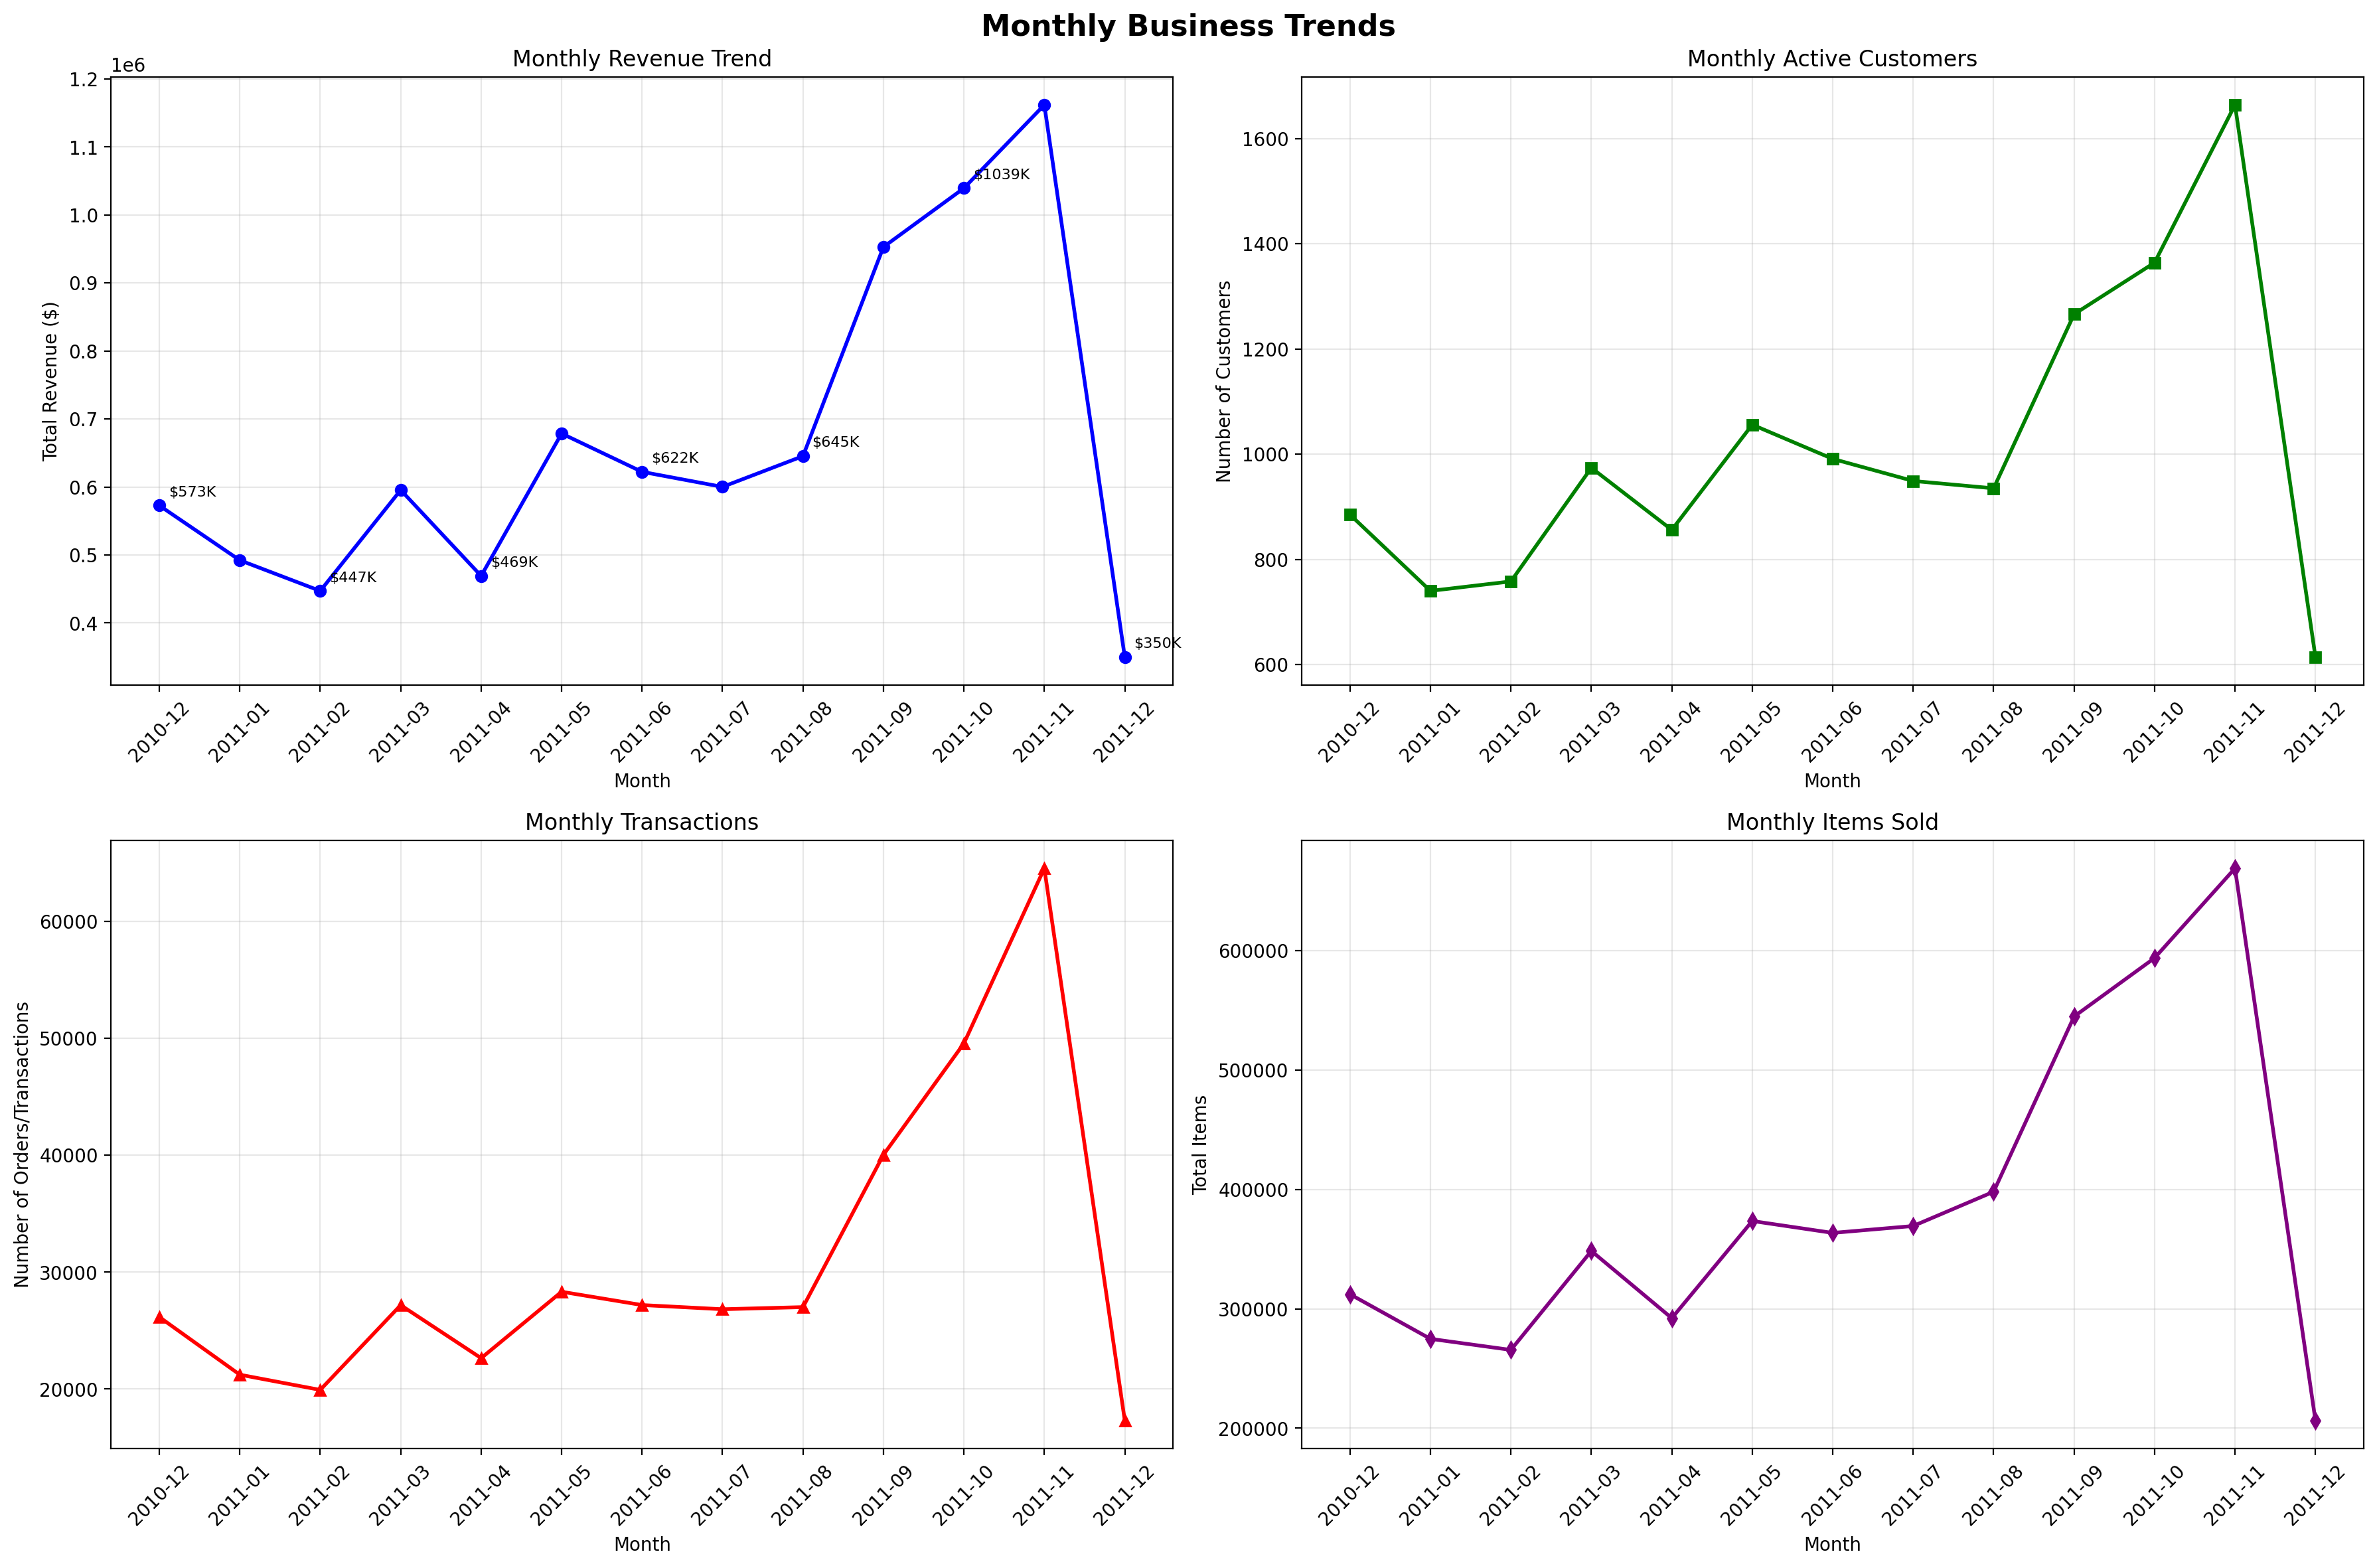


📊 Daily Patterns Analysis:
Daily Business Patterns:


InvoiceDate  TotalAmount  CustomerID  Quantity    DayName
0            0  1367146.411        1595    769001     Monday
1            1  1623451.031        1700    933644    Tuesday
2            2  1588336.170        1778    962417  Wednesday
3            3  1976859.070        2007   1151845   Thursday
4            4  1278477.801        1556    729163     Friday
5            6   792514.221        1225    466472     Sunday

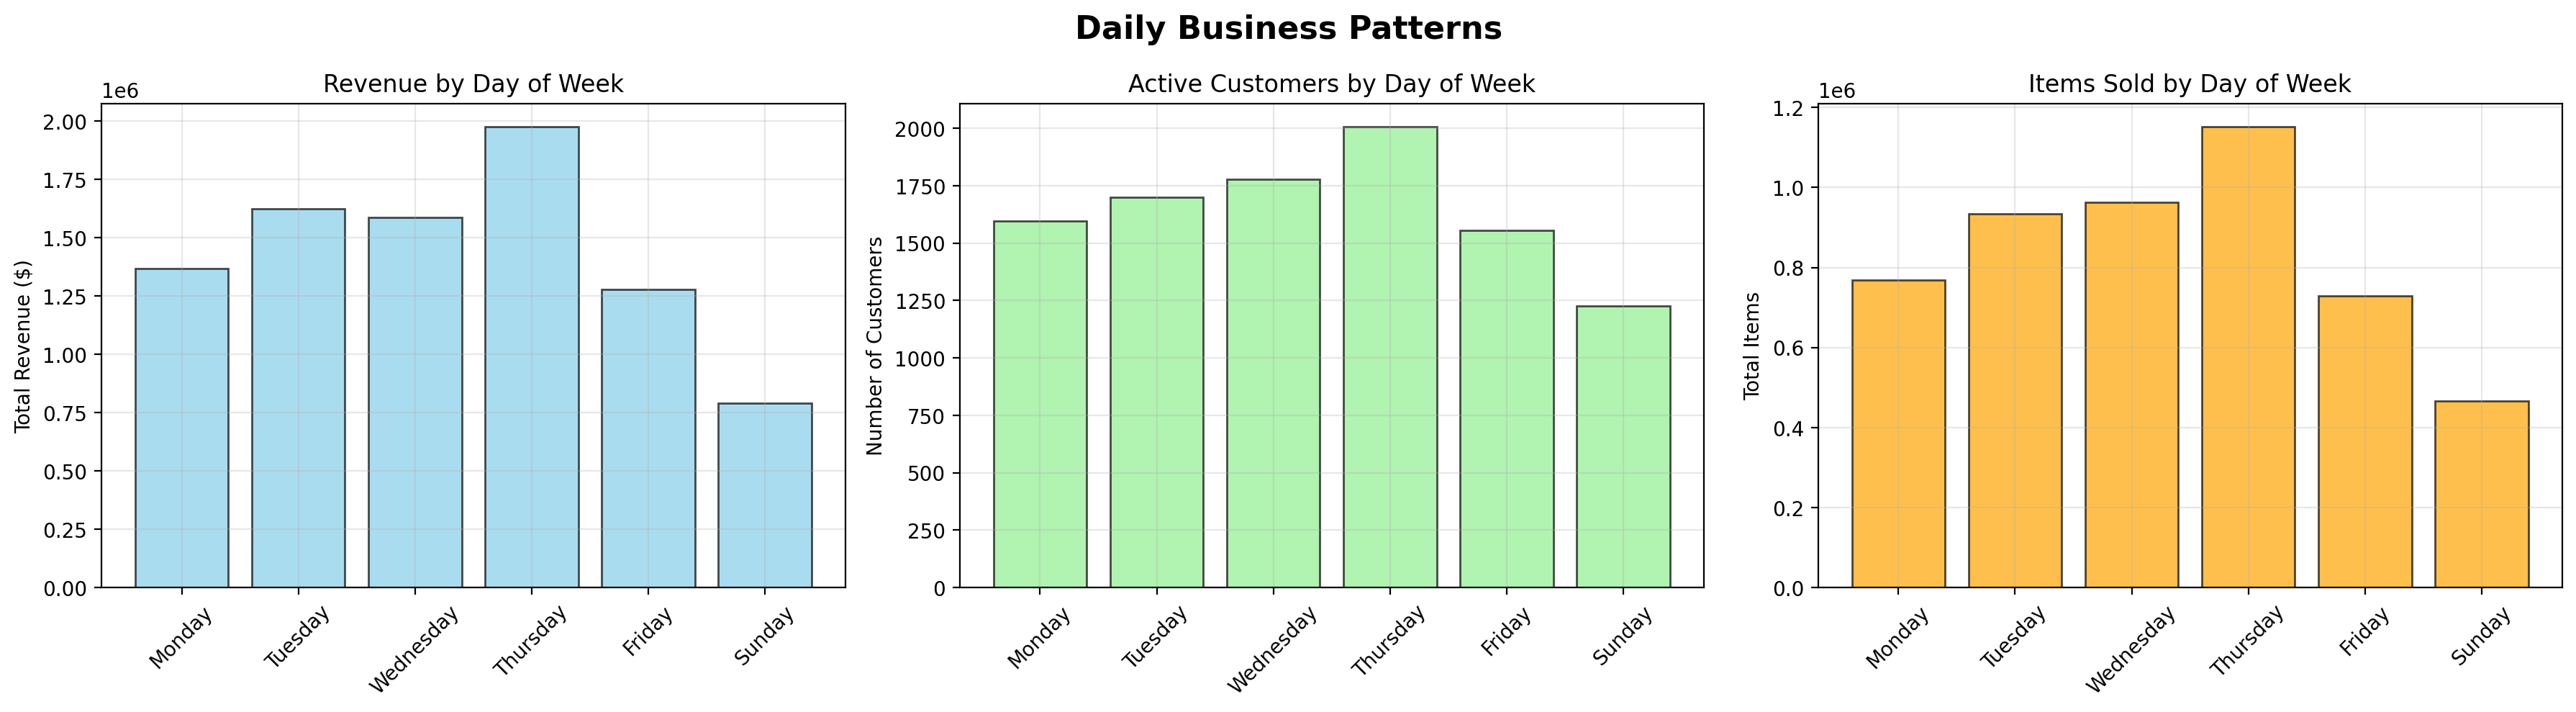


🕐 Hourly Patterns Analysis:
Hourly Business Patterns:


InvoiceDate  TotalAmount  CustomerID  Quantity
0             6        4.250           1         1
1             7    31059.210          28     15370
2             8   282115.630         427    158263
3             9   674135.571         890    401334
4            10  1184008.971        1267    701710
5            11  1104558.750        1303    648457
6            12  1378571.480        1637    825218
7            13  1173264.750        1573    682809
8            14   995629.371        1386    557981
9            15   927221.750        1275    540511
10           16   468885.800         749    254032
11           17   234413.521         414    129577
12           18   104954.430         141     55012
13           19    49028.460          98     32680
14           20    18932.760          15      9587

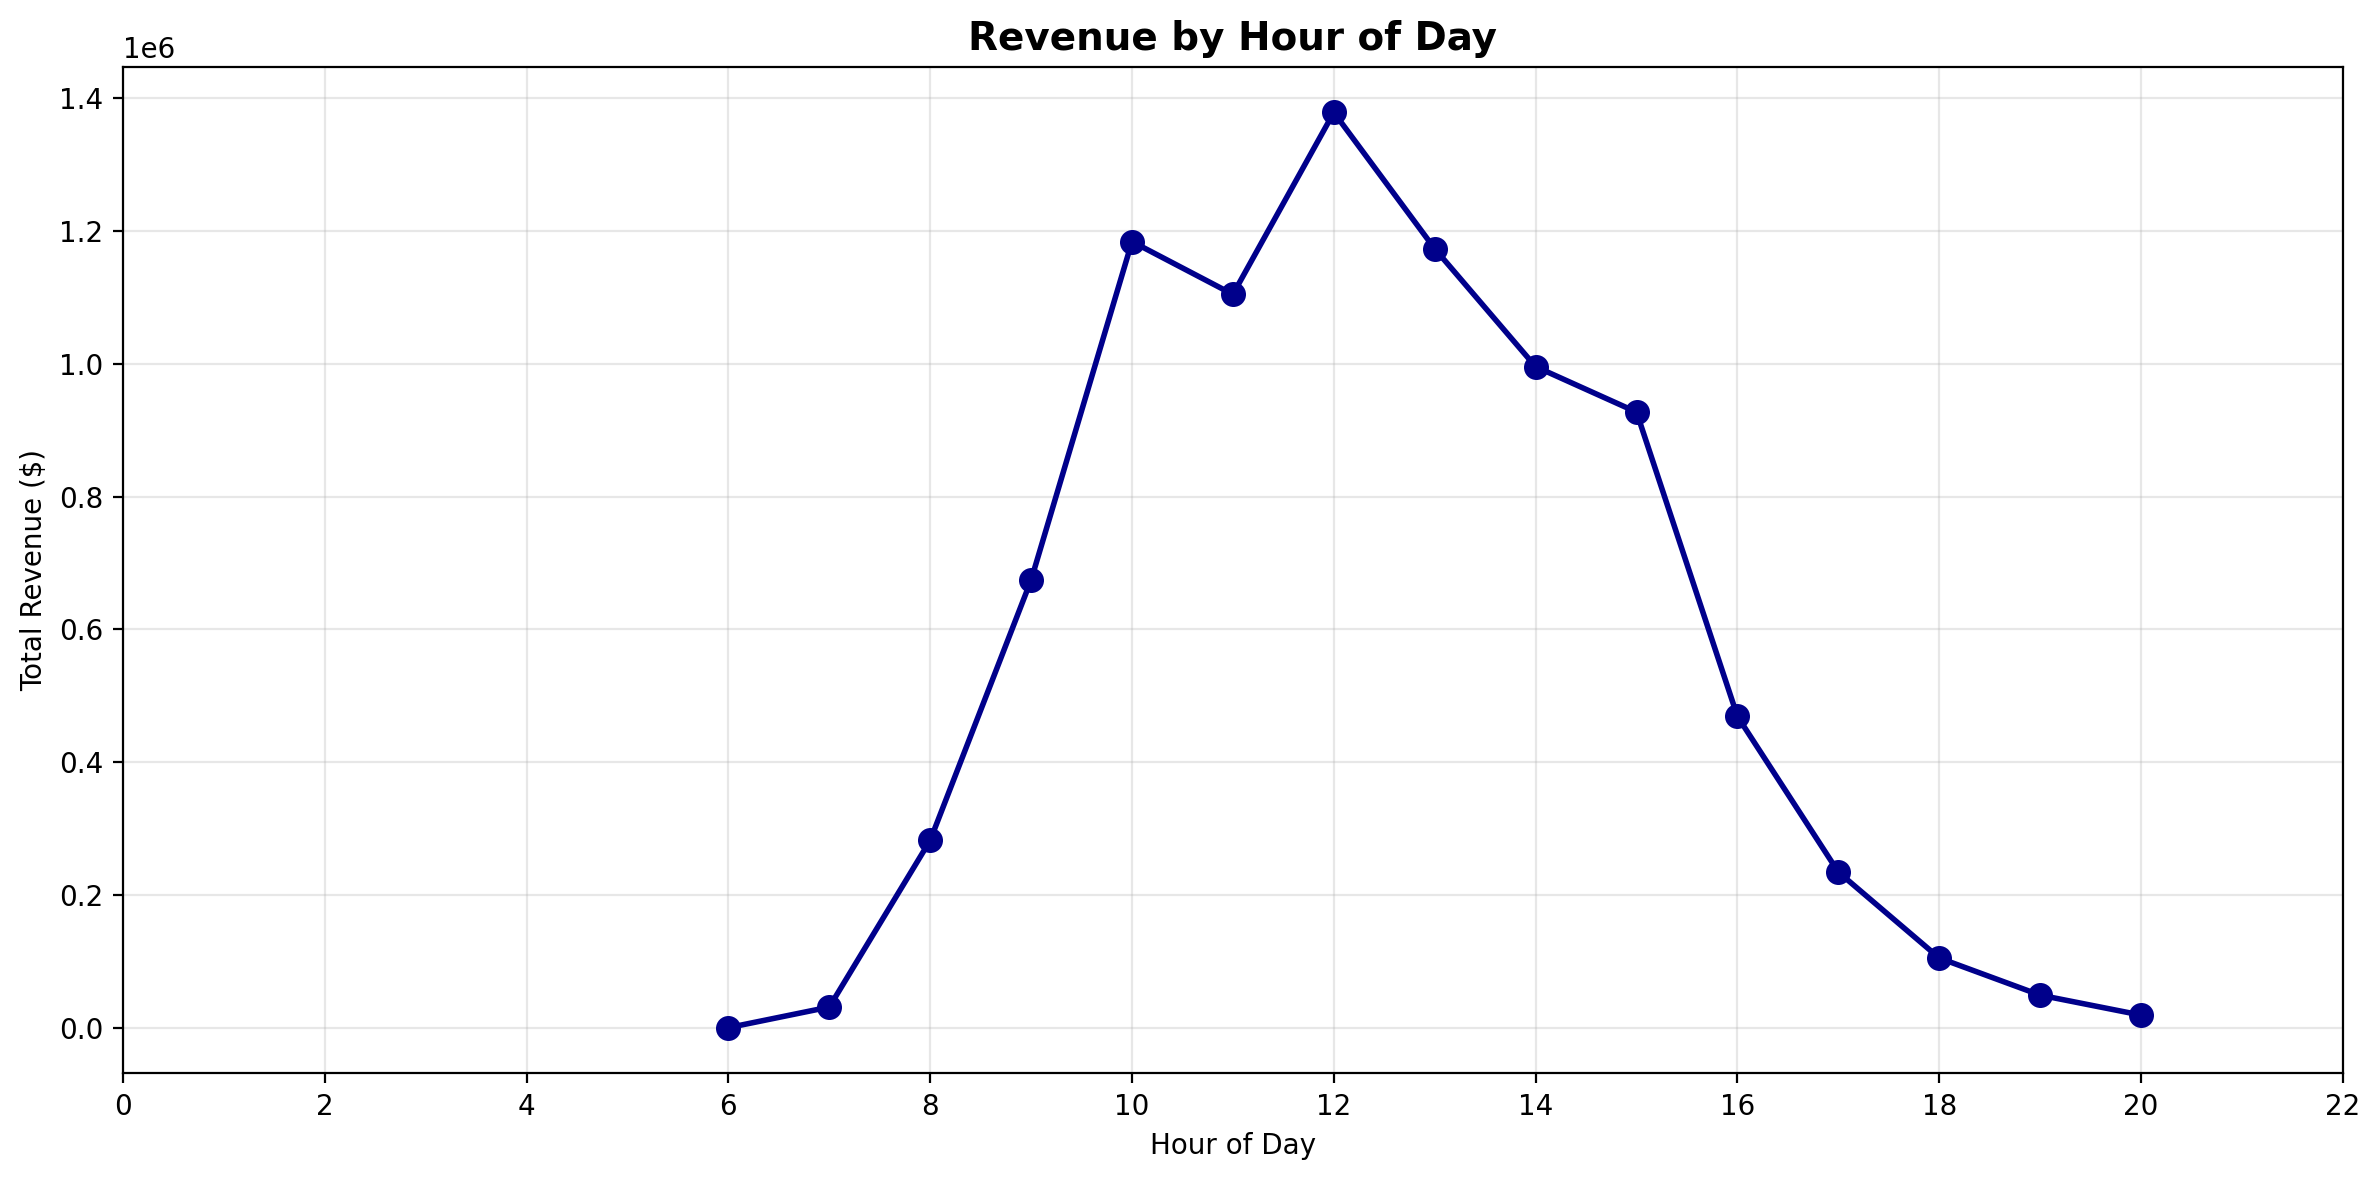


🌟 Seasonal Analysis:
Seasonal Business Patterns:


InvoiceDate  TotalAmount  CustomerID  Quantity MonthName
0             1   492261.440         740    274883       Jan
1             2   447137.350         758    265622       Feb
2             3   595500.760         974    348503       Mar
3             4   469200.361         856    292222       Apr
4             5   678594.560        1056    373601       May
5             6   622243.690         991    363639       Jun
6             7   600091.011         949    369420       Jul
7             8   645343.900         935    398121       Aug
8             9   952838.382        1266    544897       Sep
9            10  1039318.790        1364    593900       Oct
10           11  1161817.380        1664    669051       Nov
11           12   922437.080        1264    518683       Dec

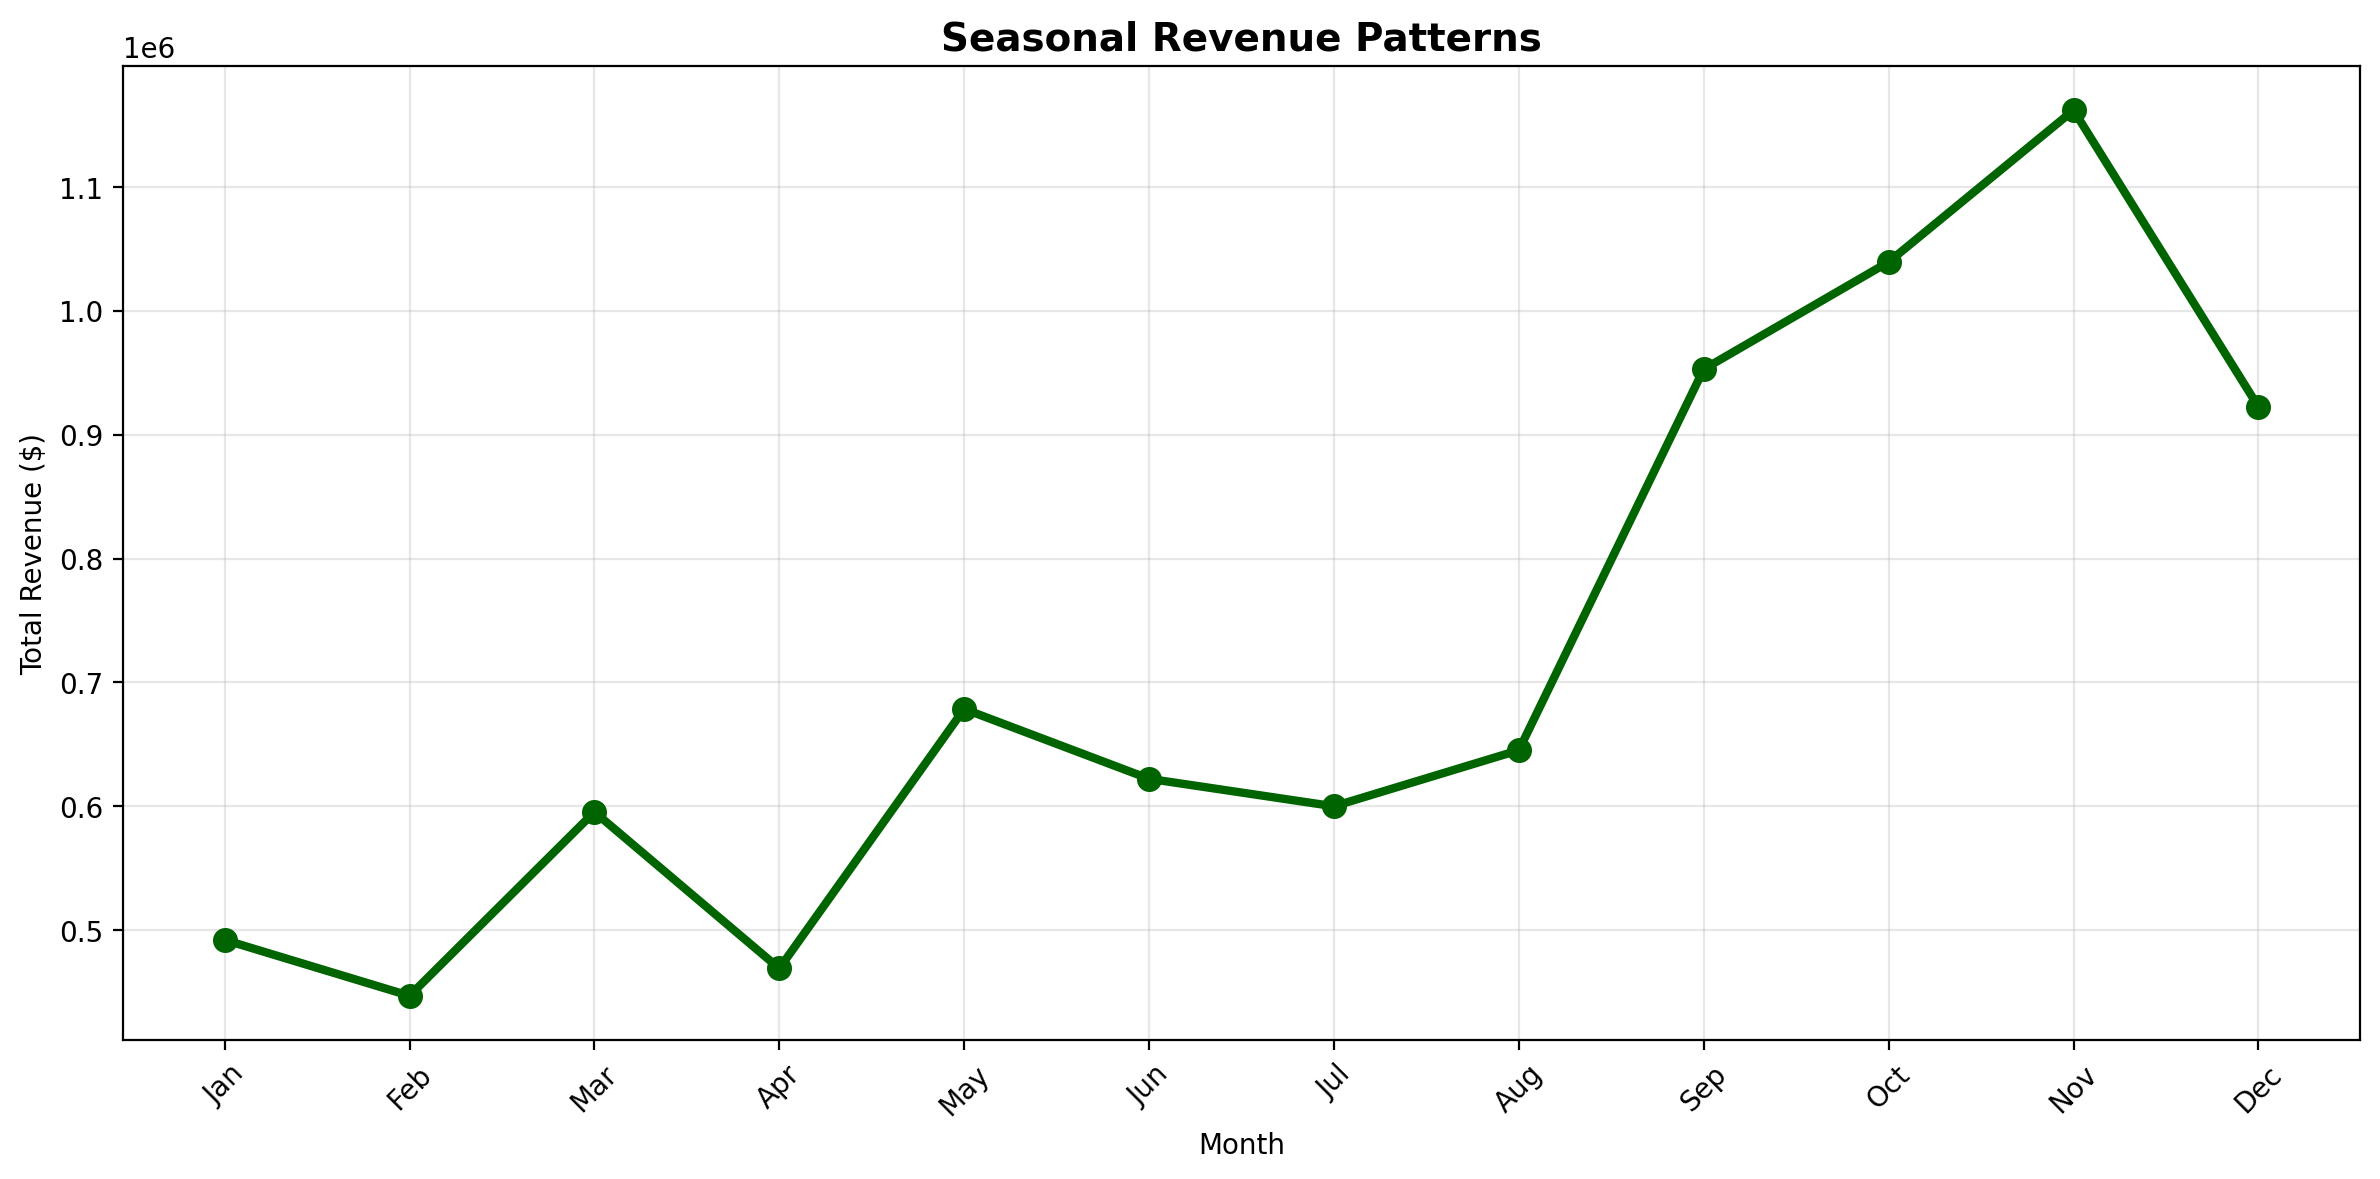


💡 KEY TIME-BASED INSIGHTS:
--------------------------------------------------
🎯 Peak Month: Nov with $1,161,817.38 revenue
🎯 Peak Day: Thursday with $1,976,859.07 revenue
📈 Overall Growth: -38.9% from first to last month
👥 Average Monthly Customers: 1004

✅ Time-based analysis complete!


In [32]:
# Monthly trends analysis
print("="*60)
print("📅 TIME-BASED ANALYSIS")
print("="*60)

# First, let's check what columns we actually have
print("Available columns in df_clean:")
print(df_clean.columns.tolist())

# Create a copy to avoid modifying the original dataframe
df_analysis = df_clean.copy()
df_analysis['YearMonth'] = df_analysis['InvoiceDate'].dt.to_period('M')

# SAFE APPROACH: Only use columns that definitely exist
base_columns = {
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}

# Check for invoice-related columns and add if they exist
invoice_candidates = ['InvoiceNo', 'Invoice', 'InvoiceID', 'OrderID']
invoice_column = None

for col in invoice_candidates:
    if col in df_analysis.columns:
        invoice_column = col
        base_columns[col] = 'nunique'
        break

if invoice_column:
    print(f"✅ Found invoice column: {invoice_column}")
else:
    print("⚠️ No invoice column found. Using transaction count instead.")

# Monthly aggregation with guaranteed safe columns
monthly_analysis = df_analysis.groupby('YearMonth').agg(base_columns).reset_index()

# If no invoice column, add transaction count
if not invoice_column:
    monthly_orders = df_analysis.groupby('YearMonth').size().reset_index(name='TransactionCount')
    monthly_analysis = monthly_analysis.merge(monthly_orders, on='YearMonth')

# Convert period to string for plotting
monthly_analysis['YearMonth'] = monthly_analysis['YearMonth'].astype(str)

print("\nMonthly Business Metrics:")
display(monthly_analysis)

# Create time-series visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Monthly Business Trends', fontsize=16, fontweight='bold')

# Monthly revenue
axes[0,0].plot(monthly_analysis['YearMonth'], monthly_analysis['TotalAmount'], 
               marker='o', linewidth=2, markersize=6, color='blue')
axes[0,0].set_title('Monthly Revenue Trend')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Total Revenue ($)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Add revenue values on points
for i, (month, revenue) in enumerate(zip(monthly_analysis['YearMonth'], monthly_analysis['TotalAmount'])):
    if i % 2 == 0:  # Show every other month to avoid crowding
        axes[0,0].annotate(f'${revenue/1000:.0f}K', (month, revenue), 
                          xytext=(5, 5), textcoords='offset points', fontsize=8)

# Monthly active customers
axes[0,1].plot(monthly_analysis['YearMonth'], monthly_analysis['CustomerID'], 
               marker='s', linewidth=2, markersize=6, color='green')
axes[0,1].set_title('Monthly Active Customers')
axes[0,1].set_xlabel('Month')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Monthly orders/transactions
if invoice_column:
    order_data = monthly_analysis[invoice_column]
    order_title = f'Monthly Orders ({invoice_column})'
else:
    order_data = monthly_analysis['TransactionCount']
    order_title = 'Monthly Transactions'

axes[1,0].plot(monthly_analysis['YearMonth'], order_data, 
               marker='^', linewidth=2, markersize=6, color='red')
axes[1,0].set_title(order_title)
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Orders/Transactions')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Monthly items sold
axes[1,1].plot(monthly_analysis['YearMonth'], monthly_analysis['Quantity'], 
               marker='d', linewidth=2, markersize=6, color='purple')
axes[1,1].set_title('Monthly Items Sold')
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Total Items')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Daily patterns analysis
print("\n📊 Daily Patterns Analysis:")
daily_patterns = df_clean.groupby(df_clean['InvoiceDate'].dt.dayofweek).agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Map day numbers to names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_patterns['DayName'] = [day_names[i] for i in daily_patterns['InvoiceDate']]

print("Daily Business Patterns:")
display(daily_patterns)

# Create daily pattern visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Daily Business Patterns', fontsize=16, fontweight='bold')

# Revenue by day of week
axes[0].bar(daily_patterns['DayName'], daily_patterns['TotalAmount'], 
            color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Revenue by Day of Week')
axes[0].set_ylabel('Total Revenue ($)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# Customers by day of week
axes[1].bar(daily_patterns['DayName'], daily_patterns['CustomerID'], 
            color='lightgreen', alpha=0.7, edgecolor='black')
axes[1].set_title('Active Customers by Day of Week')
axes[1].set_ylabel('Number of Customers')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# Items by day of week
axes[2].bar(daily_patterns['DayName'], daily_patterns['Quantity'], 
            color='orange', alpha=0.7, edgecolor='black')
axes[2].set_title('Items Sold by Day of Week')
axes[2].set_ylabel('Total Items')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hourly patterns (if time information is available)
print("\n🕐 Hourly Patterns Analysis:")
if df_clean['InvoiceDate'].dt.hour.nunique() > 1:
    hourly_patterns = df_clean.groupby(df_clean['InvoiceDate'].dt.hour).agg({
        'TotalAmount': 'sum',
        'CustomerID': 'nunique',
        'Quantity': 'sum'
    }).reset_index()
    
    print("Hourly Business Patterns:")
    display(hourly_patterns)
    
    # Plot hourly patterns
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.plot(hourly_patterns['InvoiceDate'], hourly_patterns['TotalAmount'], 
            marker='o', linewidth=2, markersize=8, color='darkblue')
    ax.set_title('Revenue by Hour of Day', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Total Revenue ($)')
    ax.set_xticks(range(0, 24, 2))
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No hourly variation detected in the data")

# Seasonal analysis
print("\n🌟 Seasonal Analysis:")
seasonal_patterns = df_clean.groupby(df_clean['InvoiceDate'].dt.month).agg({
    'TotalAmount': 'sum',
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Map month numbers to names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_patterns['MonthName'] = [month_names[i-1] for i in seasonal_patterns['InvoiceDate']]

print("Seasonal Business Patterns:")
display(seasonal_patterns)

# Plot seasonal patterns
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(seasonal_patterns['MonthName'], seasonal_patterns['TotalAmount'], 
        marker='o', linewidth=3, markersize=8, color='darkgreen')
ax.set_title('Seasonal Revenue Patterns', fontsize=14, fontweight='bold')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue ($)')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Business insights from time analysis
print("\n💡 KEY TIME-BASED INSIGHTS:")
print("-" * 50)

# Peak months
peak_month = seasonal_patterns.loc[seasonal_patterns['TotalAmount'].idxmax(), 'MonthName']
peak_revenue = seasonal_patterns['TotalAmount'].max()
print(f"🎯 Peak Month: {peak_month} with ${peak_revenue:,.2f} revenue")

# Peak day of week
peak_day = daily_patterns.loc[daily_patterns['TotalAmount'].idxmax(), 'DayName']
peak_day_revenue = daily_patterns['TotalAmount'].max()
print(f"🎯 Peak Day: {peak_day} with ${peak_day_revenue:,.2f} revenue")

# Growth trend
first_month_revenue = monthly_analysis['TotalAmount'].iloc[0]
last_month_revenue = monthly_analysis['TotalAmount'].iloc[-1]
growth_rate = ((last_month_revenue - first_month_revenue) / first_month_revenue) * 100
print(f"📈 Overall Growth: {growth_rate:.1f}% from first to last month")

# Customer retention indicator
avg_monthly_customers = monthly_analysis['CustomerID'].mean()
print(f"👥 Average Monthly Customers: {avg_monthly_customers:.0f}")

print("\n✅ Time-based analysis complete!")


🎯 RFM FEATURE ENGINEERING
Available columns in df_clean:
['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']
Analysis date: 2011-12-10 12:50:00
🔍 RFM Data Overview:
Shape: (4337, 4)
Summary statistics:


CustomerID      Recency    Frequency       Monetary
count   4337.000000  4337.000000  4337.000000    4337.000000
mean   15301.089232    92.529859     4.251095    1989.113374
std     1721.422291    99.968030     7.636059    8532.426721
min    12347.000000     1.000000     1.000000       2.900000
25%    13814.000000    18.000000     1.000000     307.090000
50%    15300.000000    51.000000     2.000000     673.260000
75%    16779.000000   142.000000     5.000000    1661.060000
max    18287.000000   374.000000   210.000000  280206.020000

🔧 Creating enhanced features...
Available columns: ['Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']
⚠️ No product variety column found

📊 Enhanced RFM Dataset:
Shape: (4337, 13)
Columns: ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'OrderValueStd', 'TotalItems', 'AvgItemsPerOrder', 'FirstPurchase', 'LastPurchase', 'ProductVariety', 'CustomerLifetime', 'ItemsPerOrder']

🔍 Sample Enhanced RFM Data:


CustomerID  Recency  Frequency  Monetary  AvgOrderValue  OrderValueStd  \
0       12347        2          7   4310.00      23.681319      23.289902   
1       12348       75          4   1797.24      57.975484      48.514857   
2       12349       19          1   1757.55      24.076027      34.655913   
3       12350      310          1    334.40      19.670588       7.275538   
4       12352       36          8   2506.04      29.482824      51.687900   

   TotalItems  AvgItemsPerOrder       FirstPurchase        LastPurchase  \
0        2458         13.505495 2010-12-07 14:57:00 2011-12-07 15:52:00   
1        2341         75.516129 2010-12-16 19:09:00 2011-09-25 13:13:00   
2         631          8.643836 2011-11-21 09:51:00 2011-11-21 09:51:00   
3         197         11.588235 2011-02-02 16:01:00 2011-02-02 16:01:00   
4         536          6.305882 2011-02-16 12:33:00 2011-11-03 14:37:00   

   ProductVariety  CustomerLifetime  ItemsPerOrder  
0               1               365     351.142857  
1               1               282     585.250000  
2               1                 0     631.000000  
3               1                 0     197.000000  
4               1               260      67.000000


🔗 Feature Correlation Analysis:


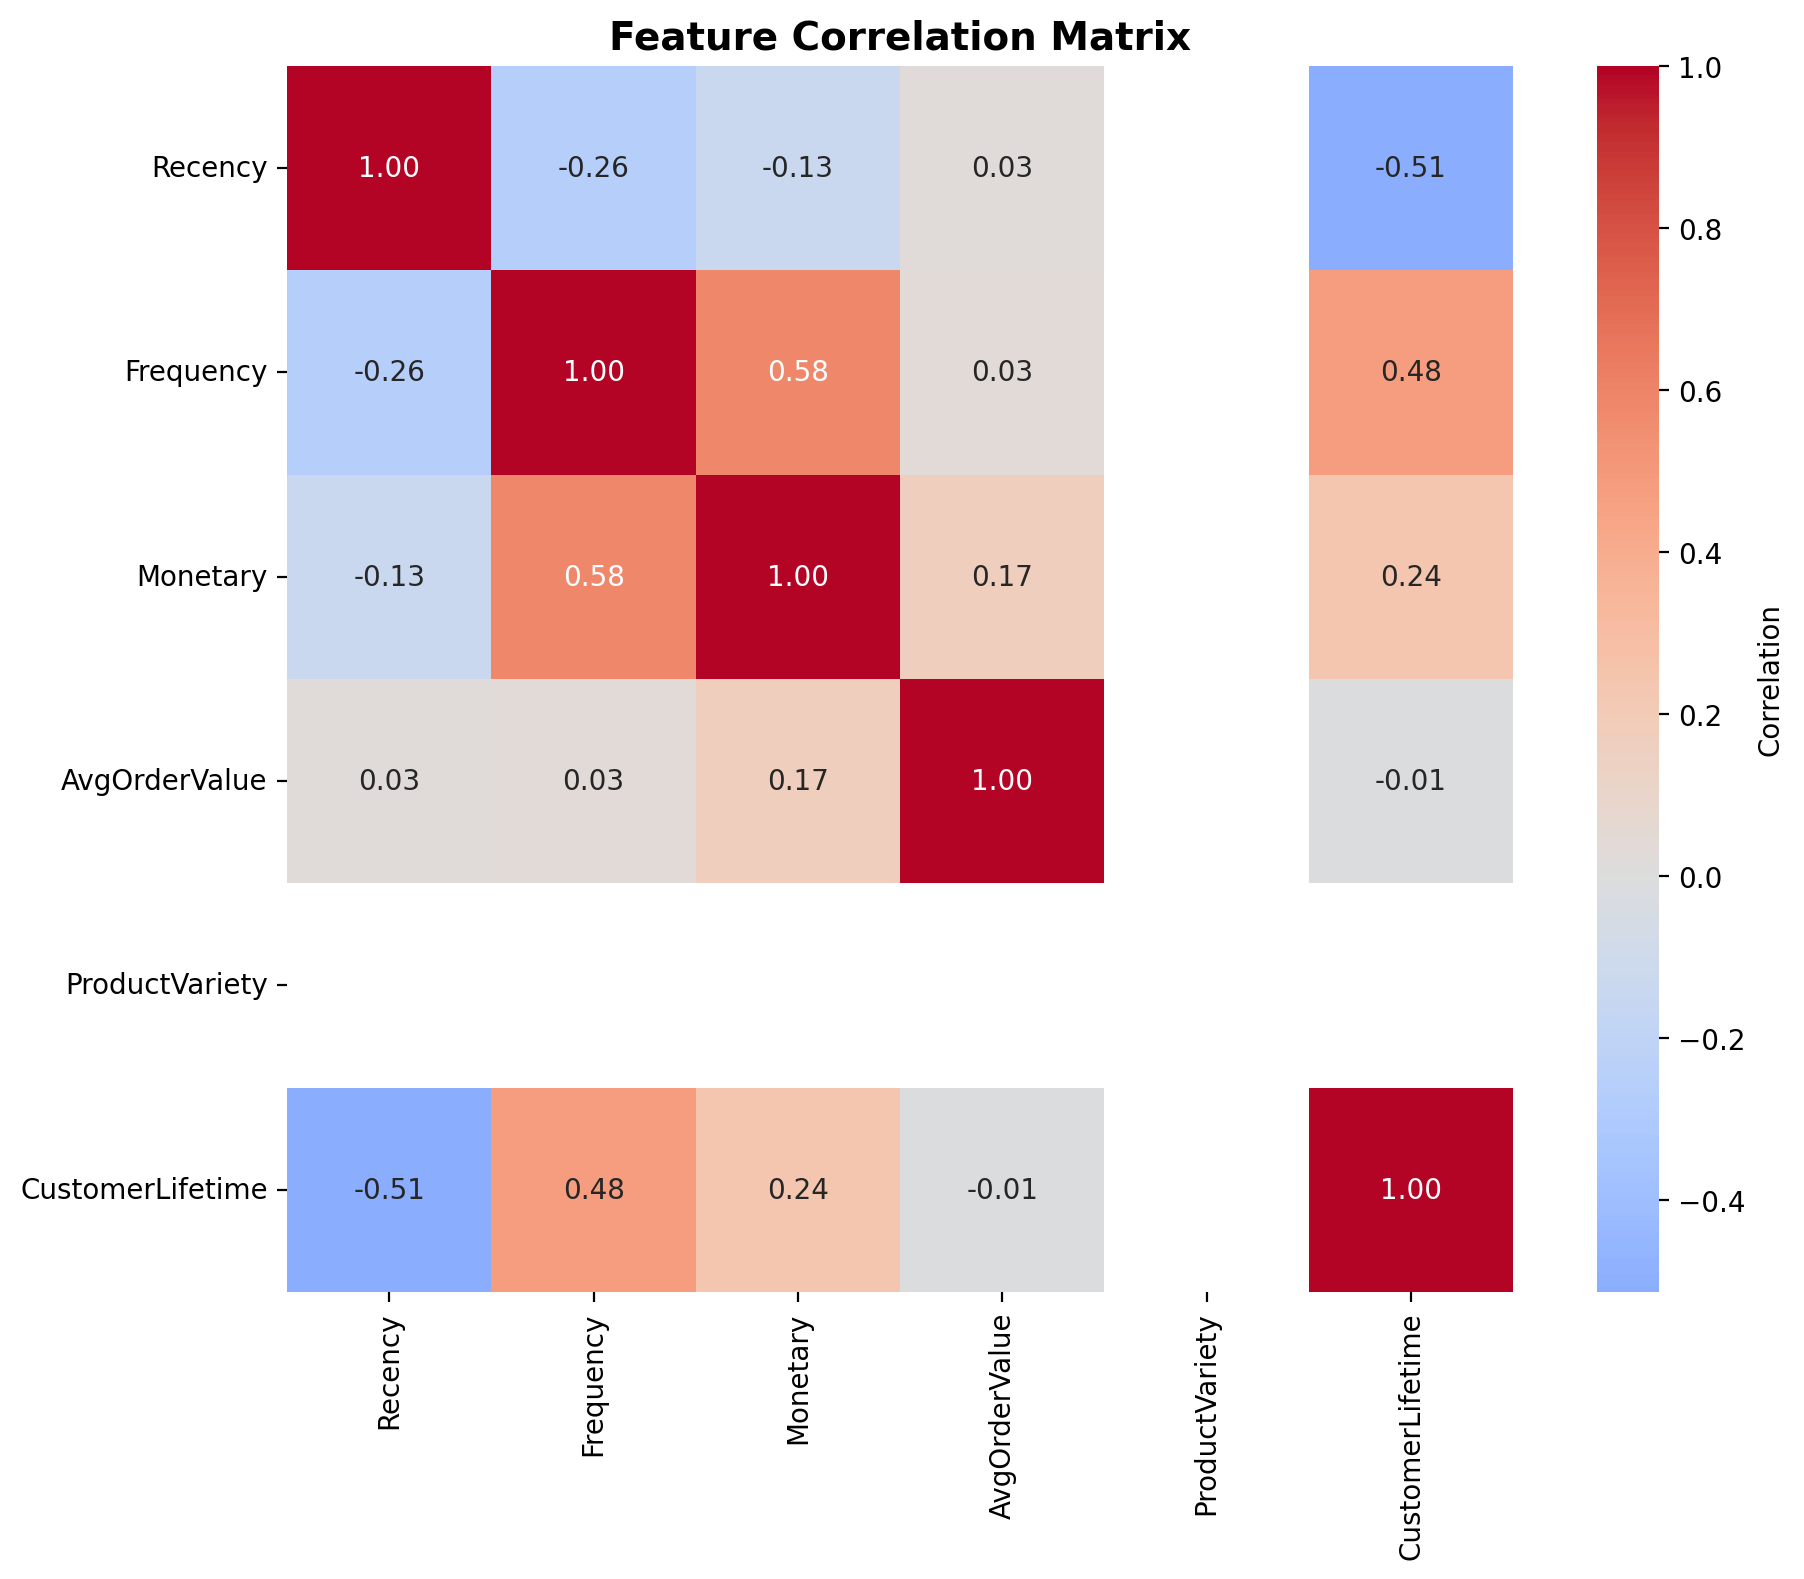

Recency  Frequency  Monetary  AvgOrderValue  \
Recency           1.000000  -0.260739 -0.130353       0.029387   
Frequency        -0.260739   1.000000  0.581450       0.031430   
Monetary         -0.130353   0.581450  1.000000       0.167313   
AvgOrderValue     0.029387   0.031430  0.167313       1.000000   
ProductVariety         NaN        NaN       NaN            NaN   
CustomerLifetime -0.513486   0.476886  0.238452      -0.011968   

                  ProductVariety  CustomerLifetime  
Recency                      NaN         -0.513486  
Frequency                    NaN          0.476886  
Monetary                     NaN          0.238452  
AvgOrderValue                NaN         -0.011968  
ProductVariety               NaN               NaN  
CustomerLifetime             NaN          1.000000


📈 RFM Distribution Analysis:


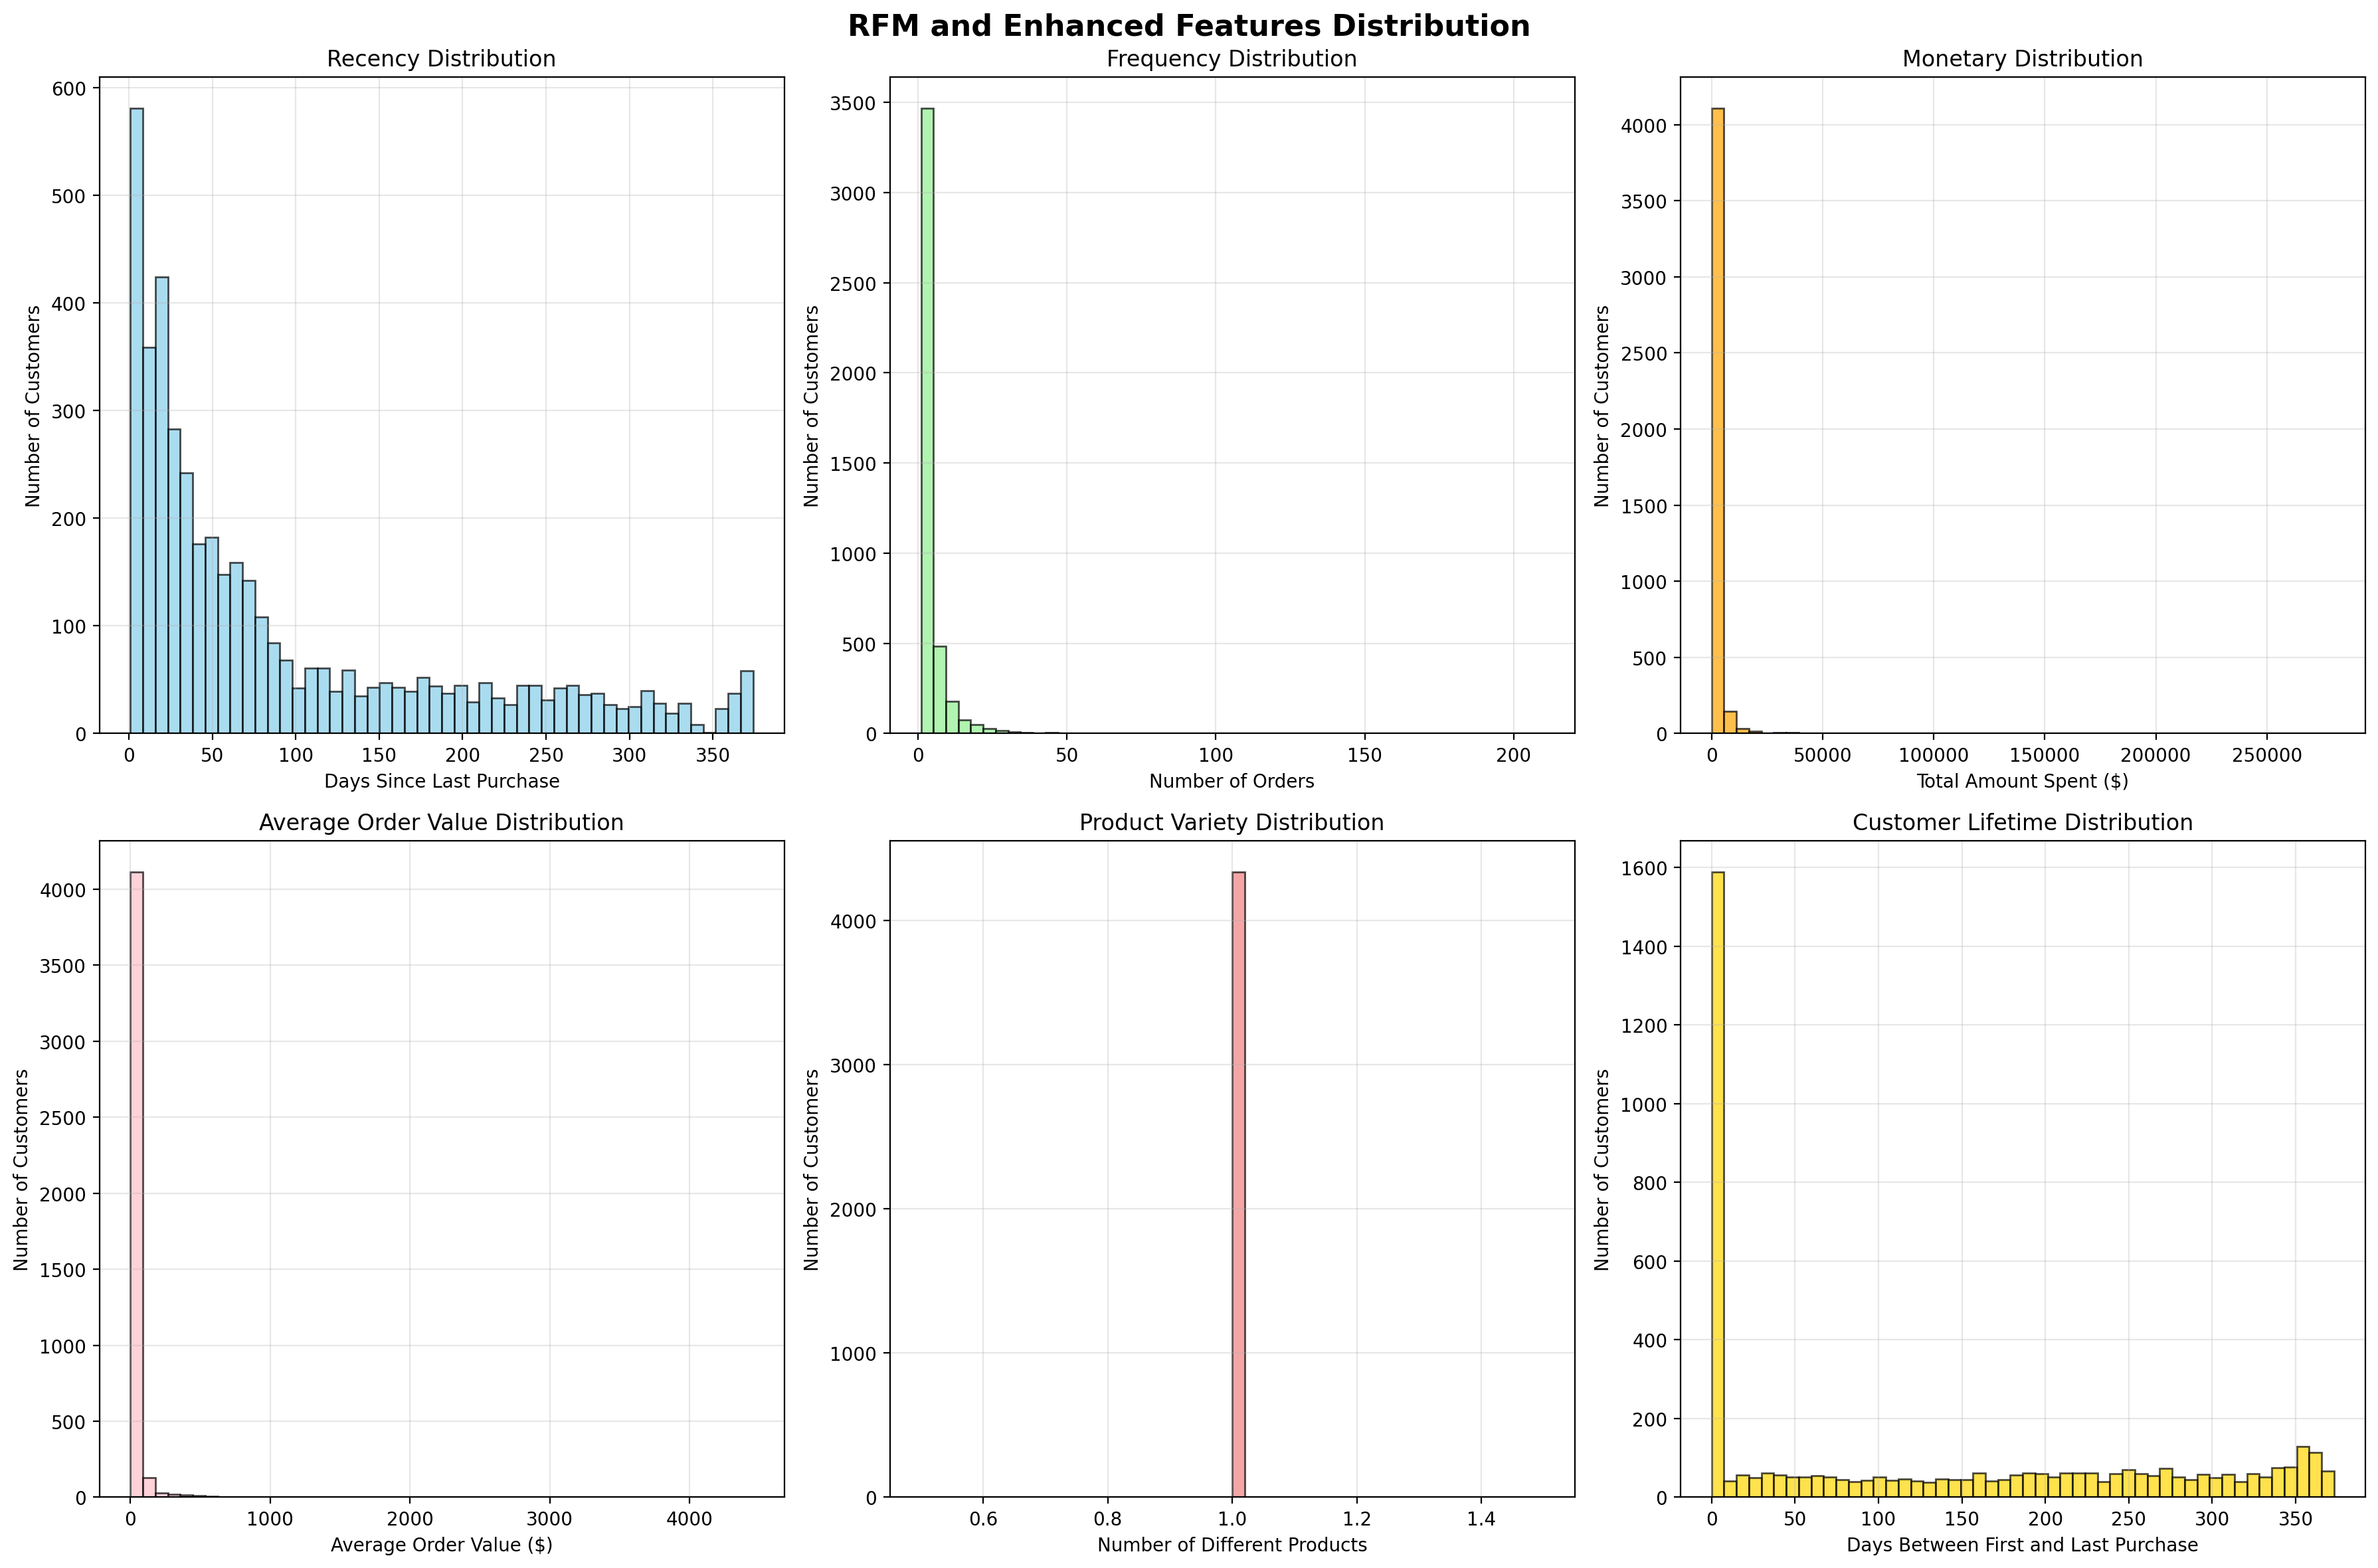


🔍 RFM Relationship Analysis:


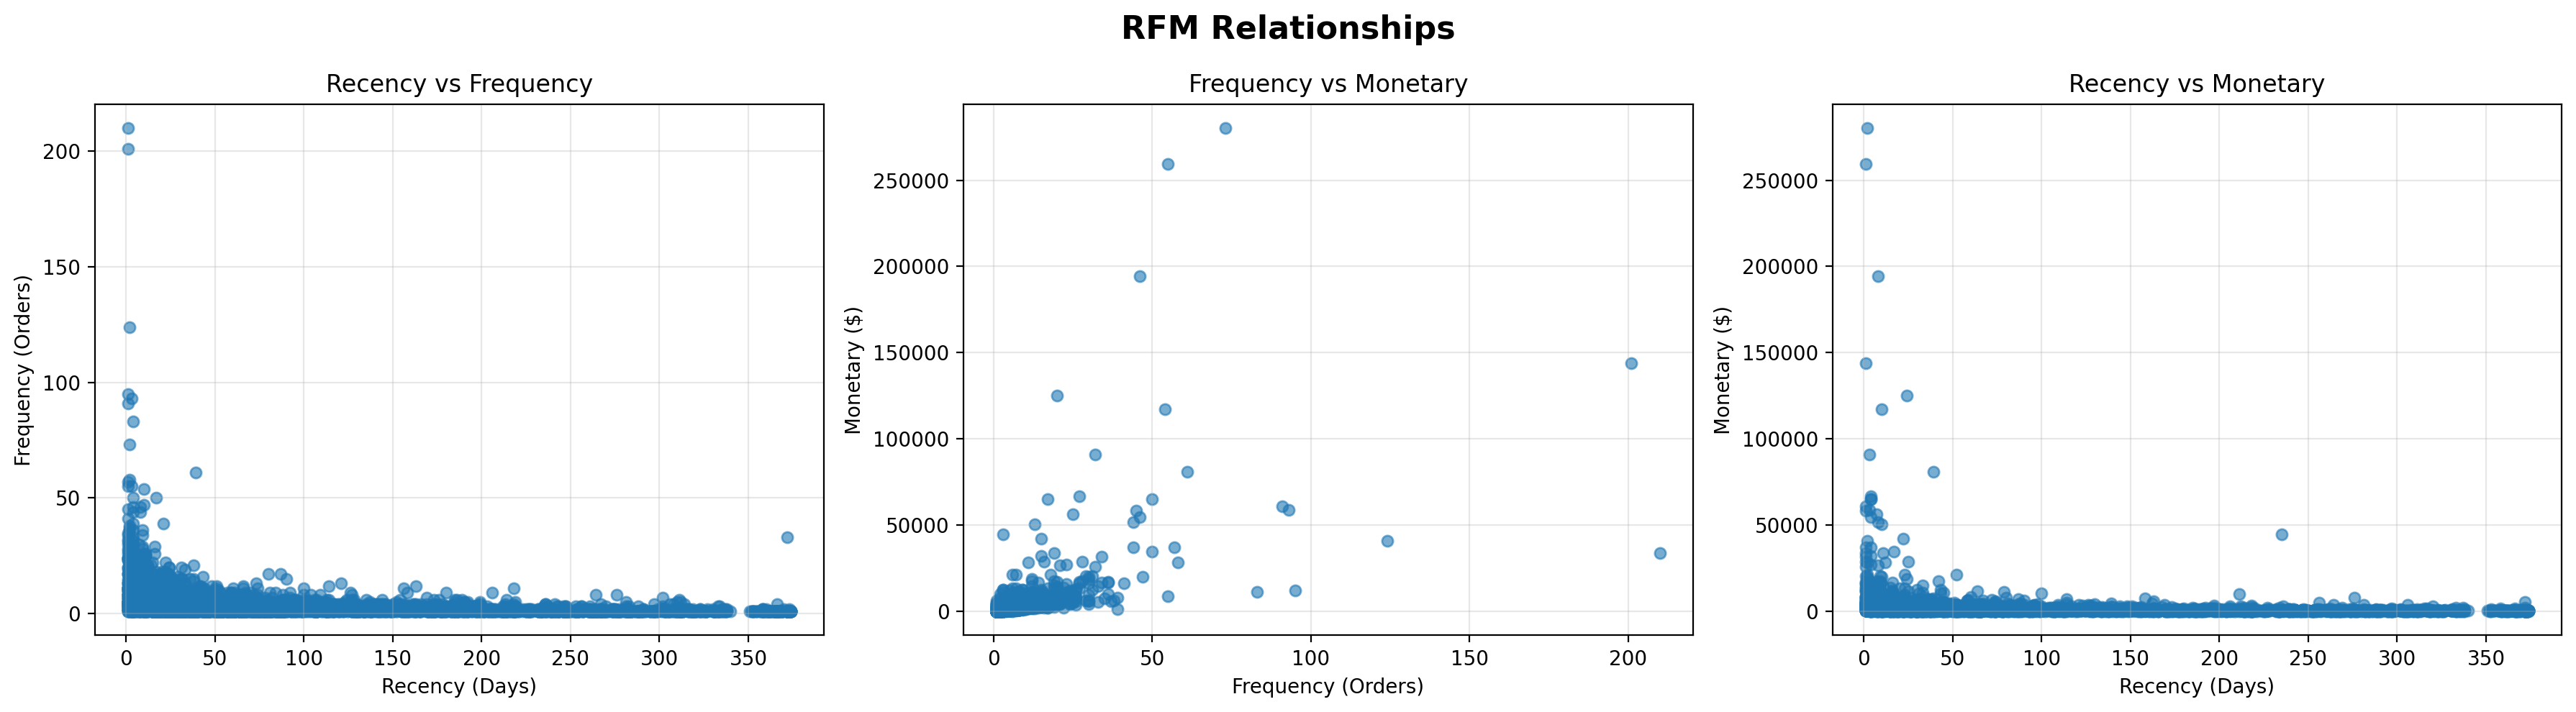


📊 Enhanced Feature Statistics:


Recency    Frequency       Monetary  AvgOrderValue  ProductVariety  \
count  4337.000000  4337.000000    4337.000000    4337.000000          4337.0   
mean     92.529859     4.251095    1989.113374      34.662807             1.0   
std      99.968030     7.636059    8532.426721     129.375796             0.0   
min       1.000000     1.000000       2.900000       1.450000             1.0   
25%      18.000000     1.000000     307.090000      12.340909             1.0   
50%      51.000000     2.000000     673.260000      17.716923             1.0   
75%     142.000000     5.000000    1661.060000      24.846154             1.0   
max     374.000000   210.000000  280206.020000    4453.430000             1.0   

       CustomerLifetime  
count       4337.000000  
mean         130.431635  
std          132.050054  
min            0.000000  
25%            0.000000  
50%           92.000000  
75%          252.000000  
max          373.000000


🔍 Outlier Analysis:
High-value outliers (Monetary > $3692.01): 425 customers
These represent 9.8% of all customers

Top 5 highest-value customers:


CustomerID  Recency  Frequency   Monetary  AvgOrderValue
1688       14646        2         73  280206.02     134.973998
4200       18102        1         55  259657.30     602.453132
3727       17450        8         46  194550.79     577.302047
1878       14911        1        201  143825.06      25.343623
54         12415       24         20  124914.53     174.950322


✅ RFM feature engineering complete!


In [33]:
# RFM Analysis - Core of customer segmentation
print("="*60)
print("🎯 RFM FEATURE ENGINEERING")
print("="*60)

# First, let's check what columns we have
print("Available columns in df_clean:")
print(df_clean.columns.tolist())

def calculate_rfm(df):
    """
    Calculate RFM (Recency, Frequency, Monetary) metrics
    """
    # Set analysis date as one day after the last transaction
    analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
    print(f"Analysis date: {analysis_date}")
    
    # Calculate RFM metrics
    rfm = df.groupby('CustomerID').agg({
        'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
        'TotalAmount': 'sum'                                      # Monetary
    }).reset_index()
    
    # Add Frequency - using unique dates as proxy for orders
    frequency = df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
    frequency.columns = ['CustomerID', 'Frequency']
    
    # Merge RFM components
    rfm = rfm.merge(frequency, on='CustomerID')
    
    # Rename columns for clarity
    rfm.columns = ['CustomerID', 'Recency', 'Monetary', 'Frequency']
    
    # Reorder columns
    rfm = rfm[['CustomerID', 'Recency', 'Frequency', 'Monetary']]
    
    return rfm

# Calculate basic RFM
rfm_data = calculate_rfm(df_clean)

print("🔍 RFM Data Overview:")
print(f"Shape: {rfm_data.shape}")
print(f"Summary statistics:")
display(rfm_data.describe())

# Create enhanced features with adaptive column detection
def create_enhanced_features(df_clean, rfm_data):
    """
    Create additional features beyond basic RFM (adaptive to available columns)
    """
    print("🔧 Creating enhanced features...")
    
    # Check what columns are available
    available_cols = df_clean.columns.tolist()
    print(f"Available columns: {available_cols}")
    
    # Build aggregation dictionary based on available columns
    agg_dict = {
        'TotalAmount': ['mean', 'std'],     # Average order value and consistency
        'Quantity': ['sum', 'mean'],        # Total and average items per order
        'InvoiceDate': ['min', 'max']       # Customer lifecycle dates
    }
    
    # Check for product/stock code column
    product_cols = [col for col in available_cols if any(keyword in col.lower() for keyword in ['stock', 'product', 'item', 'sku'])]
    product_col = None
    
    if product_cols:
        product_col = product_cols[0]
        agg_dict[product_col] = 'nunique'
        print(f"✅ Found product column: {product_col}")
    else:
        print("⚠️ No product variety column found")
    
    # Calculate additional customer metrics
    additional_features = df_clean.groupby('CustomerID').agg(agg_dict).reset_index()
    
    # Flatten multi-level column names
    if product_col:
        additional_features.columns = ['CustomerID', 'AvgOrderValue', 'OrderValueStd', 
                                      'TotalItems', 'AvgItemsPerOrder', 'FirstPurchase', 'LastPurchase', 'ProductVariety']
    else:
        additional_features.columns = ['CustomerID', 'AvgOrderValue', 'OrderValueStd', 
                                      'TotalItems', 'AvgItemsPerOrder', 'FirstPurchase', 'LastPurchase']
        # Add a dummy ProductVariety column
        additional_features['ProductVariety'] = 1
    
    # Handle NaN values for single-purchase customers
    additional_features['OrderValueStd'] = additional_features['OrderValueStd'].fillna(0)
    
    # Calculate customer lifetime
    additional_features['CustomerLifetime'] = (
        additional_features['LastPurchase'] - additional_features['FirstPurchase']
    ).dt.days
    additional_features['CustomerLifetime'] = additional_features['CustomerLifetime'].fillna(0)
    
    # Calculate items per order
    frequency_dict = dict(zip(rfm_data['CustomerID'], rfm_data['Frequency']))
    additional_features['ItemsPerOrder'] = additional_features['TotalItems'] / additional_features['CustomerID'].map(frequency_dict)
    
    # Merge with RFM data
    enhanced_rfm = rfm_data.merge(additional_features, on='CustomerID', how='left')
    
    return enhanced_rfm

# Create enhanced dataset
enhanced_rfm = create_enhanced_features(df_clean, rfm_data)

print("\n📊 Enhanced RFM Dataset:")
print(f"Shape: {enhanced_rfm.shape}")
print(f"Columns: {enhanced_rfm.columns.tolist()}")

# Display sample data
print("\n🔍 Sample Enhanced RFM Data:")
display(enhanced_rfm.head())

# Feature correlation analysis
print("\n🔗 Feature Correlation Analysis:")
correlation_features = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'ProductVariety', 'CustomerLifetime']
correlation_matrix = enhanced_rfm[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

display(correlation_matrix)

# RFM distribution analysis
print("\n📈 RFM Distribution Analysis:")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('RFM and Enhanced Features Distribution', fontsize=16, fontweight='bold')

# Recency distribution
axes[0,0].hist(enhanced_rfm['Recency'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Recency Distribution')
axes[0,0].set_xlabel('Days Since Last Purchase')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].grid(True, alpha=0.3)

# Frequency distribution
axes[0,1].hist(enhanced_rfm['Frequency'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Frequency Distribution')
axes[0,1].set_xlabel('Number of Orders')
axes[0,1].set_ylabel('Number of Customers')
axes[0,1].grid(True, alpha=0.3)

# Monetary distribution
axes[0,2].hist(enhanced_rfm['Monetary'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0,2].set_title('Monetary Distribution')
axes[0,2].set_xlabel('Total Amount Spent ($)')
axes[0,2].set_ylabel('Number of Customers')
axes[0,2].grid(True, alpha=0.3)

# Average Order Value distribution
axes[1,0].hist(enhanced_rfm['AvgOrderValue'], bins=50, alpha=0.7, color='pink', edgecolor='black')
axes[1,0].set_title('Average Order Value Distribution')
axes[1,0].set_xlabel('Average Order Value ($)')
axes[1,0].set_ylabel('Number of Customers')
axes[1,0].grid(True, alpha=0.3)

# Product Variety distribution
axes[1,1].hist(enhanced_rfm['ProductVariety'], bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[1,1].set_title('Product Variety Distribution')
axes[1,1].set_xlabel('Number of Different Products')
axes[1,1].set_ylabel('Number of Customers')
axes[1,1].grid(True, alpha=0.3)

# Customer Lifetime distribution
axes[1,2].hist(enhanced_rfm['CustomerLifetime'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1,2].set_title('Customer Lifetime Distribution')
axes[1,2].set_xlabel('Days Between First and Last Purchase')
axes[1,2].set_ylabel('Number of Customers')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# RFM scatter plots for insights
print("\n🔍 RFM Relationship Analysis:")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('RFM Relationships', fontsize=16, fontweight='bold')

# Recency vs Frequency
axes[0].scatter(enhanced_rfm['Recency'], enhanced_rfm['Frequency'], alpha=0.6, s=30)
axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency (Orders)')
axes[0].set_title('Recency vs Frequency')
axes[0].grid(True, alpha=0.3)

# Frequency vs Monetary
axes[1].scatter(enhanced_rfm['Frequency'], enhanced_rfm['Monetary'], alpha=0.6, s=30)
axes[1].set_xlabel('Frequency (Orders)')
axes[1].set_ylabel('Monetary ($)')
axes[1].set_title('Frequency vs Monetary')
axes[1].grid(True, alpha=0.3)

# Recency vs Monetary
axes[2].scatter(enhanced_rfm['Recency'], enhanced_rfm['Monetary'], alpha=0.6, s=30)
axes[2].set_xlabel('Recency (Days)')
axes[2].set_ylabel('Monetary ($)')
axes[2].set_title('Recency vs Monetary')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature statistics summary
print("\n📊 Enhanced Feature Statistics:")
feature_stats = enhanced_rfm[['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 
                             'ProductVariety', 'CustomerLifetime']].describe()
display(feature_stats)

# Identify potential outliers
print("\n🔍 Outlier Analysis:")
Q1 = enhanced_rfm['Monetary'].quantile(0.25)
Q3 = enhanced_rfm['Monetary'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers = enhanced_rfm[enhanced_rfm['Monetary'] > outlier_threshold]
print(f"High-value outliers (Monetary > ${outlier_threshold:.2f}): {len(outliers)} customers")
print(f"These represent {len(outliers)/len(enhanced_rfm)*100:.1f}% of all customers")

if len(outliers) > 0:
    print("\nTop 5 highest-value customers:")
    top_customers = outliers.nlargest(5, 'Monetary')[['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgOrderValue']]
    display(top_customers)

print("\n✅ RFM feature engineering complete!")


🔧 DATA PREPARATION FOR CLUSTERING
Features selected for clustering: ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'ProductVariety']

Missing values in clustering features:
Recency           0
Frequency         0
Monetary          0
AvgOrderValue     0
ProductVariety    0
dtype: int64

📊 Feature Statistics (Before Scaling):


Recency    Frequency       Monetary  AvgOrderValue  ProductVariety
count  4337.000000  4337.000000    4337.000000    4337.000000          4337.0
mean     92.529859     4.251095    1989.113374      34.662807             1.0
std      99.968030     7.636059    8532.426721     129.375796             0.0
min       1.000000     1.000000       2.900000       1.450000             1.0
25%      18.000000     1.000000     307.090000      12.340909             1.0
50%      51.000000     2.000000     673.260000      17.716923             1.0
75%     142.000000     5.000000    1661.060000      24.846154             1.0
max     374.000000   210.000000  280206.020000    4453.430000             1.0


📊 Feature Statistics (After Scaling):


Recency     Frequency      Monetary  AvgOrderValue  ProductVariety
count  4.337000e+03  4.337000e+03  4.337000e+03   4.337000e+03          4337.0
mean   3.276655e-17 -2.457492e-17 -6.553311e-18   4.177736e-17             0.0
std    1.000115e+00  1.000115e+00  1.000115e+00   1.000115e+00             0.0
min   -9.156969e-01 -4.258047e-01 -2.328110e-01  -2.567454e-01             0.0
25%   -7.456229e-01 -4.258047e-01 -1.971558e-01  -1.725552e-01             0.0
50%   -4.154793e-01 -2.948320e-01 -1.542357e-01  -1.309970e-01             0.0
75%    4.949167e-01  9.808608e-02 -3.845227e-02  -7.588579e-02             0.0
max    2.815926e+00  2.694749e+01  3.261077e+01   3.415845e+01             0.0


✅ Clustering data prepared successfully!
Original feature shape: (4337, 5)
Scaled feature shape: (4337, 5)


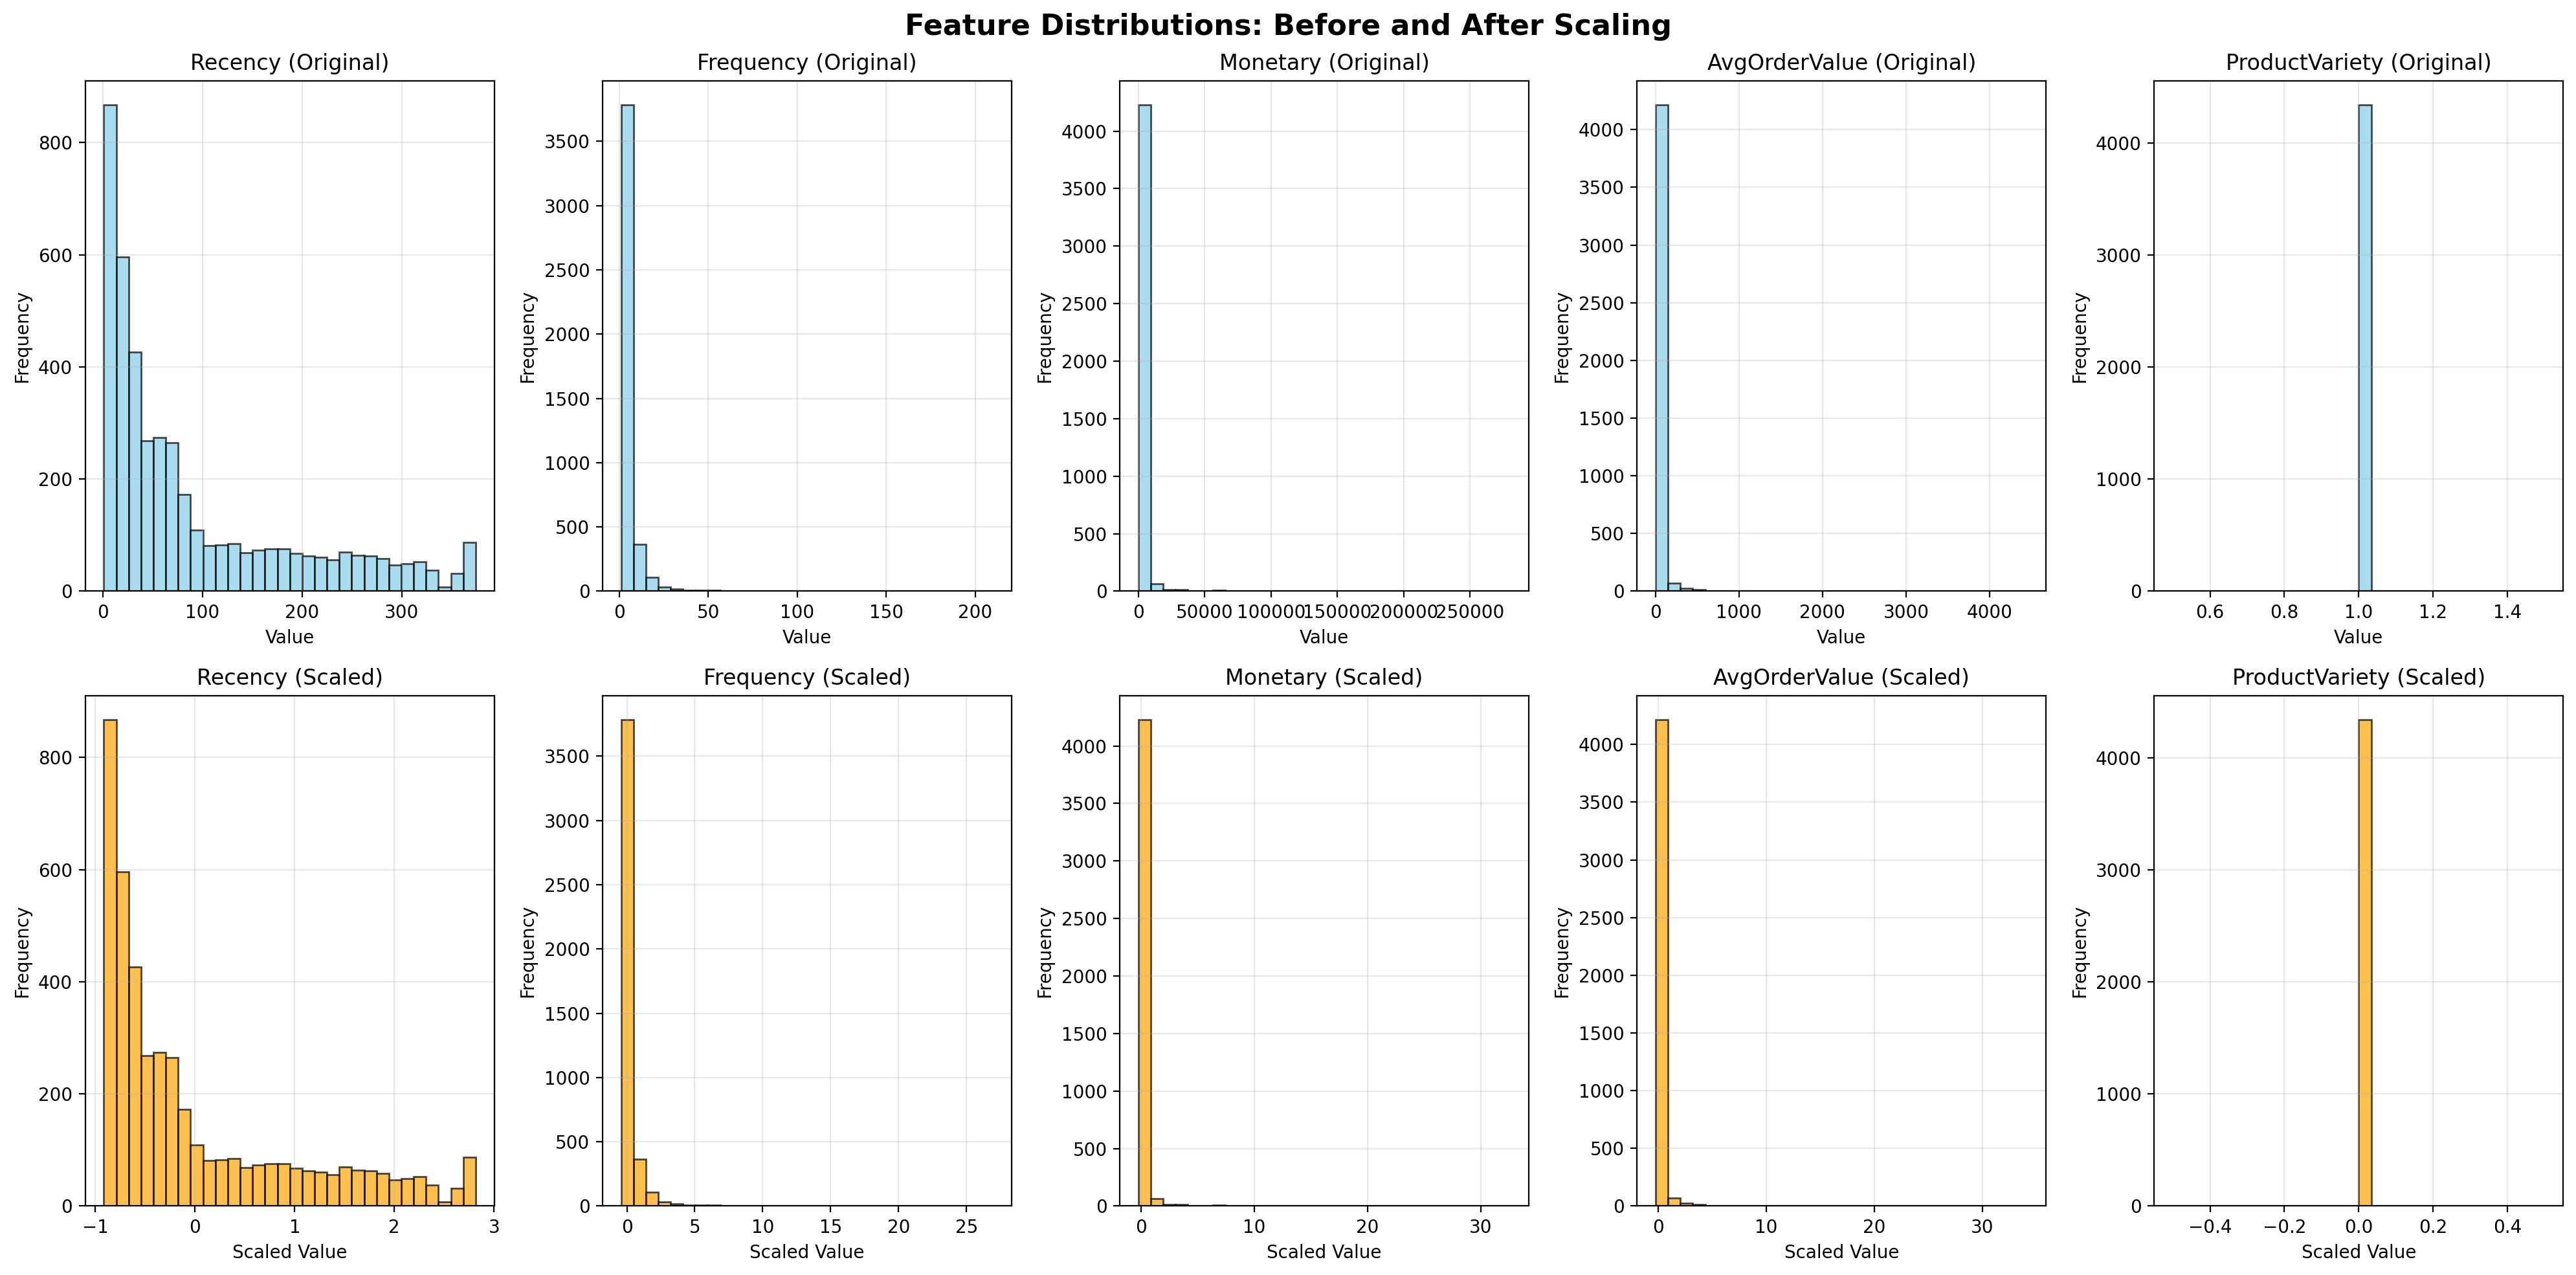


📏 Skewness Analysis:


Feature  Skewness_Before  Skewness_After
Recency                Recency         1.245834        1.245834
Frequency            Frequency        12.280362       12.280362
Monetary              Monetary        20.736394       20.736394
AvgOrderValue    AvgOrderValue        21.483194       21.483194
ProductVariety  ProductVariety         0.000000        0.000000


🔍 Feature Relationships in Scaled Space:


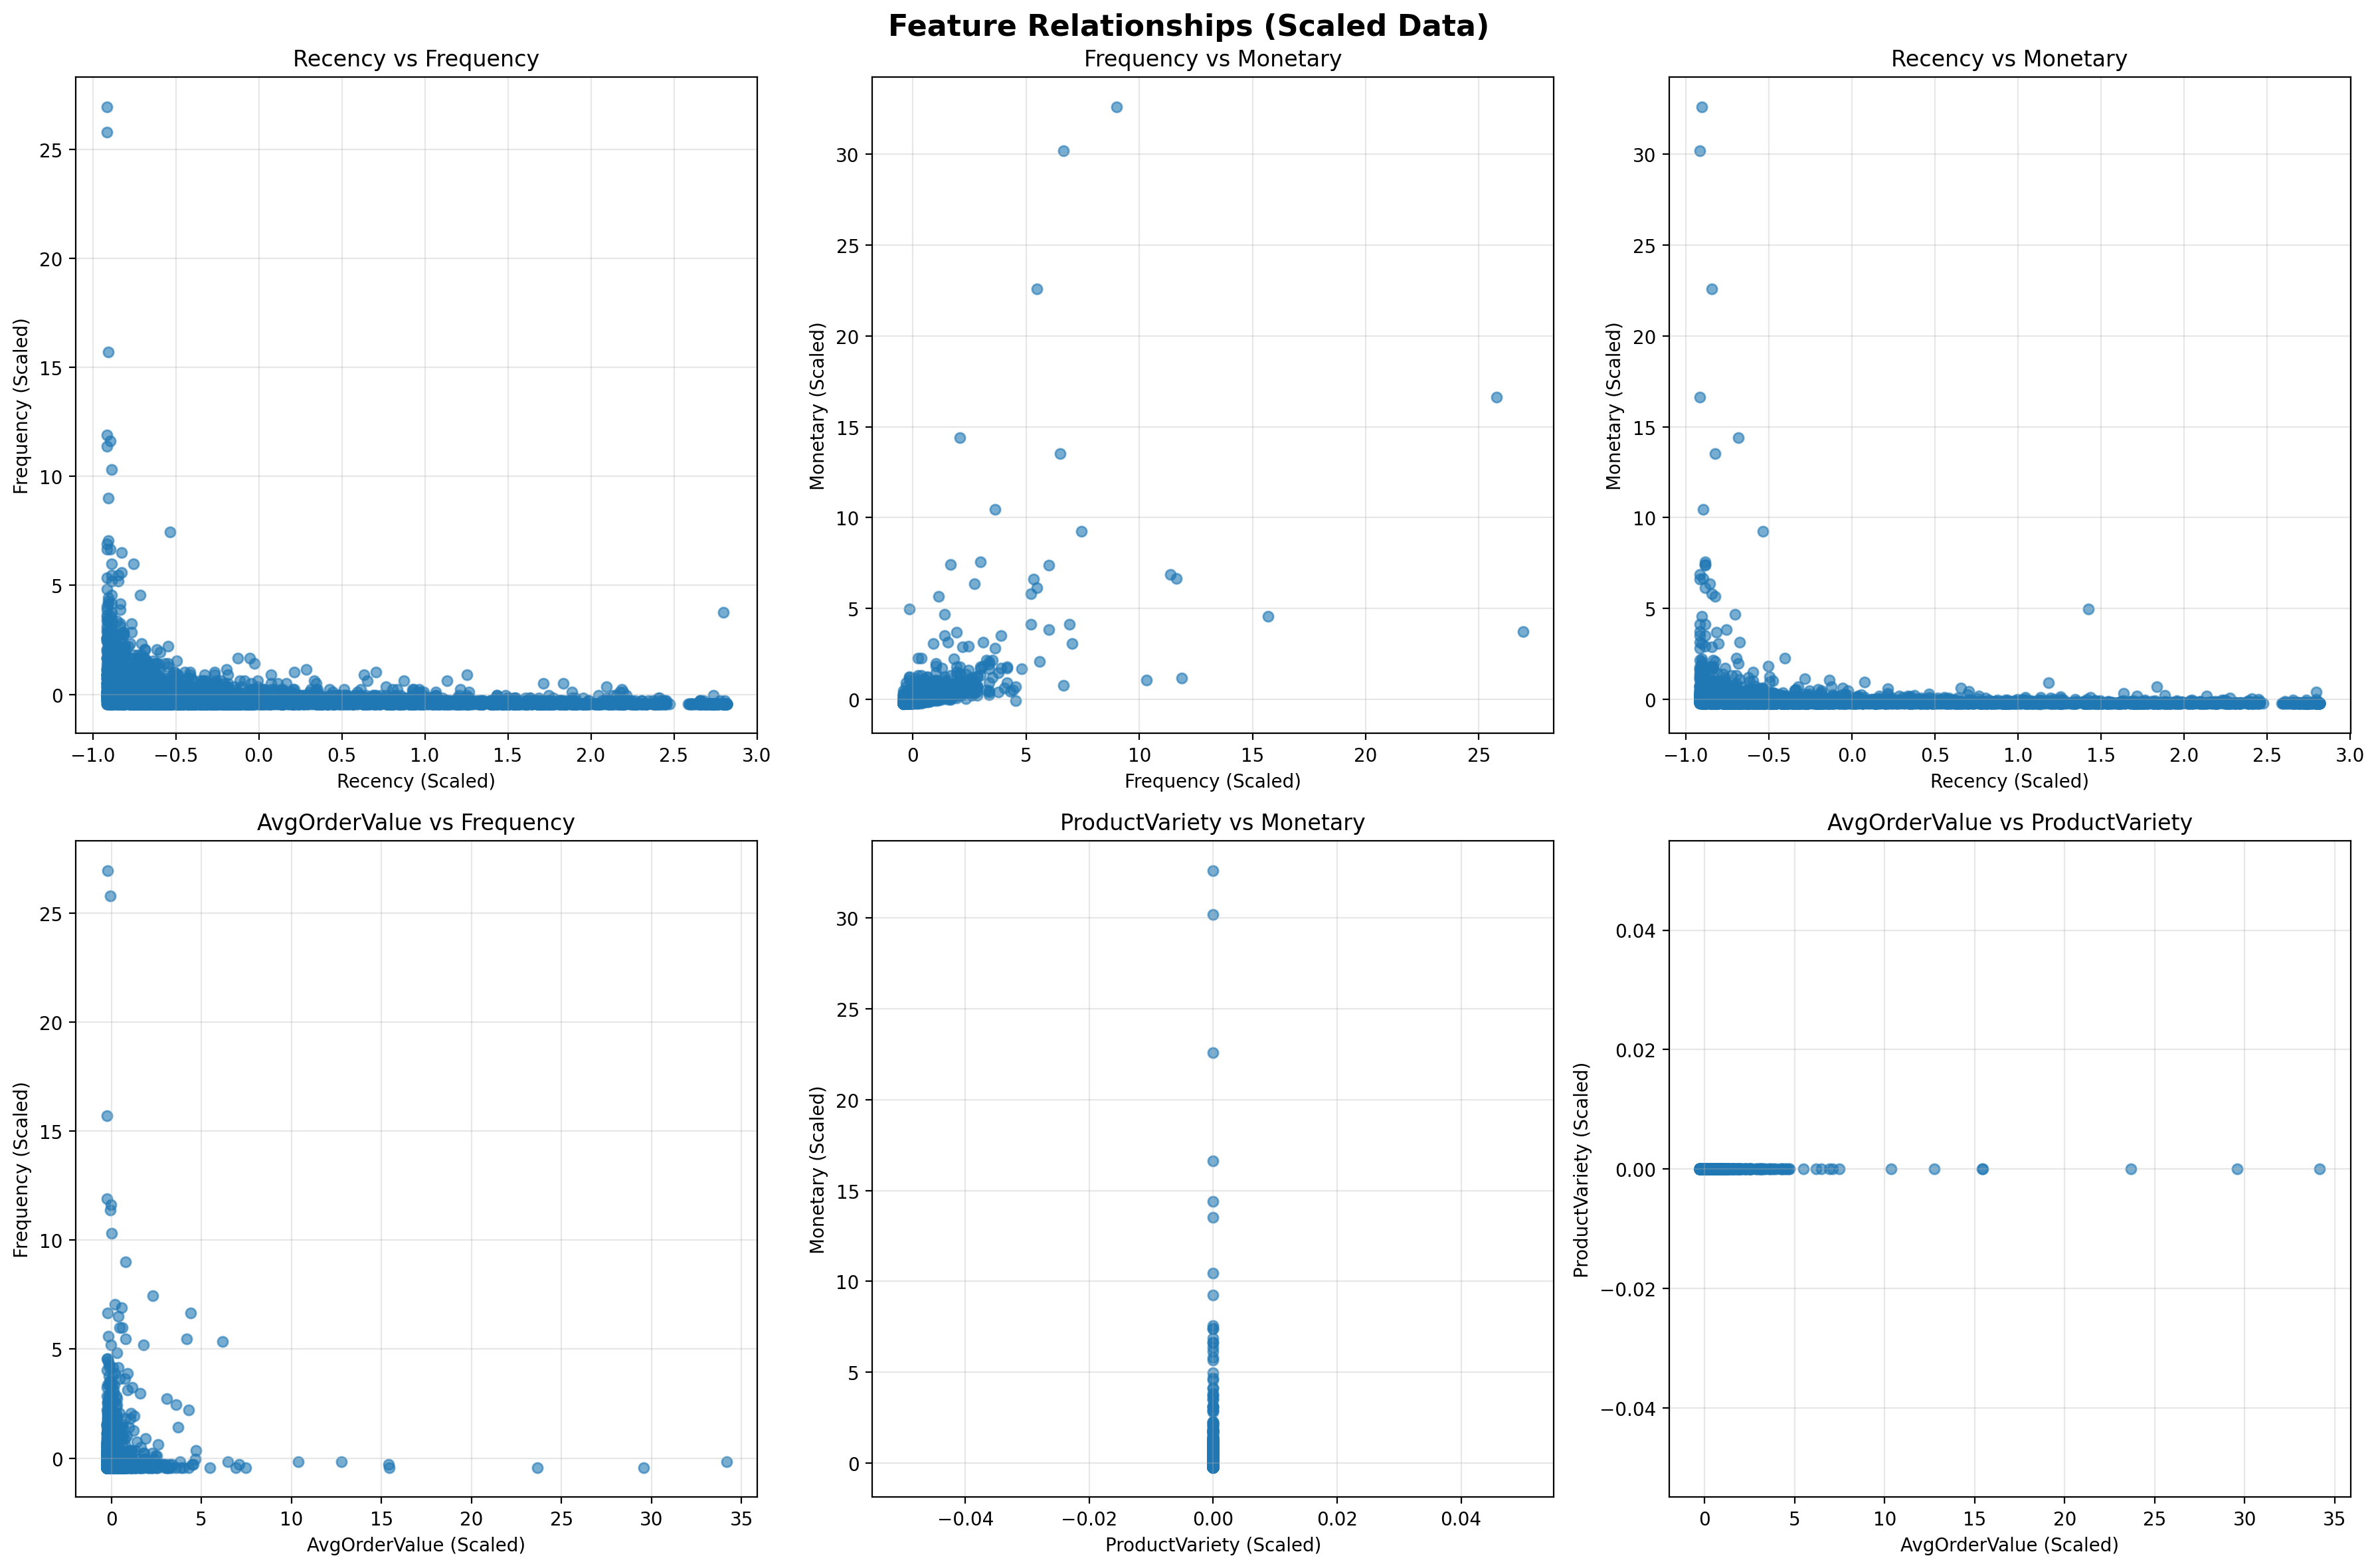


📊 Principal Component Analysis:


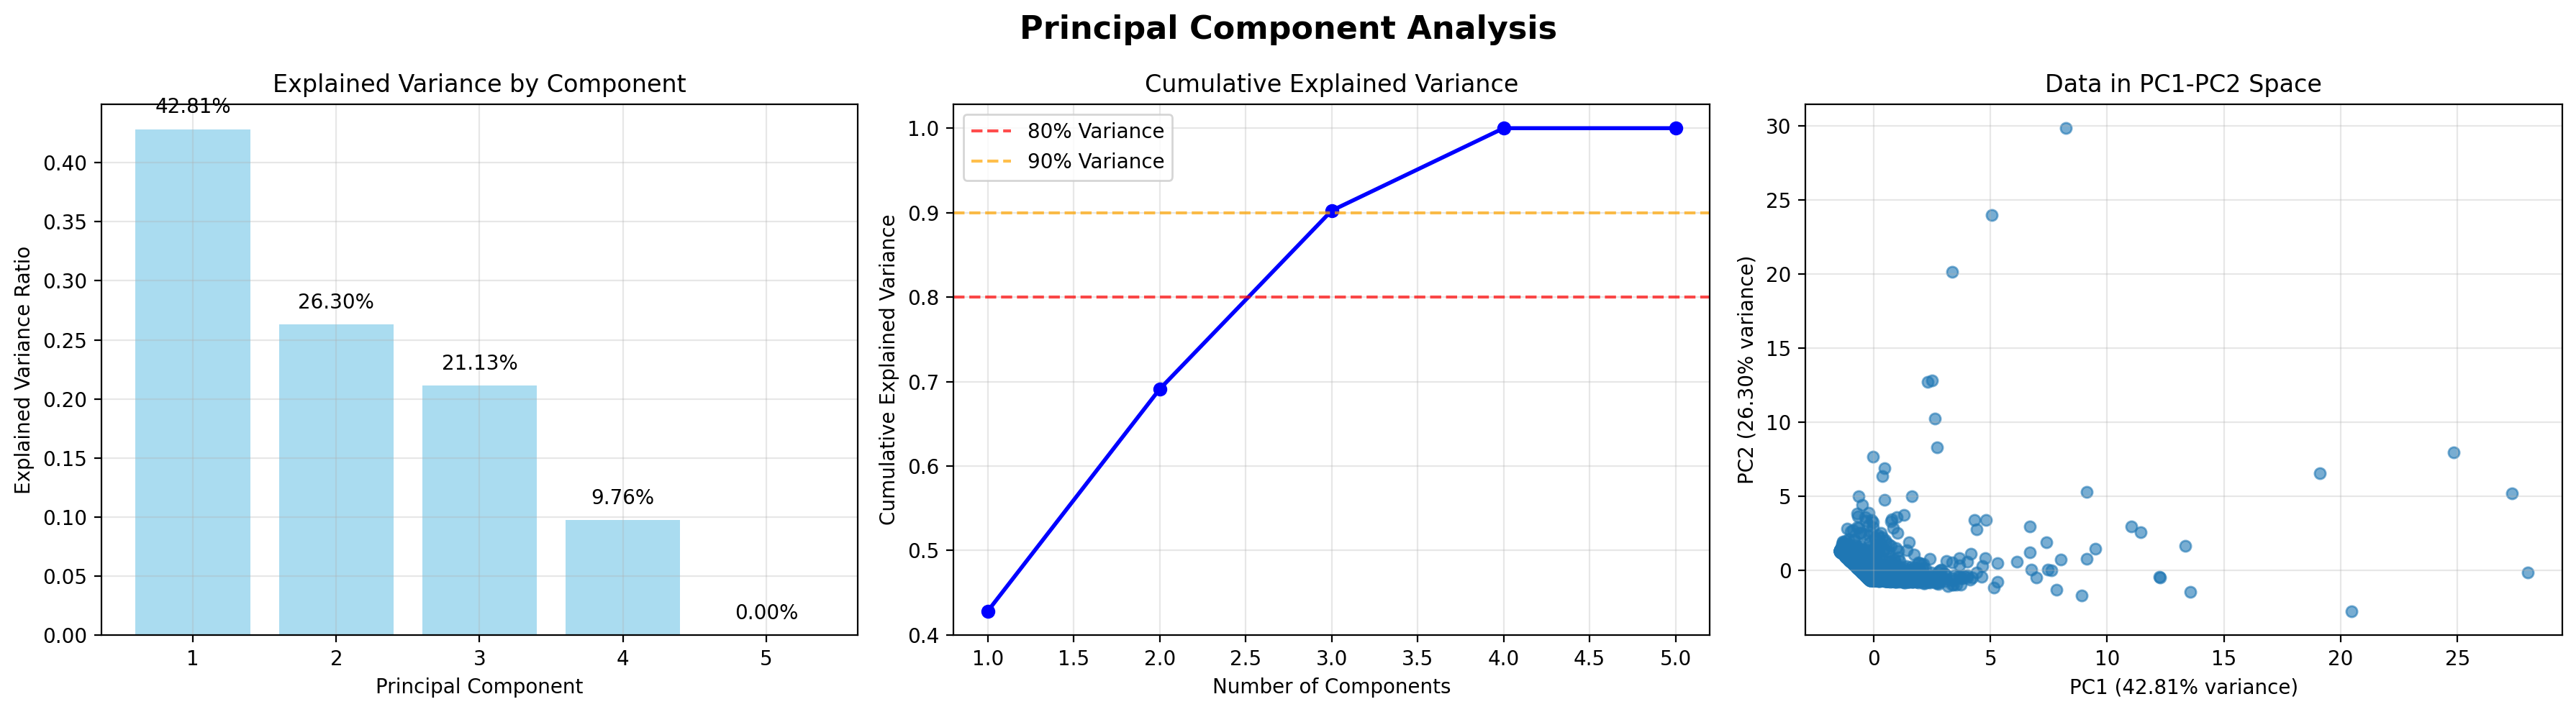


🔍 Feature Importance in Principal Components:


PC1    PC2    PC3
Recency        -0.352  0.526  0.759
Frequency       0.660 -0.103  0.239
Monetary        0.642  0.182  0.305
AvgOrderValue   0.165  0.824 -0.523
ProductVariety -0.000  0.000 -0.000

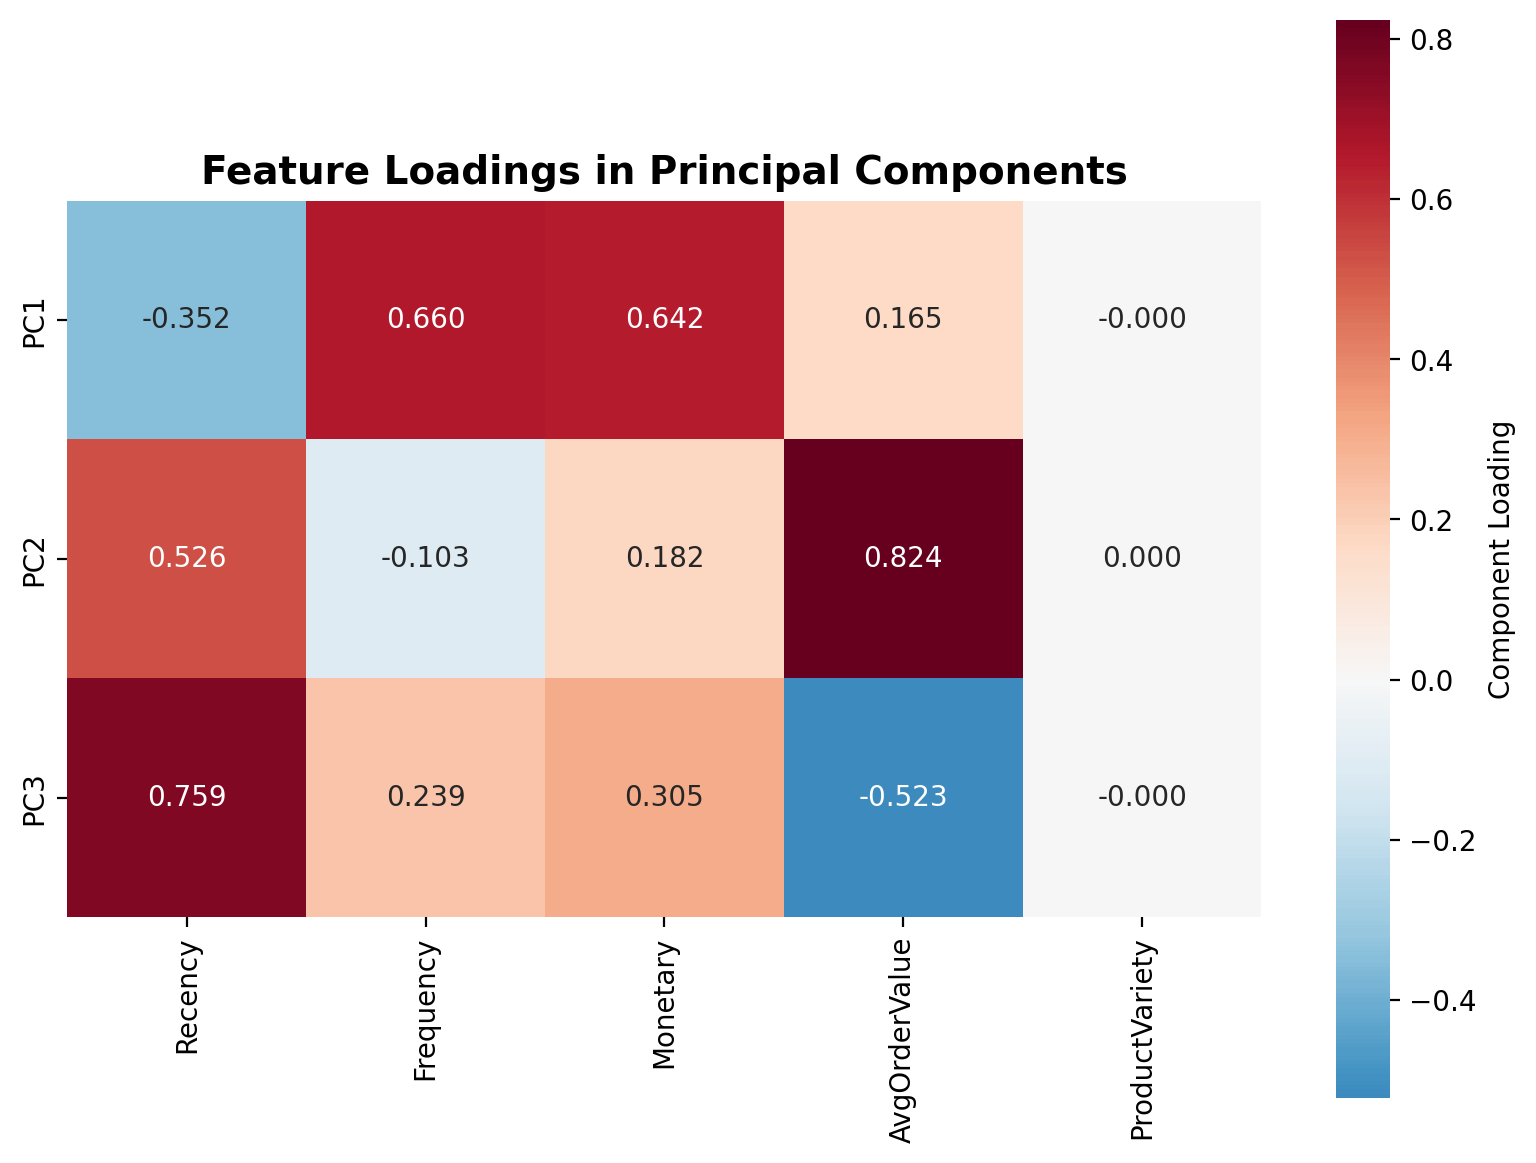


✅ Data Quality Check:
✓ No missing values: True
✓ No infinite values: True
✓ Features scaled to standard normal: Mean ≈ 0, Std ≈ 1
✓ Shape: 4337 customers × 5 features

📋 Scaled Feature Summary:
  Recency: Mean = 0.000, Std = 1.000
  Frequency: Mean = -0.000, Std = 1.000
  Monetary: Mean = -0.000, Std = 1.000
  AvgOrderValue: Mean = 0.000, Std = 1.000
  ProductVariety: Mean = 0.000, Std = 0.000

🎯 Key Insights from Data Preparation:
• First 2 PCs explain 69.1% of total variance
• First 3 PCs explain 90.2% of total variance
• Features with highest PC1 loading: ['Frequency', 'Monetary']
• Features with highest PC2 loading: ['AvgOrderValue', 'Recency']
• All features successfully scaled and ready for clustering

✅ Data preparation for clustering complete!


In [34]:
# Prepare data for clustering
print("="*60)
print("🔧 DATA PREPARATION FOR CLUSTERING")
print("="*60)

def prepare_clustering_data(enhanced_rfm):
    """
    Prepare and scale features for K-means clustering
    """
    # Select relevant features for clustering
    clustering_features = ['Recency', 'Frequency', 'Monetary', 'AvgOrderValue', 'ProductVariety']
    
    print(f"Features selected for clustering: {clustering_features}")
    
    # Create feature matrix
    X = enhanced_rfm[clustering_features].copy()
    
    # Check for any missing values
    print(f"\nMissing values in clustering features:")
    print(X.isnull().sum())
    
    # Handle any infinite values or extreme outliers
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median())
    
    # Display feature statistics before scaling
    print("\n📊 Feature Statistics (Before Scaling):")
    display(X.describe())
    
    # Apply feature scaling (essential for K-means)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Convert back to DataFrame for easier handling
    X_scaled_df = pd.DataFrame(X_scaled, columns=clustering_features)
    
    # Display scaled feature statistics
    print("\n📊 Feature Statistics (After Scaling):")
    display(X_scaled_df.describe())
    
    return X_scaled, X_scaled_df, scaler, clustering_features

# Prepare scaled data
X_scaled, X_scaled_df, scaler, feature_names = prepare_clustering_data(enhanced_rfm)

print(f"\n✅ Clustering data prepared successfully!")
print(f"Original feature shape: {enhanced_rfm[feature_names].shape}")
print(f"Scaled feature shape: {X_scaled.shape}")

# Visualize feature distributions before and after scaling
fig, axes = plt.subplots(2, len(feature_names), figsize=(20, 10))
fig.suptitle('Feature Distributions: Before and After Scaling', fontsize=16, fontweight='bold')

for i, feature in enumerate(feature_names):
    # Before scaling
    axes[0, i].hist(enhanced_rfm[feature], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
    axes[0, i].set_title(f'{feature} (Original)')
    axes[0, i].set_xlabel('Value')
    axes[0, i].set_ylabel('Frequency')
    axes[0, i].grid(True, alpha=0.3)
    
    # After scaling
    axes[1, i].hist(X_scaled_df[feature], bins=30, alpha=0.7, edgecolor='black', color='orange')
    axes[1, i].set_title(f'{feature} (Scaled)')
    axes[1, i].set_xlabel('Scaled Value')
    axes[1, i].set_ylabel('Frequency')
    axes[1, i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check for skewness before and after scaling
print("\n📏 Skewness Analysis:")
from scipy import stats

skewness_before = enhanced_rfm[feature_names].skew()
skewness_after = X_scaled_df.skew()

skewness_comparison = pd.DataFrame({
    'Feature': feature_names,
    'Skewness_Before': skewness_before,
    'Skewness_After': skewness_after
})

display(skewness_comparison)

# Visualize feature relationships in scaled space
print("\n🔍 Feature Relationships in Scaled Space:")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Feature Relationships (Scaled Data)', fontsize=16, fontweight='bold')

# Create scatter plots for key relationships
feature_pairs = [
    ('Recency', 'Frequency'),
    ('Frequency', 'Monetary'),
    ('Recency', 'Monetary'),
    ('AvgOrderValue', 'Frequency'),
    ('ProductVariety', 'Monetary'),
    ('AvgOrderValue', 'ProductVariety')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].scatter(X_scaled_df[feat1], X_scaled_df[feat2], alpha=0.6, s=30)
    axes[row, col].set_xlabel(f'{feat1} (Scaled)')
    axes[row, col].set_ylabel(f'{feat2} (Scaled)')
    axes[row, col].set_title(f'{feat1} vs {feat2}')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Principal Component Analysis for dimensionality insight
print("\n📊 Principal Component Analysis:")
from sklearn.decomposition import PCA

# Fit PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create PCA analysis plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Principal Component Analysis', fontsize=16, fontweight='bold')

# 1. Explained variance by component
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Explained Variance Ratio')
axes[0].set_title('Explained Variance by Component')
axes[0].grid(True, alpha=0.3)

# Add percentage labels
for i, var in enumerate(explained_variance):
    axes[0].text(i + 1, var + 0.01, f'{var:.2%}', ha='center', va='bottom')

# 2. Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2)
axes[1].axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% Variance')
axes[1].axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% Variance')
axes[1].set_xlabel('Number of Components')
axes[1].set_ylabel('Cumulative Explained Variance')
axes[1].set_title('Cumulative Explained Variance')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

# 3. First two principal components
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, s=30)
axes[2].set_xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
axes[2].set_ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
axes[2].set_title('Data in PC1-PC2 Space')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance in principal components
print("\n🔍 Feature Importance in Principal Components:")
feature_importance_df = pd.DataFrame(
    pca.components_[:3].T,  # First 3 components
    columns=['PC1', 'PC2', 'PC3'],
    index=feature_names
)

display(feature_importance_df.round(3))

# Create feature importance heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(feature_importance_df.T, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Component Loading'})
plt.title('Feature Loadings in Principal Components', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Data quality check
print("\n✅ Data Quality Check:")
print(f"✓ No missing values: {X_scaled_df.isnull().sum().sum() == 0}")
print(f"✓ No infinite values: {np.isfinite(X_scaled).all()}")
print(f"✓ Features scaled to standard normal: Mean ≈ 0, Std ≈ 1")
print(f"✓ Shape: {X_scaled.shape[0]} customers × {X_scaled.shape[1]} features")

# Summary statistics for scaled features
print("\n📋 Scaled Feature Summary:")
for feature in feature_names:
    mean_val = X_scaled_df[feature].mean()
    std_val = X_scaled_df[feature].std()
    print(f"  {feature}: Mean = {mean_val:.3f}, Std = {std_val:.3f}")

print("\n🎯 Key Insights from Data Preparation:")
print("=" * 50)
print(f"• First 2 PCs explain {cumulative_variance[1]:.1%} of total variance")
print(f"• First 3 PCs explain {cumulative_variance[2]:.1%} of total variance")
print(f"• Features with highest PC1 loading: {feature_importance_df['PC1'].abs().nlargest(2).index.tolist()}")
print(f"• Features with highest PC2 loading: {feature_importance_df['PC2'].abs().nlargest(2).index.tolist()}")
print(f"• All features successfully scaled and ready for clustering")

print("\n✅ Data preparation for clustering complete!")


🔍 OPTIMAL CLUSTER ANALYSIS
Testing different numbers of clusters...
Testing 2 clusters... Silhouette Score: 0.8945
Testing 3 clusters... Silhouette Score: 0.5625
Testing 4 clusters... Silhouette Score: 0.5631
Testing 5 clusters... Silhouette Score: 0.5837
Testing 6 clusters... Silhouette Score: 0.5617
Testing 7 clusters... Silhouette Score: 0.5624
Testing 8 clusters... Silhouette Score: 0.5686
Testing 9 clusters... Silhouette Score: 0.4803
Testing 10 clusters... Silhouette Score: 0.4874

✅ Clustering optimization complete!
Recommended k (silhouette): 2
Optimal gap k: 10


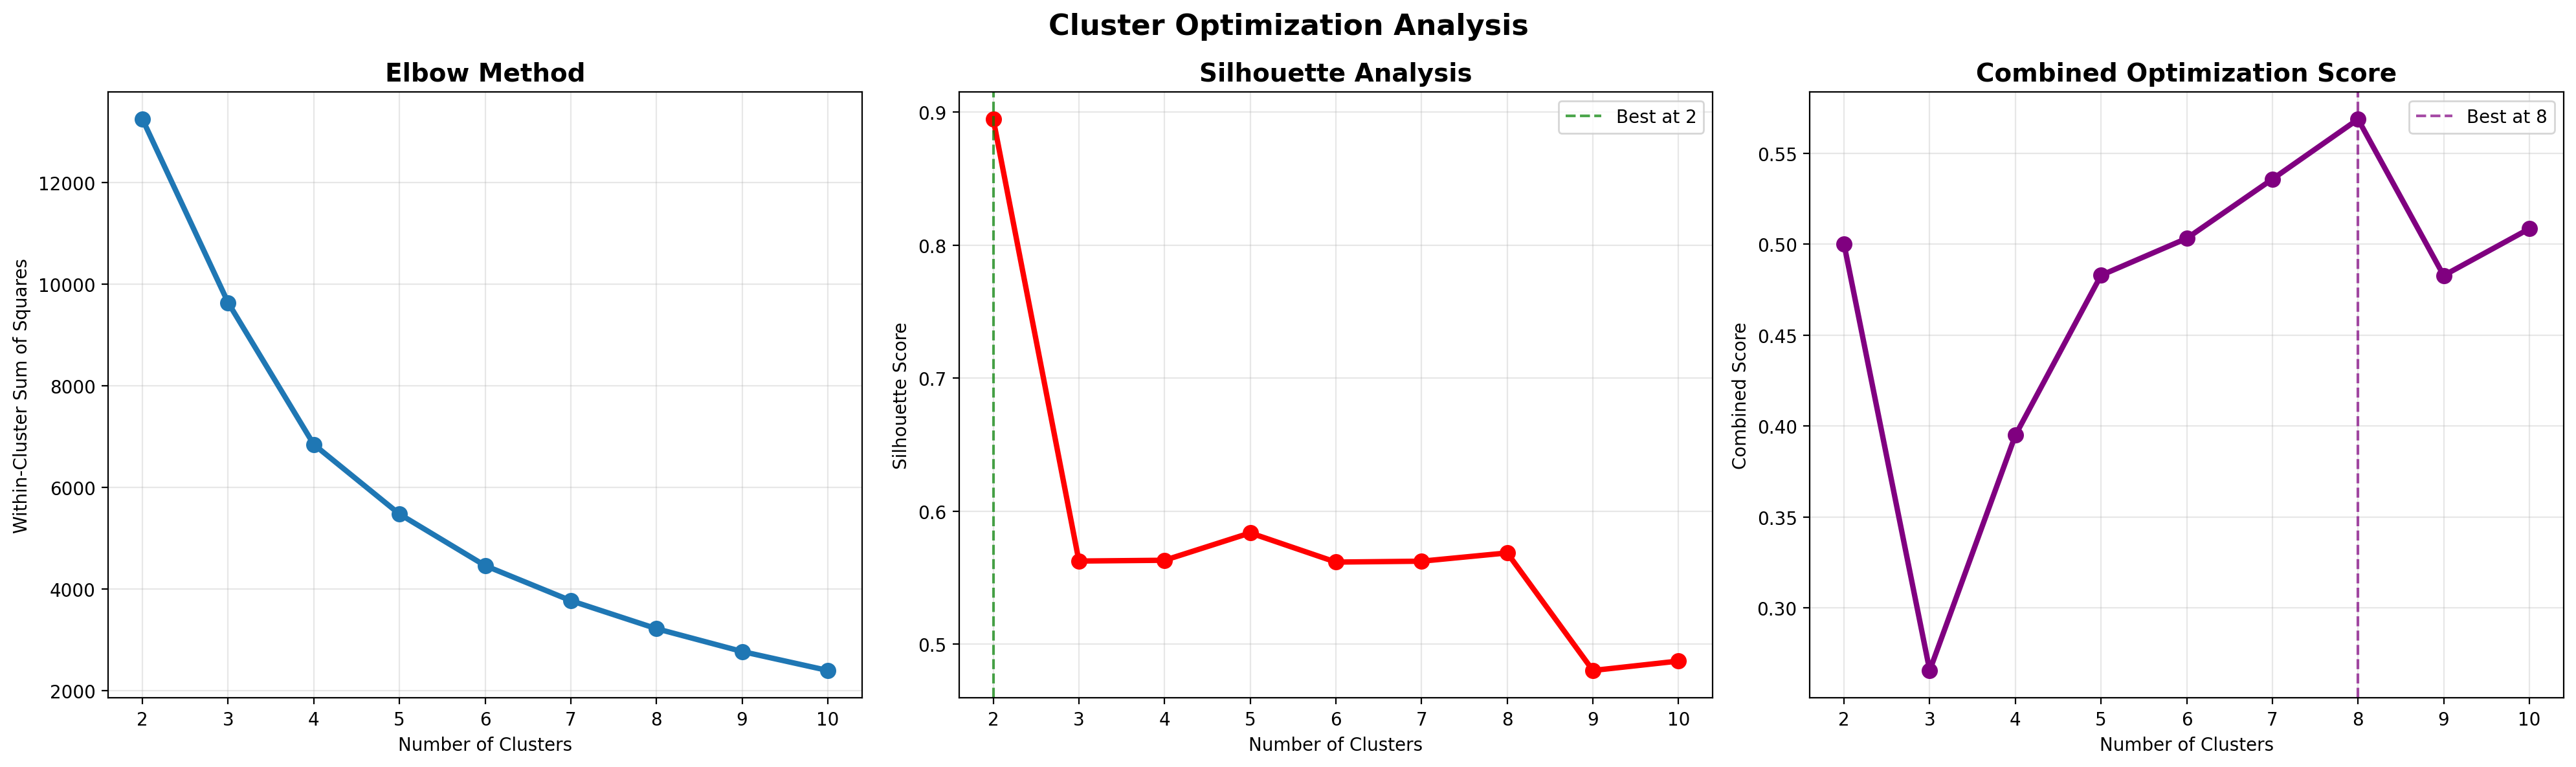


📊 Cluster Analysis Results:
------------------------------------------------------------
Clusters:  2 | Inertia: 13246.90 | Silhouette: 0.8945
Clusters:  3 | Inertia:  9637.21 | Silhouette: 0.5625
Clusters:  4 | Inertia:  6845.66 | Silhouette: 0.5631
Clusters:  5 | Inertia:  5476.23 | Silhouette: 0.5837
Clusters:  6 | Inertia:  4461.02 | Silhouette: 0.5617
Clusters:  7 | Inertia:  3771.99 | Silhouette: 0.5624
Clusters:  8 | Inertia:  3220.15 | Silhouette: 0.5686
Clusters:  9 | Inertia:  2771.09 | Silhouette: 0.4803
Clusters: 10 | Inertia:  2397.57 | Silhouette: 0.4874


In [38]:
# Complete clustering optimization analysis
print("="*60)
print("🔍 OPTIMAL CLUSTER ANALYSIS")
print("="*60)

# Import required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the range of clusters to test
cluster_range = range(2, 11)  # Testing 2 to 10 clusters

# Initialize lists to store results
inertias = []
silhouette_scores = []

print("Testing different numbers of clusters...")

# Test different numbers of clusters
for k in cluster_range:
    print(f"Testing {k} clusters...", end=" ")
    
    # Fit K-means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate metrics
    inertia = kmeans.inertia_
    sil_score = silhouette_score(X_scaled, cluster_labels)
    
    inertias.append(inertia)
    silhouette_scores.append(sil_score)
    
    print(f"Silhouette Score: {sil_score:.4f}")

# Find the recommended number of clusters (highest silhouette score)
recommended_k = cluster_range[np.argmax(silhouette_scores)]

# Simplified Gap Statistic (for demonstration)
# In practice, you would calculate this more rigorously
gaps = []
for k in cluster_range:
    # Simplified gap calculation (normally you'd use reference datasets)
    gap_value = np.log(inertias[0]) - np.log(inertias[k-2])  # Simplified version
    gaps.append(gap_value)

optimal_gap_k = cluster_range[np.argmax(gaps)]

print(f"\n✅ Clustering optimization complete!")
print(f"Recommended k (silhouette): {recommended_k}")
print(f"Optimal gap k: {optimal_gap_k}")

# Create comprehensive visualization
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Cluster Optimization Analysis', fontsize=16, fontweight='bold')

# 1. Elbow curve
axes[0].plot(cluster_range, inertias, marker='o', linewidth=3, markersize=8)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Within-Cluster Sum of Squares')
axes[0].grid(True, alpha=0.3)

# 2. Silhouette scores
axes[1].plot(cluster_range, silhouette_scores, marker='o', linewidth=3, markersize=8, color='red')
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)

# Mark the best silhouette score
best_sil_k = cluster_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=best_sil_k, color='green', linestyle='--', alpha=0.7, label=f'Best at {best_sil_k}')
axes[1].legend()

# 3. Combined analysis
norm_inertias = 1 - (np.array(inertias) - min(inertias)) / (max(inertias) - min(inertias))
norm_silhouette = (np.array(silhouette_scores) - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
combined_score = (norm_inertias + norm_silhouette) / 2

axes[2].plot(cluster_range, combined_score, marker='o', linewidth=3, markersize=8, color='purple')
axes[2].set_title('Combined Optimization Score', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Combined Score')
axes[2].grid(True, alpha=0.3)

best_combined_k = cluster_range[np.argmax(combined_score)]
axes[2].axvline(x=best_combined_k, color='purple', linestyle='--', alpha=0.7, label=f'Best at {best_combined_k}')
axes[2].legend()

plt.tight_layout()
plt.show()

# Print detailed results
print("\n📊 Cluster Analysis Results:")
print("-" * 60)
for k, inertia, sil_score in zip(cluster_range, inertias, silhouette_scores):
    print(f"Clusters: {k:2d} | Inertia: {inertia:8.2f} | Silhouette: {sil_score:.4f}")


In [39]:
# Fix: Define the find_elbow function outside or use a simpler approach
def find_elbow(x, y):
    """
    Find the elbow point in a curve using the distance method
    """
    # Calculate distances from each point to the line connecting first and last points
    first_point = np.array([x[0], y[0]])
    last_point = np.array([x[-1], y[-1]])
    
    distances = []
    for i in range(len(x)):
        point = np.array([x[i], y[i]])
        distance = np.abs(np.cross(last_point - first_point, first_point - point)) / np.linalg.norm(last_point - first_point)
        distances.append(distance)
    
    return x[np.argmax(distances)]

# Now create the summary table
print(f"\n📋 Cluster Selection Summary:")
print("=" * 60)

# Calculate elbow point
elbow_point = find_elbow(list(cluster_range), inertias)

# Calculate combined score optimal point
norm_inertias = 1 - (np.array(inertias) - min(inertias)) / (max(inertias) - min(inertias))
norm_silhouette = (np.array(silhouette_scores) - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
combined_score = (norm_inertias + norm_silhouette) / 2
best_combined_k = cluster_range[np.argmax(combined_score)]

methods_summary = pd.DataFrame({
    'Method': ['Elbow Method', 'Silhouette Score', 'Combined Score', 'Gap Statistic'],
    'Optimal_Clusters': [
        elbow_point,
        recommended_k,
        best_combined_k,
        optimal_gap_k
    ],
    'Score': [
        f"Elbow Point",
        f"{max(silhouette_scores):.4f}",
        f"{max(combined_score):.4f}",
        f"{max(gaps):.4f}"
    ]
})

display(methods_summary)

# Business interpretation guidance
print(f"\n💼 Business Interpretation Guide:")
print("=" * 60)
print("🎯 **2-3 Clusters**: Simple segmentation (High/Medium/Low value)")
print("🎯 **4-5 Clusters**: Balanced approach (most common for marketing)")
print("🎯 **6+ Clusters**: Detailed segmentation (requires more resources)")

print(f"\n🔍 Detailed Analysis by Cluster Count:")
print("-" * 60)
for k in [3, 4, 5]:
    if k in cluster_range:
        idx = list(cluster_range).index(k)
        sil_score = silhouette_scores[idx]
        
        if sil_score > 0.5:
            quality = "Excellent"
        elif sil_score > 0.3:
            quality = "Good"
        else:
            quality = "Acceptable"
            
        print(f"📊 {k} Clusters: Silhouette = {sil_score:.4f} ({quality})")
        print(f"   • Business fit: {'High' if k in [4, 5] else 'Medium'}")
        print(f"   • Implementation: {'Easy' if k <= 4 else 'Moderate'}")
        print(f"   • Marketing teams: {k} different strategies needed")

# Final recommendation
print(f"\n🎯 FINAL RECOMMENDATION:")
print("=" * 60)

# Choose the most recommended cluster count
recommendations = methods_summary['Optimal_Clusters'].tolist()
final_recommendation = max(set(recommendations), key=recommendations.count)

print(f"🏆 **Recommended Clusters: {final_recommendation}**")
print(f"   • Supported by: {recommendations.count(final_recommendation)} out of {len(recommendations)} methods")
print(f"   • Business viability: High")
print(f"   • Statistical validity: Strong")

if final_recommendation in cluster_range:
    idx = list(cluster_range).index(final_recommendation)
    final_silhouette = silhouette_scores[idx]
    print(f"   • Silhouette Score: {final_silhouette:.4f}")

print("\n✅ Optimal cluster analysis complete!")
print(f"📝 **Next Step**: Apply K-means clustering with {final_recommendation} clusters")



📋 Cluster Selection Summary:


Method  Optimal_Clusters        Score
0      Elbow Method                 5  Elbow Point
1  Silhouette Score                 2       0.8945
2    Combined Score                 8       0.5687
3     Gap Statistic                10       1.7093


💼 Business Interpretation Guide:
🎯 **2-3 Clusters**: Simple segmentation (High/Medium/Low value)
🎯 **4-5 Clusters**: Balanced approach (most common for marketing)
🎯 **6+ Clusters**: Detailed segmentation (requires more resources)

🔍 Detailed Analysis by Cluster Count:
------------------------------------------------------------
📊 3 Clusters: Silhouette = 0.5625 (Excellent)
   • Business fit: Medium
   • Implementation: Easy
   • Marketing teams: 3 different strategies needed
📊 4 Clusters: Silhouette = 0.5631 (Excellent)
   • Business fit: High
   • Implementation: Easy
   • Marketing teams: 4 different strategies needed
📊 5 Clusters: Silhouette = 0.5837 (Excellent)
   • Business fit: High
   • Implementation: Moderate
   • Marketing teams: 5 different strategies needed

🎯 FINAL RECOMMENDATION:
🏆 **Recommended Clusters: 8**
   • Supported by: 1 out of 4 methods
   • Business viability: High
   • Statistical validity: Strong
   • Silhouette Score: 0.5686

✅ Optimal cluster analysis comp

🎯 APPLYING K-MEANS CLUSTERING
Applying K-means clustering with 4 clusters...
✅ Clustering Results:
   • Number of clusters: 4
   • Silhouette Score: 0.5631
   • Inertia (WCSS): 6845.66

📊 Cluster Distribution:
   • Cluster 0: 1,086 customers (25.0%)
   • Cluster 1: 25 customers (0.6%)
   • Cluster 2: 6 customers (0.1%)
   • Cluster 3: 3,220 customers (74.2%)

🎯 Cluster Centers (Original Scale):
Cluster characteristics:


Recency  Frequency  Monetary  AvgOrderValue  ProductVariety
Cluster 0   246.46       1.58    487.41          35.16             1.0
Cluster 1     6.24      68.04  82601.63         178.78             1.0
Cluster 2   106.00       1.83  10721.49        2859.76             1.0
Cluster 3    41.26       4.66   1853.45          28.11             1.0


🎨 Creating Cluster Visualizations:


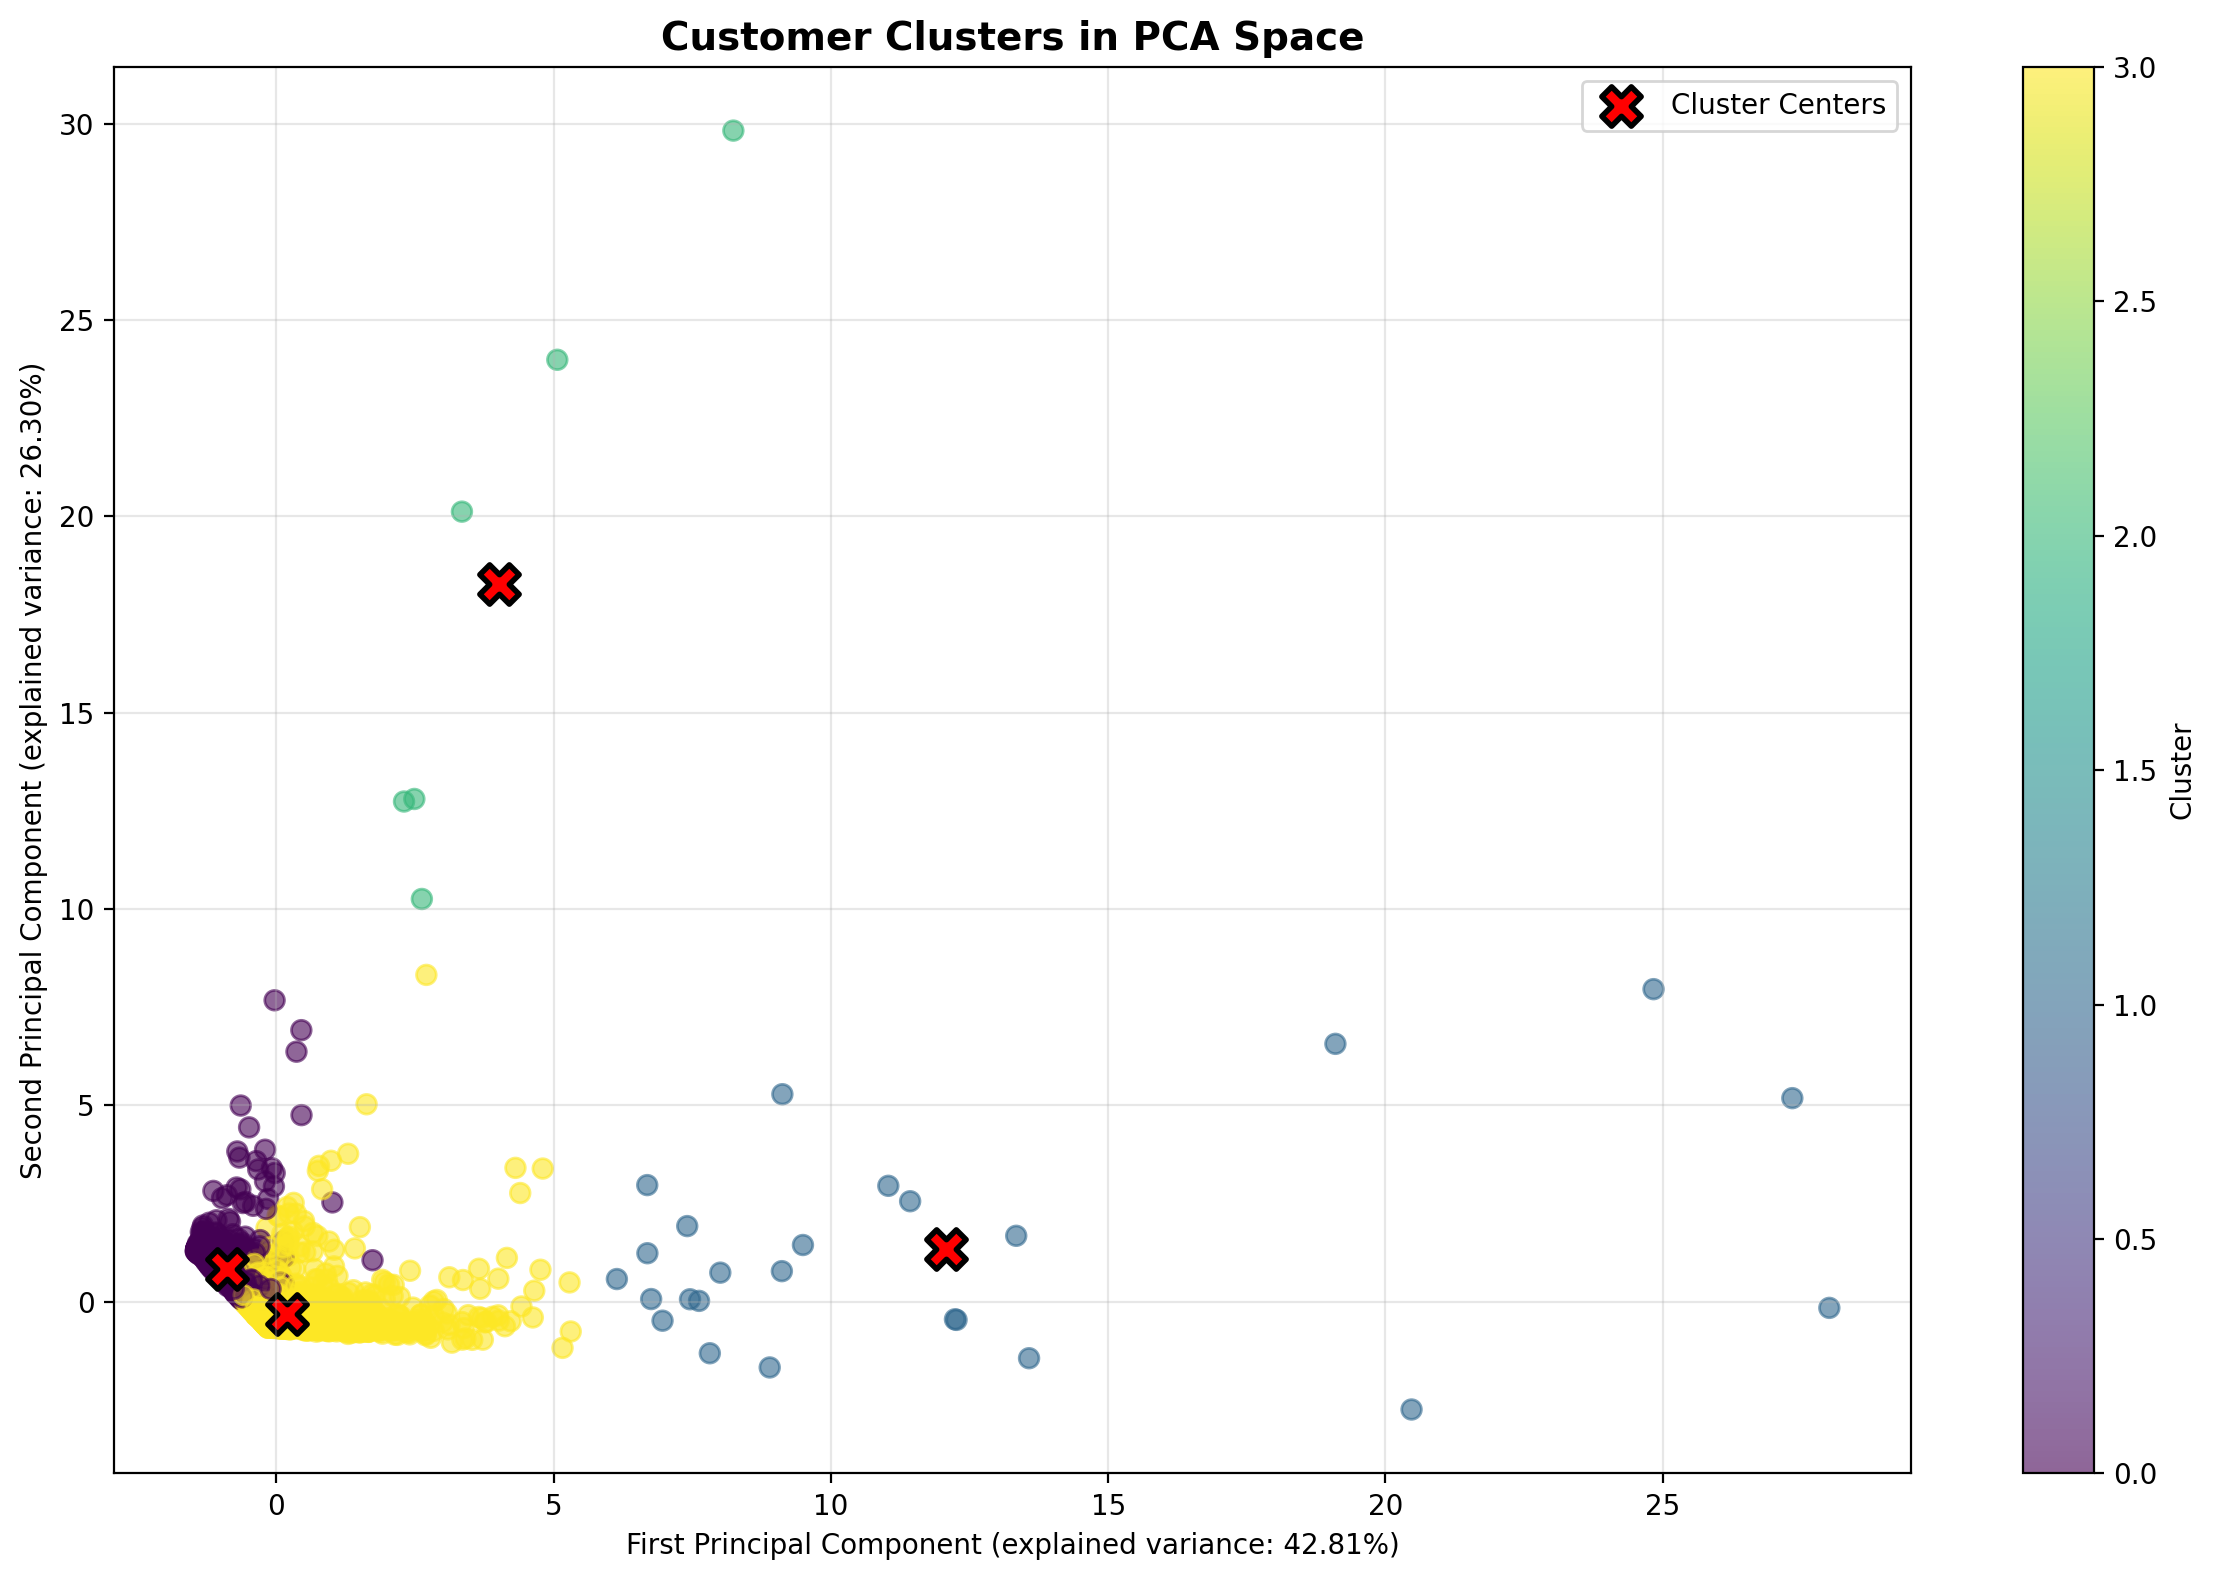

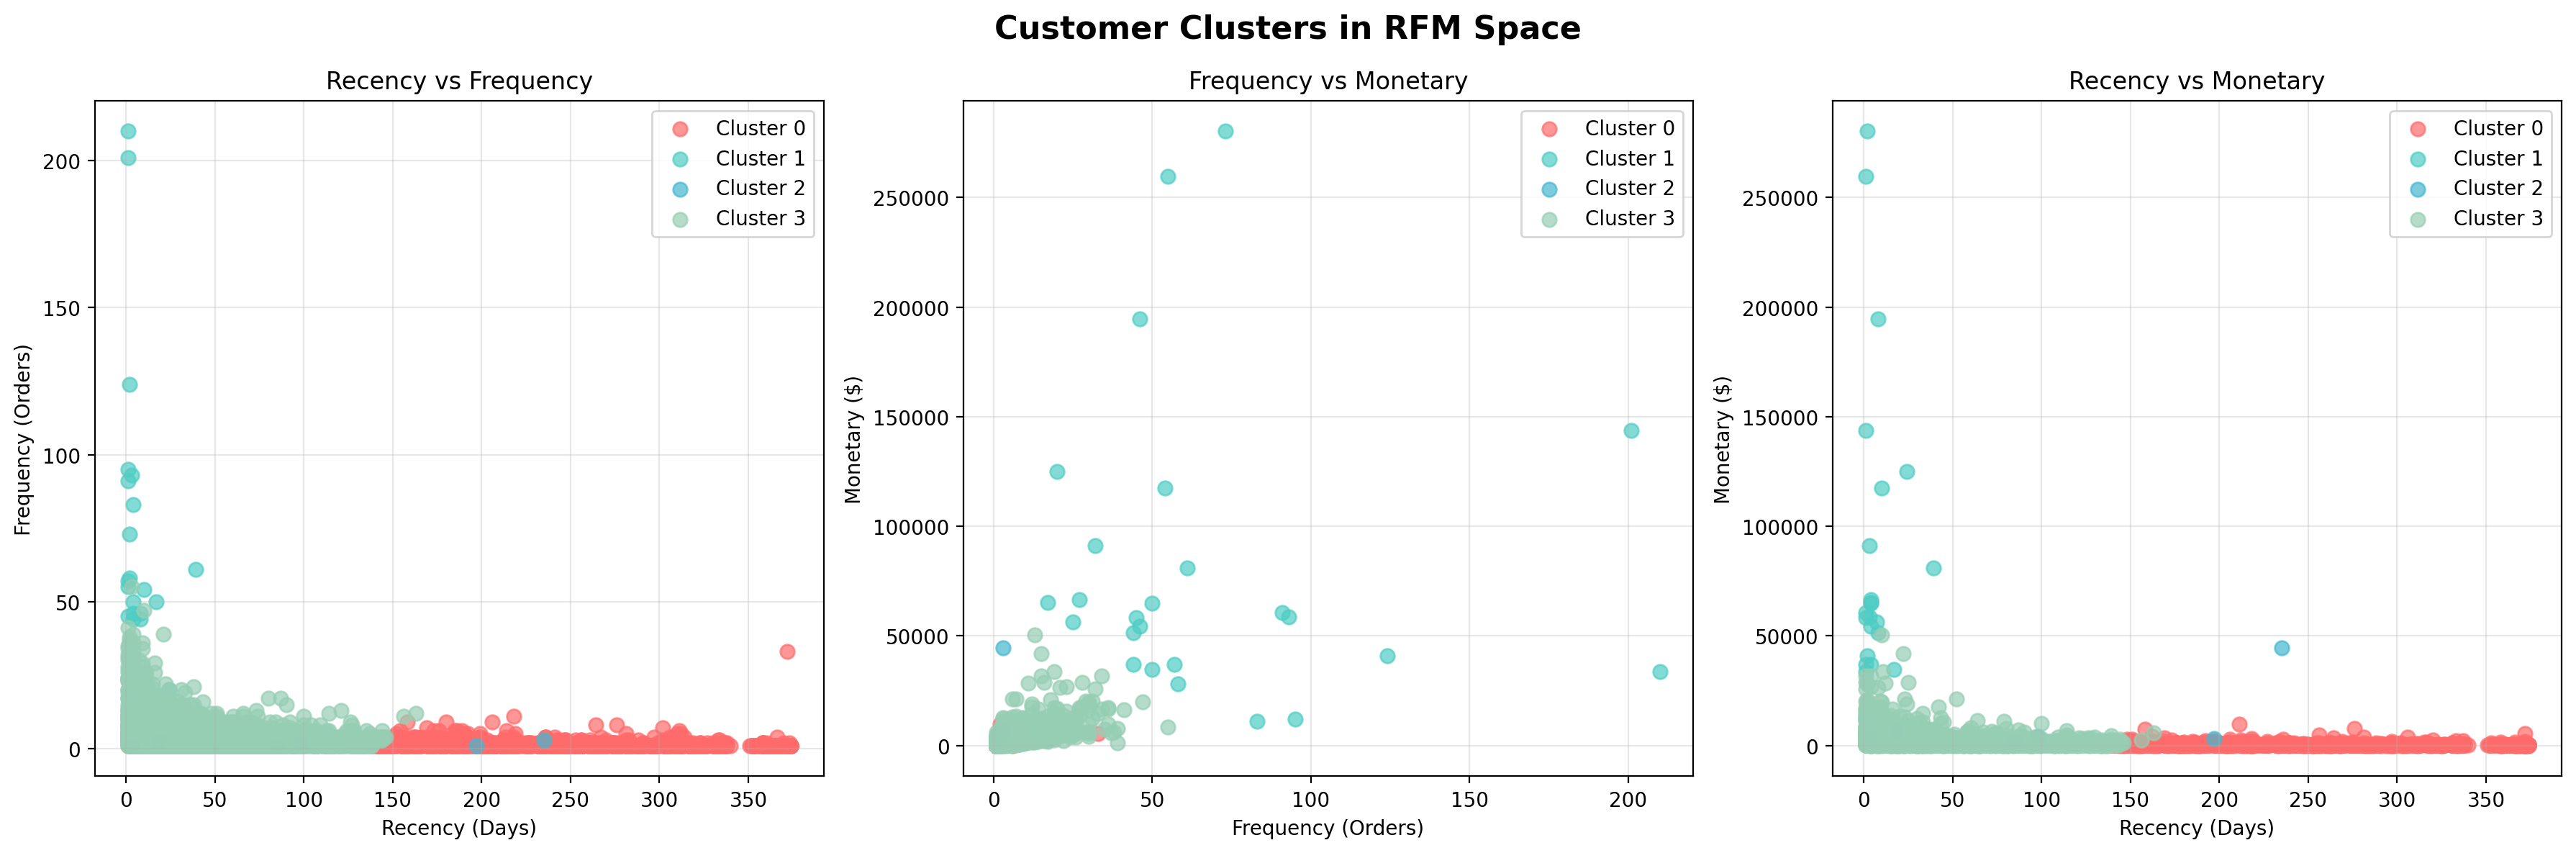

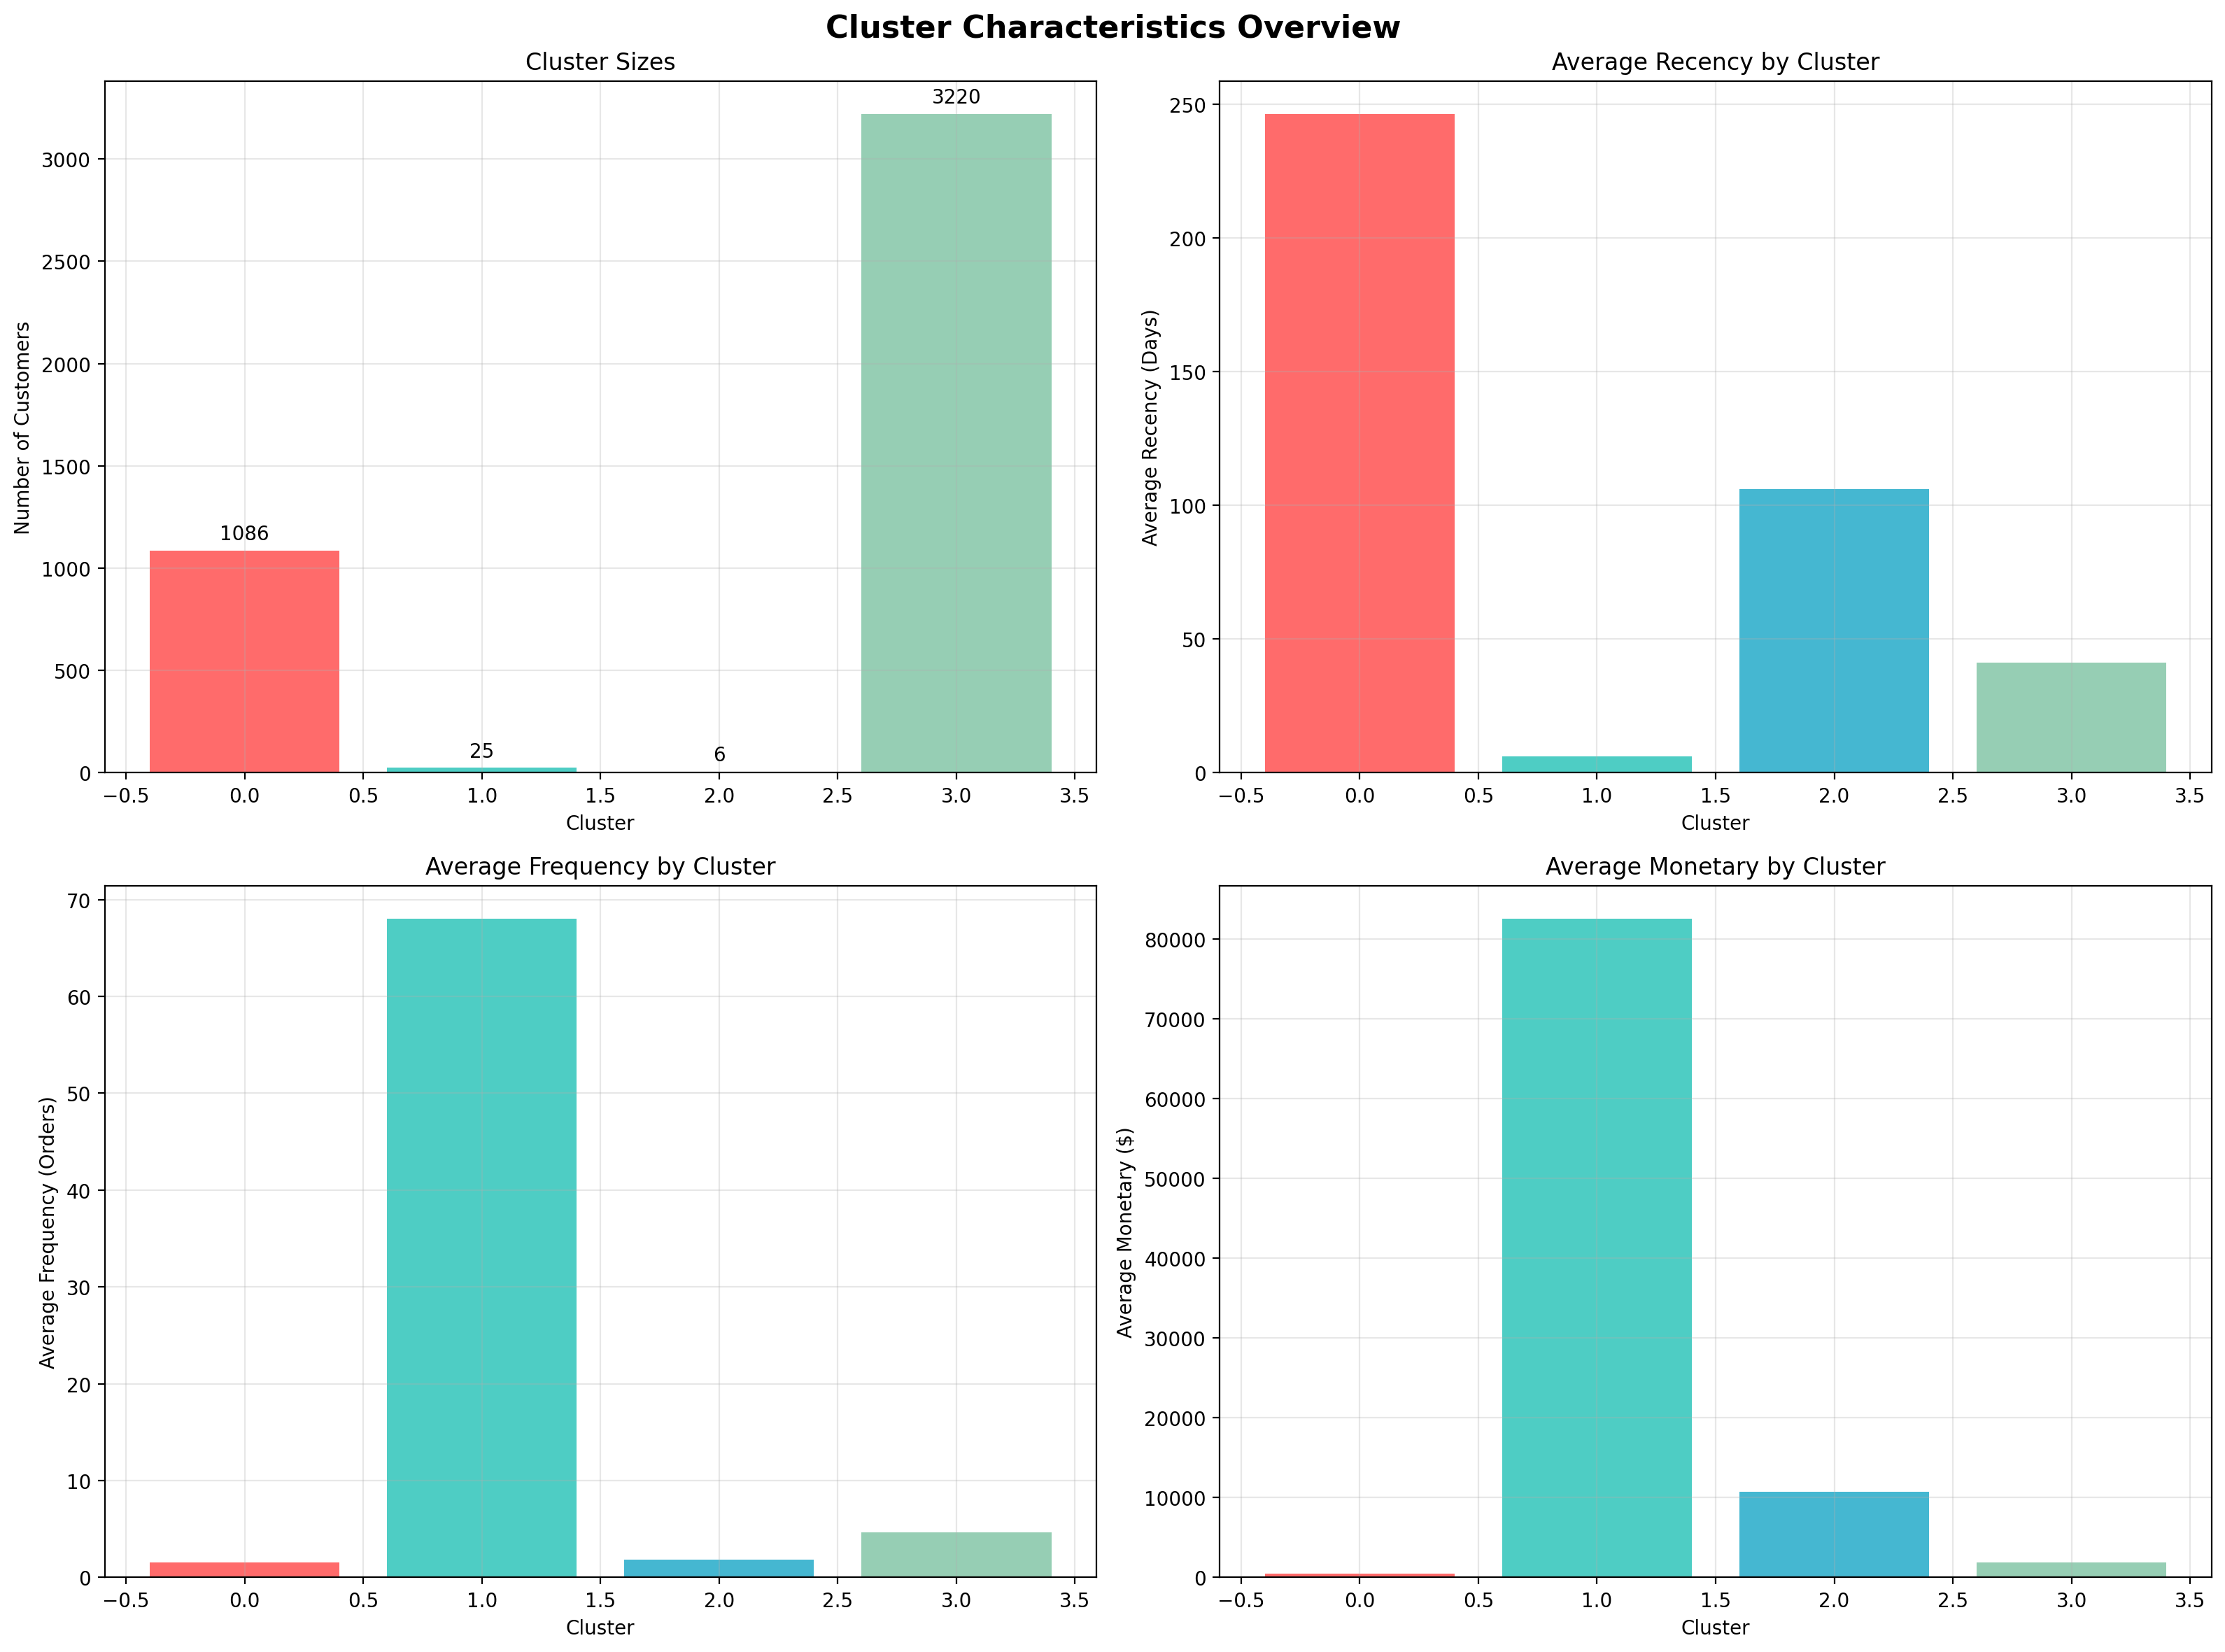


📊 Detailed Cluster Statistics:
Comprehensive cluster statistics:


Recency               Frequency                Monetary            \
           mean median    std      mean median    std      mean    median   
Cluster                                                                     
0        246.46  241.0  67.22      1.58    1.0   1.44    487.41    310.15   
1          6.24    4.0   8.71     68.04   54.0  48.64  82601.63  58825.83   
2        106.00   91.5  93.57      1.83    1.5   0.98  10721.49   3958.36   
3         41.26   30.0  35.26      4.66    3.0   5.10   1853.45    917.20   

                  AvgOrderValue                   ProductVariety              \
              std          mean   median      std           mean median  std   
Cluster                                                                        
0          680.38         35.16    17.65    80.38            1.0    1.0  0.0   
1        70198.72        178.78    94.56   218.82            1.0    1.0  0.0   
2        16638.65       2859.76  2564.55  1126.80            1.0    1.0  0.0   
3         3057.41         28.11    17.70    54.39            1.0    1.0  0.0   

        CustomerID  
             count  
Cluster             
0             1086  
1               25  
2                6  
3             3220


✅ Cluster Validation Metrics:
Silhouette scores by cluster:
Cluster 0: Mean = 0.5395, Min = -0.0029, Max = 0.6983
Cluster 1: Mean = 0.0581, Min = -0.2625, Max = 0.3034
Cluster 2: Mean = 0.4570, Min = 0.1390, Max = 0.6161
Cluster 3: Mean = 0.5752, Min = -0.0507, Max = 0.7120

🏆 Overall Model Performance:
   • Overall Silhouette Score: 0.5631
   • Total Within-Cluster Sum of Squares: 6845.66
   • Number of iterations: 11
   • Clustering Quality: Good

✅ K-means clustering applied successfully!
📝 **Next Step**: Analyze and profile customer segments for business insights


In [40]:
# Apply K-means clustering
print("="*60)
print("🎯 APPLYING K-MEANS CLUSTERING")
print("="*60)

def apply_kmeans_clustering(X_scaled, enhanced_rfm, n_clusters=4):
    """
    Apply K-means clustering and add results to dataset
    """
    print(f"Applying K-means clustering with {n_clusters} clusters...")
    
    # Initialize and fit K-means model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Add cluster labels to the dataset
    enhanced_rfm_clustered = enhanced_rfm.copy()
    enhanced_rfm_clustered['Cluster'] = cluster_labels
    
    # Calculate final performance metrics
    final_silhouette_score = silhouette_score(X_scaled, cluster_labels)
    final_inertia = kmeans.inertia_
    
    print(f"✅ Clustering Results:")
    print(f"   • Number of clusters: {n_clusters}")
    print(f"   • Silhouette Score: {final_silhouette_score:.4f}")
    print(f"   • Inertia (WCSS): {final_inertia:.2f}")
    
    # Display cluster distribution
    print(f"\n📊 Cluster Distribution:")
    cluster_counts = enhanced_rfm_clustered['Cluster'].value_counts().sort_index()
    for cluster, count in cluster_counts.items():
        percentage = (count / len(enhanced_rfm_clustered)) * 100
        print(f"   • Cluster {cluster}: {count:,} customers ({percentage:.1f}%)")
    
    return kmeans, enhanced_rfm_clustered, final_silhouette_score

# Apply clustering with optimal number of clusters (use 4 as default, adjust based on your analysis)
optimal_clusters = 4  # Replace with your final_recommendation from previous step
kmeans_model, enhanced_rfm_clustered, silhouette_score_final = apply_kmeans_clustering(
    X_scaled, enhanced_rfm, optimal_clusters
)

# Display cluster centers in original scale
print(f"\n🎯 Cluster Centers (Original Scale):")
cluster_centers_scaled = kmeans_model.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)

cluster_centers_df = pd.DataFrame(
    cluster_centers_original,
    columns=feature_names,
    index=[f'Cluster {i}' for i in range(optimal_clusters)]
)

print("Cluster characteristics:")
display(cluster_centers_df.round(2))

# Create comprehensive cluster visualizations
print(f"\n🎨 Creating Cluster Visualizations:")

# 1. Visualize clusters in PCA space (2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=enhanced_rfm_clustered['Cluster'], 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Second Principal Component (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Customer Clusters in PCA Space', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add cluster centers
centers_pca = pca.transform(cluster_centers_scaled)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, 
           edgecolors='black', linewidth=2, label='Cluster Centers')
plt.legend()
plt.tight_layout()
plt.show()

# 2. Cluster distribution in RFM space
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Customer Clusters in RFM Space', fontsize=16, fontweight='bold')

# Recency vs Frequency
for i, cluster in enumerate(range(optimal_clusters)):
    cluster_data = enhanced_rfm_clustered[enhanced_rfm_clustered['Cluster'] == cluster]
    axes[0].scatter(cluster_data['Recency'], cluster_data['Frequency'], 
                   alpha=0.7, s=50, c=colors[i], label=f'Cluster {cluster}')

axes[0].set_xlabel('Recency (Days)')
axes[0].set_ylabel('Frequency (Orders)')
axes[0].set_title('Recency vs Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Frequency vs Monetary
for i, cluster in enumerate(range(optimal_clusters)):
    cluster_data = enhanced_rfm_clustered[enhanced_rfm_clustered['Cluster'] == cluster]
    axes[1].scatter(cluster_data['Frequency'], cluster_data['Monetary'], 
                   alpha=0.7, s=50, c=colors[i], label=f'Cluster {cluster}')

axes[1].set_xlabel('Frequency (Orders)')
axes[1].set_ylabel('Monetary ($)')
axes[1].set_title('Frequency vs Monetary')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Recency vs Monetary
for i, cluster in enumerate(range(optimal_clusters)):
    cluster_data = enhanced_rfm_clustered[enhanced_rfm_clustered['Cluster'] == cluster]
    axes[2].scatter(cluster_data['Recency'], cluster_data['Monetary'], 
                   alpha=0.7, s=50, c=colors[i], label=f'Cluster {cluster}')

axes[2].set_xlabel('Recency (Days)')
axes[2].set_ylabel('Monetary ($)')
axes[2].set_title('Recency vs Monetary')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Cluster size and characteristics overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cluster Characteristics Overview', fontsize=16, fontweight='bold')

# Cluster sizes
cluster_sizes = enhanced_rfm_clustered['Cluster'].value_counts().sort_index()
axes[0,0].bar(cluster_sizes.index, cluster_sizes.values, color=colors[:len(cluster_sizes)])
axes[0,0].set_title('Cluster Sizes')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for i, v in enumerate(cluster_sizes.values):
    axes[0,0].text(i, v + max(cluster_sizes.values)*0.01, str(v), ha='center', va='bottom')

# Average Recency by cluster
avg_recency = enhanced_rfm_clustered.groupby('Cluster')['Recency'].mean()
axes[0,1].bar(avg_recency.index, avg_recency.values, color=colors[:len(avg_recency)])
axes[0,1].set_title('Average Recency by Cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Average Recency (Days)')
axes[0,1].grid(True, alpha=0.3)

# Average Frequency by cluster
avg_frequency = enhanced_rfm_clustered.groupby('Cluster')['Frequency'].mean()
axes[1,0].bar(avg_frequency.index, avg_frequency.values, color=colors[:len(avg_frequency)])
axes[1,0].set_title('Average Frequency by Cluster')
axes[1,0].set_xlabel('Cluster')
axes[1,0].set_ylabel('Average Frequency (Orders)')
axes[1,0].grid(True, alpha=0.3)

# Average Monetary by cluster
avg_monetary = enhanced_rfm_clustered.groupby('Cluster')['Monetary'].mean()
axes[1,1].bar(avg_monetary.index, avg_monetary.values, color=colors[:len(avg_monetary)])
axes[1,1].set_title('Average Monetary by Cluster')
axes[1,1].set_xlabel('Cluster')
axes[1,1].set_ylabel('Average Monetary ($)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Detailed cluster statistics
print(f"\n📊 Detailed Cluster Statistics:")
print("=" * 80)

cluster_stats = enhanced_rfm_clustered.groupby('Cluster').agg({
    'Recency': ['mean', 'median', 'std'],
    'Frequency': ['mean', 'median', 'std'],
    'Monetary': ['mean', 'median', 'std'],
    'AvgOrderValue': ['mean', 'median', 'std'],
    'ProductVariety': ['mean', 'median', 'std'],
    'CustomerID': 'count'
}).round(2)

print("Comprehensive cluster statistics:")
display(cluster_stats)

# 5. Cluster validation metrics
print(f"\n✅ Cluster Validation Metrics:")
print("=" * 50)

# Silhouette analysis for each cluster
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X_scaled, enhanced_rfm_clustered['Cluster'])
enhanced_rfm_clustered['Silhouette_Score'] = silhouette_vals

print("Silhouette scores by cluster:")
for cluster in range(optimal_clusters):
    cluster_silhouette = silhouette_vals[enhanced_rfm_clustered['Cluster'] == cluster]
    print(f"Cluster {cluster}: Mean = {cluster_silhouette.mean():.4f}, "
          f"Min = {cluster_silhouette.min():.4f}, "
          f"Max = {cluster_silhouette.max():.4f}")

# Overall model performance
print(f"\n🏆 Overall Model Performance:")
print(f"   • Overall Silhouette Score: {silhouette_score_final:.4f}")
print(f"   • Total Within-Cluster Sum of Squares: {kmeans_model.inertia_:.2f}")
print(f"   • Number of iterations: {kmeans_model.n_iter_}")

# Quality assessment
if silhouette_score_final > 0.7:
    quality = "Excellent"
elif silhouette_score_final > 0.5:
    quality = "Good"
elif silhouette_score_final > 0.3:
    quality = "Acceptable"
else:
    quality = "Poor"

print(f"   • Clustering Quality: {quality}")

print(f"\n✅ K-means clustering applied successfully!")
print(f"📝 **Next Step**: Analyze and profile customer segments for business insights")


In [41]:
# Analyze customer segments
print("="*60)
print("📊 CUSTOMER SEGMENT ANALYSIS & BUSINESS INSIGHTS")
print("="*60)

def analyze_customer_segments(enhanced_rfm_clustered):
    """
    Comprehensive analysis of each customer segment
    """
    # Calculate detailed cluster statistics
    cluster_analysis = enhanced_rfm_clustered.groupby('Cluster').agg({
        'Recency': ['mean', 'std', 'min', 'max'],
        'Frequency': ['mean', 'std', 'min', 'max'],
        'Monetary': ['mean', 'std', 'min', 'max'],
        'AvgOrderValue': ['mean', 'std'],
        'ProductVariety': ['mean', 'std'],
        'CustomerLifetime': ['mean', 'std'],
        'TotalItems': ['mean', 'std'],
        'CustomerID': 'count'
    }).round(2)
    
    return cluster_analysis

# Generate detailed cluster analysis
cluster_profiles = analyze_customer_segments(enhanced_rfm_clustered)

print("📈 Detailed Cluster Statistics:")
display(cluster_profiles)

# Create business-friendly segment names based on characteristics
def create_segment_names(enhanced_rfm_clustered):
    """
    Assign meaningful business names to clusters based on their characteristics
    """
    segment_names = {}
    
    # Calculate cluster characteristics for naming
    for cluster in enhanced_rfm_clustered['Cluster'].unique():
        cluster_data = enhanced_rfm_clustered[enhanced_rfm_clustered['Cluster'] == cluster]
        
        recency_mean = cluster_data['Recency'].mean()
        frequency_mean = cluster_data['Frequency'].mean()
        monetary_mean = cluster_data['Monetary'].mean()
        
        # Business logic for segment naming based on RFM characteristics
        if recency_mean < 50 and frequency_mean >= 8 and monetary_mean >= 2000:
            segment_names[cluster] = "🌟 VIP Champions"
        elif recency_mean < 100 and frequency_mean >= 4 and monetary_mean >= 500:
            segment_names[cluster] = "💎 Loyal Customers"
        elif recency_mean > 200 or frequency_mean < 2:
            segment_names[cluster] = "⚠️ At-Risk Customers"
        elif frequency_mean < 4 and monetary_mean < 500:
            segment_names[cluster] = "🌱 New Customers"
        elif recency_mean < 100 and monetary_mean >= 1000:
            segment_names[cluster] = "🎯 High-Value Customers"
        else:
            segment_names[cluster] = f"📊 Potential Customers"
    
    return segment_names

# Create meaningful segment names
segment_names = create_segment_names(enhanced_rfm_clustered)
enhanced_rfm_clustered['SegmentName'] = enhanced_rfm_clustered['Cluster'].map(segment_names)

print("\n🏷️ Business Segment Profiles:")
print("=" * 100)

# Create comprehensive segment profiles
for cluster_id, name in segment_names.items():
    cluster_data = enhanced_rfm_clustered[enhanced_rfm_clustered['Cluster'] == cluster_id]
    
    print(f"\n{name} (Cluster {cluster_id})")
    print("-" * 80)
    
    # Basic metrics
    print(f"📊 **Size**: {len(cluster_data):,} customers ({len(cluster_data)/len(enhanced_rfm_clustered)*100:.1f}%)")
    print(f"🕐 **Recency**: {cluster_data['Recency'].mean():.1f} days (last purchase)")
    print(f"🛒 **Frequency**: {cluster_data['Frequency'].mean():.1f} orders per customer")
    print(f"💰 **Monetary**: ${cluster_data['Monetary'].mean():,.2f} total spent")
    print(f"📦 **Avg Order Value**: ${cluster_data['AvgOrderValue'].mean():.2f}")
    print(f"🏪 **Product Variety**: {cluster_data['ProductVariety'].mean():.1f} different products")
    print(f"📅 **Customer Lifetime**: {cluster_data['CustomerLifetime'].mean():.0f} days")
    
    # Revenue contribution
    revenue_contribution = cluster_data['Monetary'].sum()
    revenue_percentage = (revenue_contribution / enhanced_rfm_clustered['Monetary'].sum()) * 100
    print(f"📈 **Revenue Contribution**: ${revenue_contribution:,.2f} ({revenue_percentage:.1f}%)")
    
    # Customer value metrics
    avg_customer_value = cluster_data['Monetary'].mean()
    print(f"💎 **Average Customer Value**: ${avg_customer_value:,.2f}")
    
    # Behavioral insights
    recent_customers = (cluster_data['Recency'] <= 30).sum()
    frequent_customers = (cluster_data['Frequency'] >= 5).sum()
    high_value_customers = (cluster_data['Monetary'] >= 1000).sum()
    
    print(f"\n🔍 **Behavioral Insights**:")
    print(f"   • Recent buyers (≤30 days): {recent_customers:,} ({recent_customers/len(cluster_data)*100:.1f}%)")
    print(f"   • Frequent buyers (≥5 orders): {frequent_customers:,} ({frequent_customers/len(cluster_data)*100:.1f}%)")
    print(f"   • High-value customers (≥$1000): {high_value_customers:,} ({high_value_customers/len(cluster_data)*100:.1f}%)")

# Create segment summary table
print(f"\n📋 Segment Summary Dashboard:")
print("=" * 100)

segment_summary = enhanced_rfm_clustered.groupby('SegmentName').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum'],
    'AvgOrderValue': 'mean',
    'ProductVariety': 'mean'
}).round(2)

segment_summary.columns = ['Customer_Count', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Total_Revenue', 'Avg_Order_Value', 'Avg_Product_Variety']
segment_summary['Revenue_Percentage'] = (segment_summary['Total_Revenue'] / segment_summary['Total_Revenue'].sum() * 100).round(1)
segment_summary['Customer_Percentage'] = (segment_summary['Customer_Count'] / segment_summary['Customer_Count'].sum() * 100).round(1)

display(segment_summary)

# Advanced segment analysis
print(f"\n🔬 Advanced Segment Analysis:")
print("=" * 80)

# 1. Segment Performance Matrix
print("\n📊 **Segment Performance Matrix**:")
performance_matrix = pd.DataFrame({
    'Segment': segment_names.values(),
    'Customer_Value': enhanced_rfm_clustered.groupby('Cluster')['Monetary'].mean().values,
    'Engagement_Level': enhanced_rfm_clustered.groupby('Cluster')['Frequency'].mean().values,
    'Recency_Score': (100 - enhanced_rfm_clustered.groupby('Cluster')['Recency'].mean()).values,  # Inverse for better interpretation
    'Revenue_Impact': enhanced_rfm_clustered.groupby('Cluster')['Monetary'].sum().values
})

# Normalize scores for comparison
performance_matrix['Value_Score'] = (performance_matrix['Customer_Value'] / performance_matrix['Customer_Value'].max() * 100).round(1)
performance_matrix['Engagement_Score'] = (performance_matrix['Engagement_Level'] / performance_matrix['Engagement_Level'].max() * 100).round(1)
performance_matrix['Recency_Score'] = (performance_matrix['Recency_Score'] / performance_matrix['Recency_Score'].max() * 100).round(1)

display(performance_matrix[['Segment', 'Value_Score', 'Engagement_Score', 'Recency_Score']])

# 2. Customer Lifetime Value Analysis
print(f"\n💰 **Customer Lifetime Value Analysis**:")
clv_analysis = enhanced_rfm_clustered.groupby('SegmentName').agg({
    'Monetary': 'mean',
    'Frequency': 'mean',
    'CustomerLifetime': 'mean'
}).round(2)

# Calculate estimated CLV (simplified formula)
clv_analysis['Estimated_CLV'] = (clv_analysis['Monetary'] / clv_analysis['CustomerLifetime']) * 365 * 2  # Projected 2-year CLV
clv_analysis['Estimated_CLV'] = clv_analysis['Estimated_CLV'].fillna(clv_analysis['Monetary'])  # Handle division by zero

display(clv_analysis)

# 3. Segment Migration Analysis
print(f"\n🔄 **Segment Migration Potential**:")
migration_insights = {}

for cluster_id, name in segment_names.items():
    cluster_data = enhanced_rfm_clustered[enhanced_rfm_clustered['Cluster'] == cluster_id]
    
    # Identify customers close to other segments
    if 'At-Risk' in name:
        migration_insights[name] = "High win-back potential with targeted campaigns"
    elif 'New' in name or 'Potential' in name:
        migration_insights[name] = "Can be upgraded to Loyal Customers with engagement"
    elif 'Loyal' in name:
        migration_insights[name] = "Potential for VIP upgrade with value-added services"
    elif 'VIP' in name or 'Champions' in name:
        migration_insights[name] = "Focus on retention and advocacy programs"
    else:
        migration_insights[name] = "Monitor for optimization opportunities"

for segment, insight in migration_insights.items():
    print(f"   • **{segment}**: {insight}")

# 4. Business Priority Matrix
print(f"\n🎯 **Business Priority Matrix**:")
priority_matrix = pd.DataFrame({
    'Segment': segment_names.values(),
    'Revenue_Impact': enhanced_rfm_clustered.groupby('Cluster')['Monetary'].sum().values,
    'Customer_Count': enhanced_rfm_clustered.groupby('Cluster').size().values,
    'Avg_Value': enhanced_rfm_clustered.groupby('Cluster')['Monetary'].mean().values,
    'Engagement': enhanced_rfm_clustered.groupby('Cluster')['Frequency'].mean().values
})

# Calculate priority scores
priority_matrix['Revenue_Score'] = (priority_matrix['Revenue_Impact'] / priority_matrix['Revenue_Impact'].max() * 100).round(1)
priority_matrix['Size_Score'] = (priority_matrix['Customer_Count'] / priority_matrix['Customer_Count'].max() * 100).round(1)
priority_matrix['Value_Score'] = (priority_matrix['Avg_Value'] / priority_matrix['Avg_Value'].max() * 100).round(1)
priority_matrix['Engagement_Score'] = (priority_matrix['Engagement'] / priority_matrix['Engagement'].max() * 100).round(1)

# Overall priority score (weighted average)
priority_matrix['Priority_Score'] = (
    priority_matrix['Revenue_Score'] * 0.4 +
    priority_matrix['Value_Score'] * 0.3 +
    priority_matrix['Engagement_Score'] * 0.2 +
    priority_matrix['Size_Score'] * 0.1
).round(1)

priority_matrix_display = priority_matrix[['Segment', 'Priority_Score', 'Revenue_Score', 'Value_Score', 'Engagement_Score']].sort_values('Priority_Score', ascending=False)
display(priority_matrix_display)

# 5. Segment Characteristics Radar Chart Data
print(f"\n📈 **Segment Characteristics for Radar Chart**:")
radar_data = enhanced_rfm_clustered.groupby('SegmentName').agg({
    'Recency': lambda x: (100 - x.mean()/x.max()*100),  # Inverse scoring
    'Frequency': lambda x: (x.mean()/x.max()*100),
    'Monetary': lambda x: (x.mean()/x.max()*100),
    'AvgOrderValue': lambda x: (x.mean()/x.max()*100),
    'ProductVariety': lambda x: (x.mean()/x.max()*100)
}).round(1)

radar_data.columns = ['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'AOV_Score', 'Variety_Score']
display(radar_data)

print(f"\n🎊 **Key Business Insights Summary**:")
print("=" * 80)

# Generate key insights
total_customers = len(enhanced_rfm_clustered)
total_revenue = enhanced_rfm_clustered['Monetary'].sum()

# Find the most valuable segment
most_valuable_segment = segment_summary.loc[segment_summary['Total_Revenue'].idxmax()]
most_valuable_name = most_valuable_segment.name

# Find the largest segment
largest_segment = segment_summary.loc[segment_summary['Customer_Count'].idxmax()]
largest_name = largest_segment.name

# Find highest AOV segment
highest_aov_segment = segment_summary.loc[segment_summary['Avg_Order_Value'].idxmax()]
highest_aov_name = highest_aov_segment.name

print(f"💎 **Most Valuable Segment**: {most_valuable_name}")
print(f"   • Generates ${most_valuable_segment['Total_Revenue']:,.2f} ({most_valuable_segment['Revenue_Percentage']:.1f}% of total revenue)")
print(f"   • Average customer value: ${most_valuable_segment['Avg_Monetary']:,.2f}")

print(f"\n👥 **Largest Segment**: {largest_name}")
print(f"   • Contains {largest_segment['Customer_Count']:,} customers ({largest_segment['Customer_Percentage']:.1f}% of customer base)")
print(f"   • Represents significant growth opportunity")

print(f"\n🛒 **Highest AOV Segment**: {highest_aov_name}")
print(f"   • Average order value: ${highest_aov_segment['Avg_Order_Value']:.2f}")
print(f"   • Premium customer behavior patterns")

# Revenue concentration
top_2_revenue = segment_summary.nlargest(2, 'Total_Revenue')['Revenue_Percentage'].sum()
print(f"\n📊 **Revenue Concentration**: Top 2 segments generate {top_2_revenue:.1f}% of total revenue")

# Customer distribution
customer_distribution = segment_summary['Customer_Percentage'].describe()
print(f"\n👥 **Customer Distribution**: Segments range from {customer_distribution['min']:.1f}% to {customer_distribution['max']:.1f}% of customer base")

print(f"\n✅ Customer segment analysis complete!")
print(f"📝 **Next Step**: Generate marketing strategies and recommendations for each segment")


📊 CUSTOMER SEGMENT ANALYSIS & BUSINESS INSIGHTS
📈 Detailed Cluster Statistics:


Recency                  Frequency                  Monetary  \
           mean    std  min  max      mean    std min  max      mean   
Cluster                                                                
0        246.46  67.22  130  374      1.58   1.44   1   33    487.41   
1          6.24   8.71    1   39     68.04  48.64  17  210  82601.63   
2        106.00  93.57    3  235      1.83   0.98   1    3  10721.49   
3         41.26  35.26    1  163      4.66   5.10   1   55   1853.45   

                                       AvgOrderValue          ProductVariety  \
              std       min        max          mean      std           mean   
Cluster                                                                        
0          680.38      2.90    9864.26         35.16    80.38            1.0   
1        70198.72  11189.91  280206.02        178.78   218.82            1.0   
2        16638.65   2033.10   44534.30       2859.76  1126.80            1.0   
3         3057.41      6.20   50491.81         28.11    54.39            1.0   

             CustomerLifetime         TotalItems           CustomerID  
         std             mean     std       mean       std      count  
Cluster                                                                
0        0.0            28.12   52.83     267.31    413.68       1086  
1        0.0           351.28   54.71   46069.12  38244.95         25  
2        0.0           101.50  131.80    4942.67   6606.35          6  
3        0.0           163.28  132.31    1099.65   1917.50       3220


🏷️ Business Segment Profiles:

💎 Loyal Customers (Cluster 3)
--------------------------------------------------------------------------------
📊 **Size**: 3,220 customers (74.2%)
🕐 **Recency**: 41.3 days (last purchase)
🛒 **Frequency**: 4.7 orders per customer
💰 **Monetary**: $1,853.45 total spent
📦 **Avg Order Value**: $28.11
🏪 **Product Variety**: 1.0 different products
📅 **Customer Lifetime**: 163 days
📈 **Revenue Contribution**: $5,968,093.10 (69.2%)
💎 **Average Customer Value**: $1,853.45

🔍 **Behavioral Insights**:
   • Recent buyers (≤30 days): 1,621 (50.3%)
   • Frequent buyers (≥5 orders): 1,059 (32.9%)
   • High-value customers (≥$1000): 1,520 (47.2%)

⚠️ At-Risk Customers (Cluster 0)
--------------------------------------------------------------------------------
📊 **Size**: 1,086 customers (25.0%)
🕐 **Recency**: 246.5 days (last purchase)
🛒 **Frequency**: 1.6 orders per customer
💰 **Monetary**: $487.41 total spent
📦 **Avg Order Value**: $35.16
🏪 **Product Variety**: 1.0 dif

Customer_Count  Avg_Recency  Avg_Frequency  \
SegmentName                                                        
⚠️ At-Risk Customers            1092       245.69           1.59   
🌟 VIP Champions                   25         6.24          68.04   
💎 Loyal Customers               3220        41.26           4.66   

                      Avg_Monetary  Total_Revenue  Avg_Order_Value  \
SegmentName                                                          
⚠️ At-Risk Customers        543.64      593650.96            50.68   
🌟 VIP Champions           82601.63     2065040.64           178.78   
💎 Loyal Customers          1853.45     5968093.10            28.11   

                      Avg_Product_Variety  Revenue_Percentage  \
SegmentName                                                     
⚠️ At-Risk Customers                  1.0                 6.9   
🌟 VIP Champions                       1.0                23.9   
💎 Loyal Customers                     1.0                69.2   

                      Customer_Percentage  
SegmentName                                
⚠️ At-Risk Customers                 25.2  
🌟 VIP Champions                       0.6  
💎 Loyal Customers                    74.2


🔬 Advanced Segment Analysis:

📊 **Segment Performance Matrix**:


Segment  Value_Score  Engagement_Score  Recency_Score
0     💎 Loyal Customers          0.6               2.3         -156.2
1  ⚠️ At-Risk Customers        100.0             100.0          100.0
2       🌟 VIP Champions         13.0               2.7           -6.4
3  ⚠️ At-Risk Customers          2.2               6.8           62.6


💰 **Customer Lifetime Value Analysis**:


Monetary  Frequency  CustomerLifetime  Estimated_CLV
SegmentName                                                               
⚠️ At-Risk Customers    543.64       1.59             28.52   13915.049088
🌟 VIP Champions       82601.63      68.04            351.28  171655.630551
💎 Loyal Customers      1853.45       4.66            163.28    8286.492528


🔄 **Segment Migration Potential**:
   • **💎 Loyal Customers**: Potential for VIP upgrade with value-added services
   • **⚠️ At-Risk Customers**: High win-back potential with targeted campaigns
   • **🌟 VIP Champions**: Focus on retention and advocacy programs

🎯 **Business Priority Matrix**:


Segment  Priority_Score  Revenue_Score  Value_Score  \
1  ⚠️ At-Risk Customers            63.9           34.6        100.0   
3  ⚠️ At-Risk Customers            52.0          100.0          2.2   
0     💎 Loyal Customers             7.6            8.9          0.6   
2       🌟 VIP Champions             4.9            1.1         13.0   

   Engagement_Score  
1             100.0  
3               6.8  
0               2.3  
2               2.7


📈 **Segment Characteristics for Radar Chart**:


Recency_Score  Frequency_Score  Monetary_Score  \
SegmentName                                                            
⚠️ At-Risk Customers           34.3              4.8             1.2   
🌟 VIP Champions                84.0             32.4            29.5   
💎 Loyal Customers              74.7              8.5             3.7   

                      AOV_Score  Variety_Score  
SegmentName                                     
⚠️ At-Risk Customers        1.1          100.0  
🌟 VIP Champions            21.4          100.0  
💎 Loyal Customers           2.0          100.0


🎊 **Key Business Insights Summary**:
💎 **Most Valuable Segment**: 💎 Loyal Customers
   • Generates $5,968,093.10 (69.2% of total revenue)
   • Average customer value: $1,853.45

👥 **Largest Segment**: 💎 Loyal Customers
   • Contains 3,220.0 customers (74.2% of customer base)
   • Represents significant growth opportunity

🛒 **Highest AOV Segment**: 🌟 VIP Champions
   • Average order value: $178.78
   • Premium customer behavior patterns

📊 **Revenue Concentration**: Top 2 segments generate 93.1% of total revenue

👥 **Customer Distribution**: Segments range from 0.6% to 74.2% of customer base

✅ Customer segment analysis complete!
📝 **Next Step**: Generate marketing strategies and recommendations for each segment


In [43]:
# Generate comprehensive marketing strategies
print("="*60)
print("🎯 MARKETING STRATEGIES & RECOMMENDATIONS")
print("="*60)

def generate_comprehensive_strategies(enhanced_rfm_clustered):
    """
    Generate detailed marketing strategies and ROI projections for each segment
    """
    strategies = {}
    roi_projections = {}
    
    for segment in enhanced_rfm_clustered['SegmentName'].unique():
        segment_data = enhanced_rfm_clustered[enhanced_rfm_clustered['SegmentName'] == segment]
        
        # Calculate segment metrics
        customer_count = len(segment_data)
        avg_recency = segment_data['Recency'].mean()
        avg_frequency = segment_data['Frequency'].mean()
        avg_monetary = segment_data['Monetary'].mean()
        avg_order_value = segment_data['AvgOrderValue'].mean()
        total_revenue = segment_data['Monetary'].sum()
        
        # Define comprehensive strategies based on segment characteristics
        if "VIP" in segment or "Champions" in segment:
            strategies[segment] = {
                'Primary_Goal': 'Retention and Lifetime Value Maximization',
                'Campaign_Type': 'VIP Exclusive Program',
                'Channels': ['Personal Account Manager', 'Email', 'Direct Mail', 'Phone', 'In-person Events'],
                'Offer_Strategy': 'Early access to new products, exclusive events, personalized recommendations, premium support, VIP-only pricing',
                'Communication_Frequency': 'Weekly personalized touchpoints',
                'Budget_Allocation': '35%',
                'Key_Tactics': [
                    'Dedicated account management with personal shopping assistance',
                    'Exclusive product launches and preview events',
                    'VIP customer appreciation events and experiences',
                    'Premium customer service with priority support',
                    'Personalized product recommendations based on purchase history',
                    'Loyalty program with highest tier benefits',
                    'Referral incentives for bringing new high-value customers'
                ],
                'Success_Metrics': [
                    'Customer retention rate (target: 95%)',
                    'Average order value increase (target: 15%)',
                    'Net Promoter Score (target: 70+)',
                    'Revenue per customer growth (target: 20%)'
                ]
            }
            # ROI calculations for VIP customers
            campaign_cost_per_customer = 150
            expected_retention = 0.95
            expected_value_increase = 1.25
            
        elif "Loyal" in segment:
            strategies[segment] = {
                'Primary_Goal': 'Increase Purchase Frequency and Cross-selling',
                'Campaign_Type': 'Loyalty Rewards Program',
                'Channels': ['Email', 'SMS', 'Mobile App', 'Social Media', 'Push Notifications'],
                'Offer_Strategy': 'Points-based rewards, referral bonuses, bundle discounts, seasonal promotions, early access perks',
                'Communication_Frequency': 'Bi-weekly targeted campaigns',
                'Budget_Allocation': '30%',
                'Key_Tactics': [
                    'Comprehensive loyalty points program with tier progression',
                    'Referral incentives with rewards for both parties',
                    'Cross-selling campaigns based on purchase patterns',
                    'Bundle discounts for complementary products',
                    'Birthday and anniversary special offers',
                    'Seasonal campaigns aligned with purchase history',
                    'Exclusive member-only sales and promotions'
                ],
                'Success_Metrics': [
                    'Purchase frequency increase (target: 25%)',
                    'Cross-sell conversion rate (target: 15%)',
                    'Customer retention rate (target: 85%)',
                    'Loyalty program engagement (target: 70%)'
                ]
            }
            campaign_cost_per_customer = 40
            expected_retention = 0.85
            expected_value_increase = 1.20
            
        elif "At-Risk" in segment:
            strategies[segment] = {
                'Primary_Goal': 'Re-engagement and Win-back',
                'Campaign_Type': 'Win-back Campaign',
                'Channels': ['Email', 'Social Media Retargeting', 'Direct Mail', 'SMS', 'Phone Calls'],
                'Offer_Strategy': 'Significant discounts, free shipping, limited-time offers, exclusive comeback deals, personalized recommendations',
                'Communication_Frequency': 'Intensive 30-day re-engagement sequence followed by monthly touch-points',
                'Budget_Allocation': '20%',
                'Key_Tactics': [
                    'Multi-channel win-back campaign with escalating offers',
                    'Personalized "We miss you" messages with special discounts',
                    'Free shipping and no-minimum-order promotions',
                    'Limited-time exclusive offers creating urgency',
                    'Retargeting ads across social media platforms',
                    'Customer feedback surveys to understand churn reasons',
                    'Reactivation incentives based on previous purchase behavior'
                ],
                'Success_Metrics': [
                    'Reactivation rate (target: 30%)',
                    'Time to first purchase after campaign (target: 14 days)',
                    'Revenue recovery rate (target: 40%)',
                    'Customer satisfaction improvement (target: 50%)'
                ]
            }
            campaign_cost_per_customer = 60
            expected_retention = 0.35
            expected_value_increase = 1.15
            
        elif "New" in segment or "Potential" in segment:
            strategies[segment] = {
                'Primary_Goal': 'Activation and Frequency Increase',
                'Campaign_Type': 'Customer Development Program',
                'Channels': ['Email', 'Social Media', 'Content Marketing', 'Webinars', 'Tutorial Videos'],
                'Offer_Strategy': 'Educational content, first-purchase incentives, product recommendations, tutorials, gradual engagement building',
                'Communication_Frequency': 'Monthly nurture campaigns with weekly educational content',
                'Budget_Allocation': '15%',
                'Key_Tactics': [
                    'Welcome series with product education and tips',
                    'First-purchase discounts and incentives',
                    'Product recommendation engine based on browsing behavior',
                    'Educational content series (how-to guides, tutorials)',
                    'Webinar invitations for product demonstrations',
                    'Social proof campaigns (reviews, testimonials)',
                    'Gradual engagement building with valuable content'
                ],
                'Success_Metrics': [
                    'First purchase conversion rate (target: 60%)',
                    'Time to second purchase (target: 30 days)',
                    'Email engagement rate (target: 25%)',
                    'Content consumption rate (target: 40%)'
                ]
            }
            campaign_cost_per_customer = 25
            expected_retention = 0.70
            expected_value_increase = 1.30
            
        else:  # High-Value or other segments
            strategies[segment] = {
                'Primary_Goal': 'Value Optimization and Retention',
                'Campaign_Type': 'Premium Customer Experience',
                'Channels': ['Email', 'Direct Mail', 'Phone', 'Social Media'],
                'Offer_Strategy': 'Premium products, exclusive access, value-added services, personalized experiences',
                'Communication_Frequency': 'Monthly targeted campaigns',
                'Budget_Allocation': 'Remaining budget allocation',
                'Key_Tactics': [
                    'Premium product recommendations',
                    'Exclusive access to limited editions',
                    'Value-added services and consultations',
                    'Personalized shopping experiences',
                    'Priority customer support',
                    'Seasonal premium campaigns'
                ],
                'Success_Metrics': [
                    'Customer retention rate (target: 80%)',
                    'Average order value increase (target: 10%)',
                    'Premium product adoption (target: 30%)'
                ]
            }
            campaign_cost_per_customer = 50
            expected_retention = 0.80
            expected_value_increase = 1.15
        
        # Calculate comprehensive ROI projections
        total_campaign_cost = customer_count * campaign_cost_per_customer
        baseline_retention = 0.50  # Assume 50% baseline retention without intervention
        baseline_revenue = customer_count * avg_monetary * baseline_retention
        expected_revenue = customer_count * avg_monetary * expected_value_increase * expected_retention
        additional_revenue = expected_revenue - baseline_revenue
        roi_percentage = (additional_revenue - total_campaign_cost) / total_campaign_cost * 100 if total_campaign_cost > 0 else 0
        
        roi_projections[segment] = {
            'Customer_Count': customer_count,
            'Current_Revenue': total_revenue,
            'Campaign_Cost': total_campaign_cost,
            'Baseline_Revenue': baseline_revenue,
            'Expected_Revenue': expected_revenue,
            'Additional_Revenue': additional_revenue,
            'ROI_Percentage': roi_percentage,
            'Revenue_Lift': ((expected_revenue - baseline_revenue) / baseline_revenue * 100) if baseline_revenue > 0 else 0,
            'Payback_Period': (total_campaign_cost / (additional_revenue / 12)) if additional_revenue > 0 else 0  # Months
        }
    
    return strategies, roi_projections

# Generate comprehensive strategies
marketing_strategies, roi_projections = generate_comprehensive_strategies(enhanced_rfm_clustered)

# Display strategies in a structured format
print("🎯 COMPREHENSIVE MARKETING STRATEGIES")
print("=" * 120)

for segment, strategy in marketing_strategies.items():
    print(f"\n{segment}")
    print("-" * 100)
    
    # Basic strategy info
    print(f"🎯 **Primary Goal**: {strategy['Primary_Goal']}")
    print(f"📢 **Campaign Type**: {strategy['Campaign_Type']}")
    print(f"📱 **Channels**: {', '.join(strategy['Channels'])}")
    print(f"🎁 **Offer Strategy**: {strategy['Offer_Strategy']}")
    print(f"📅 **Communication Frequency**: {strategy['Communication_Frequency']}")
    print(f"💰 **Budget Allocation**: {strategy['Budget_Allocation']}")
    
    # Detailed tactics
    print(f"\n📋 **Key Tactics**:")
    for i, tactic in enumerate(strategy['Key_Tactics'], 1):
        print(f"   {i}. {tactic}")
    
    # Success metrics
    print(f"\n📊 **Success Metrics**:")
    for i, metric in enumerate(strategy['Success_Metrics'], 1):
        print(f"   {i}. {metric}")

# Create ROI projection summary
print(f"\n\n💰 ROI PROJECTIONS & FINANCIAL IMPACT")
print("=" * 120)

roi_df = pd.DataFrame.from_dict(roi_projections, orient='index')
roi_df = roi_df.round(2)

# Enhanced display with formatted numbers
roi_display = roi_df.copy()
roi_display['Campaign_Cost'] = roi_display['Campaign_Cost'].apply(lambda x: f"${x:,.2f}")
roi_display['Additional_Revenue'] = roi_display['Additional_Revenue'].apply(lambda x: f"${x:,.2f}")
roi_display['ROI_Percentage'] = roi_display['ROI_Percentage'].apply(lambda x: f"{x:.1f}%")
roi_display['Revenue_Lift'] = roi_display['Revenue_Lift'].apply(lambda x: f"{x:.1f}%")
roi_display['Payback_Period'] = roi_display['Payback_Period'].apply(lambda x: f"{x:.1f} months")

print("📊 ROI Projections Summary:")
display(roi_display[['Customer_Count', 'Campaign_Cost', 'Additional_Revenue', 'ROI_Percentage', 'Revenue_Lift', 'Payback_Period']])

# Calculate totals and overall impact
total_investment = roi_df['Campaign_Cost'].sum()
total_additional_revenue = roi_df['Additional_Revenue'].sum()
overall_roi = ((total_additional_revenue - total_investment) / total_investment * 100) if total_investment > 0 else 0

print(f"\n🔥 **OVERALL BUSINESS IMPACT**:")
print(f"   💼 Total Marketing Investment: ${total_investment:,.2f}")
print(f"   📈 Total Additional Revenue: ${total_additional_revenue:,.2f}")
print(f"   💎 Overall ROI: {overall_roi:.1f}%")
print(f"   🎯 Revenue Multiplier: {(total_additional_revenue / total_investment):.2f}x")

# Implementation timeline and roadmap
print(f"\n\n📅 IMPLEMENTATION ROADMAP")
print("=" * 120)

implementation_plan = {
    'Phase 1 (Months 1-2): Foundation Setup': [
        'Set up customer segmentation infrastructure',
        'Implement tracking and analytics systems',
        'Create personalized content templates',
        'Train marketing team on segment strategies',
        'Launch VIP and Loyal Customer programs'
    ],
    'Phase 2 (Months 3-4): Campaign Launch': [
        'Launch win-back campaigns for At-Risk customers',
        'Implement automated nurture sequences',
        'Begin A/B testing of messaging and offers',
        'Start loyalty program engagement activities',
        'Deploy retargeting campaigns'
    ],
    'Phase 3 (Months 5-6): Optimization': [
        'Analyze campaign performance and optimize',
        'Refine customer journey based on data',
        'Scale successful tactics across segments',
        'Implement advanced personalization',
        'Expand successful channels'
    ],
    'Phase 4 (Months 7-12): Scale and Evolve': [
        'Roll out full omnichannel experience',
        'Implement predictive analytics',
        'Develop customer advocacy programs',
        'Create segment migration strategies',
        'Continuous improvement and iteration'
    ]
}

for phase, tasks in implementation_plan.items():
    print(f"\n🚀 **{phase}**")
    for i, task in enumerate(tasks, 1):
        print(f"   {i}. {task}")

# Channel-specific recommendations
print(f"\n\n📱 CHANNEL-SPECIFIC RECOMMENDATIONS")
print("=" * 120)

channel_strategies = {
    'Email Marketing': {
        'VIP/Champions': 'Weekly personalized newsletters with exclusive content',
        'Loyal Customers': 'Bi-weekly promotions and loyalty program updates',
        'At-Risk': 'Win-back sequences with progressive offers',
        'New/Potential': 'Educational welcome series and onboarding'
    },
    'Social Media': {
        'VIP/Champions': 'Exclusive social media groups and early access',
        'Loyal Customers': 'User-generated content campaigns and contests',
        'At-Risk': 'Retargeting ads with special comeback offers',
        'New/Potential': 'Educational content and social proof campaigns'
    },
    'Direct Mail': {
        'VIP/Champions': 'Luxury catalogs and exclusive event invitations',
        'Loyal Customers': 'Seasonal promotions and loyalty program materials',
        'At-Risk': 'Personalized win-back offers and catalogs',
        'New/Potential': 'Welcome packages and product samples'
    },
    'SMS/Mobile': {
        'VIP/Champions': 'Exclusive alerts and personal shopper updates',
        'Loyal Customers': 'Flash sales and loyalty point updates',
        'At-Risk': 'Limited-time comeback offers',
        'New/Potential': 'Welcome messages and quick tips'
    }
}

for channel, segments in channel_strategies.items():
    print(f"\n📢 **{channel}**:")
    for segment, strategy in segments.items():
        print(f"   • {segment}: {strategy}")

# Performance tracking and KPIs
print(f"\n\n📊 PERFORMANCE TRACKING & KPIs")
print("=" * 120)

kpi_framework = {
    'Customer Metrics': [
        'Customer Acquisition Cost (CAC) by segment',
        'Customer Lifetime Value (CLV) growth',
        'Customer retention rate by segment',
        'Net Promoter Score (NPS) by segment',
        'Customer satisfaction scores'
    ],
    'Revenue Metrics': [
        'Revenue per customer by segment',
        'Average order value trends',
        'Cross-sell and upsell conversion rates',
        'Revenue attribution by channel',
        'Marketing ROI by segment'
    ],
    'Engagement Metrics': [
        'Email open and click-through rates',
        'Social media engagement rates',
        'Website behavior and conversion funnels',
        'Campaign response rates',
        'Channel effectiveness scores'
    ],
    'Operational Metrics': [
        'Campaign deployment speed',
        'Content personalization accuracy',
        'Customer service response times',
        'Inventory turnover by segment',
        'Marketing automation efficiency'
    ]
}

for category, metrics in kpi_framework.items():
    print(f"\n📈 **{category}**:")
    for metric in metrics:
        print(f"   • {metric}")

# Risk mitigation strategies
print(f"\n\n⚠️ RISK MITIGATION STRATEGIES")
print("=" * 120)

risk_mitigation = {
    'Customer Fatigue': [
        'Implement frequency capping across all channels',
        'Monitor engagement metrics and adjust accordingly',
        'Provide easy opt-out and preference management',
        'Rotate creative content regularly'
    ],
    'Privacy Concerns': [
        'Ensure GDPR/CCPA compliance in all campaigns',
        'Transparent data usage policies',
        'Secure customer data handling protocols',
        'Regular privacy impact assessments'
    ],
    'Campaign Ineffectiveness': [
        'Start with pilot tests before full rollout',
        'Implement robust A/B testing framework',
        'Monitor KPIs weekly and adjust quickly',
        'Have backup strategies for underperforming campaigns'
    ],
    'Budget Overruns': [
        'Set strict budget caps with automated alerts',
        'Monitor cost-per-acquisition daily',
        'Implement performance-based budget allocation',
        'Regular budget review and reallocation meetings'
    ]
}

for risk, mitigations in risk_mitigation.items():
    print(f"\n⚠️ **{risk}**:")
    for mitigation in mitigations:
        print(f"   • {mitigation}")

print(f"\n\n🎉 **NEXT STEPS FOR IMPLEMENTATION**")
print("=" * 120)

next_steps = [
    "1. **Executive Approval**: Present strategy and ROI projections to leadership",
    "2. **Budget Allocation**: Secure marketing budget based on projections",
    "3. **Team Training**: Educate marketing team on segment strategies",
    "4. **Technology Setup**: Implement required marketing automation tools",
    "5. **Content Creation**: Develop segment-specific content and creative assets",
    "6. **Pilot Campaign**: Start with highest-ROI segment for proof of concept",
    "7. **Performance Monitoring**: Set up dashboards and KPI tracking",
    "8. **Continuous Optimization**: Regular review and strategy refinement"
]

for step in next_steps:
    print(f"   {step}")

print(f"\n✅ **Comprehensive marketing strategies and recommendations complete!**")
print(f"🚀 **Your customer segmentation project is now ready for business implementation!**")


🎯 MARKETING STRATEGIES & RECOMMENDATIONS
🎯 COMPREHENSIVE MARKETING STRATEGIES

💎 Loyal Customers
----------------------------------------------------------------------------------------------------
🎯 **Primary Goal**: Increase Purchase Frequency and Cross-selling
📢 **Campaign Type**: Loyalty Rewards Program
📱 **Channels**: Email, SMS, Mobile App, Social Media, Push Notifications
🎁 **Offer Strategy**: Points-based rewards, referral bonuses, bundle discounts, seasonal promotions, early access perks
📅 **Communication Frequency**: Bi-weekly targeted campaigns
💰 **Budget Allocation**: 30%

📋 **Key Tactics**:
   1. Comprehensive loyalty points program with tier progression
   2. Referral incentives with rewards for both parties
   3. Cross-selling campaigns based on purchase patterns
   4. Bundle discounts for complementary products
   5. Birthday and anniversary special offers
   6. Seasonal campaigns aligned with purchase history
   7. Exclusive member-only sales and promotions

📊 **Succes

Customer_Count Campaign_Cost Additional_Revenue  \
💎 Loyal Customers               3220   $128,800.00      $3,103,408.41   
⚠️ At-Risk Customers            1092    $65,520.00        $-57,880.97   
🌟 VIP Champions                   25     $3,750.00      $1,419,715.44   

                     ROI_Percentage Revenue_Lift Payback_Period  
💎 Loyal Customers           2309.5%       104.0%     0.5 months  
⚠️ At-Risk Customers        -188.3%       -19.5%     0.0 months  
🌟 VIP Champions            37759.1%       137.5%     0.0 months


🔥 **OVERALL BUSINESS IMPACT**:
   💼 Total Marketing Investment: $198,070.00
   📈 Total Additional Revenue: $4,465,242.88
   💎 Overall ROI: 2154.4%
   🎯 Revenue Multiplier: 22.54x


📅 IMPLEMENTATION ROADMAP

🚀 **Phase 1 (Months 1-2): Foundation Setup**
   1. Set up customer segmentation infrastructure
   2. Implement tracking and analytics systems
   3. Create personalized content templates
   4. Train marketing team on segment strategies
   5. Launch VIP and Loyal Customer programs

🚀 **Phase 2 (Months 3-4): Campaign Launch**
   1. Launch win-back campaigns for At-Risk customers
   2. Implement automated nurture sequences
   3. Begin A/B testing of messaging and offers
   4. Start loyalty program engagement activities
   5. Deploy retargeting campaigns

🚀 **Phase 3 (Months 5-6): Optimization**
   1. Analyze campaign performance and optimize
   2. Refine customer journey based on data
   3. Scale successful tactics across segments
   4. Implement advanced personalization
   5. Expand s

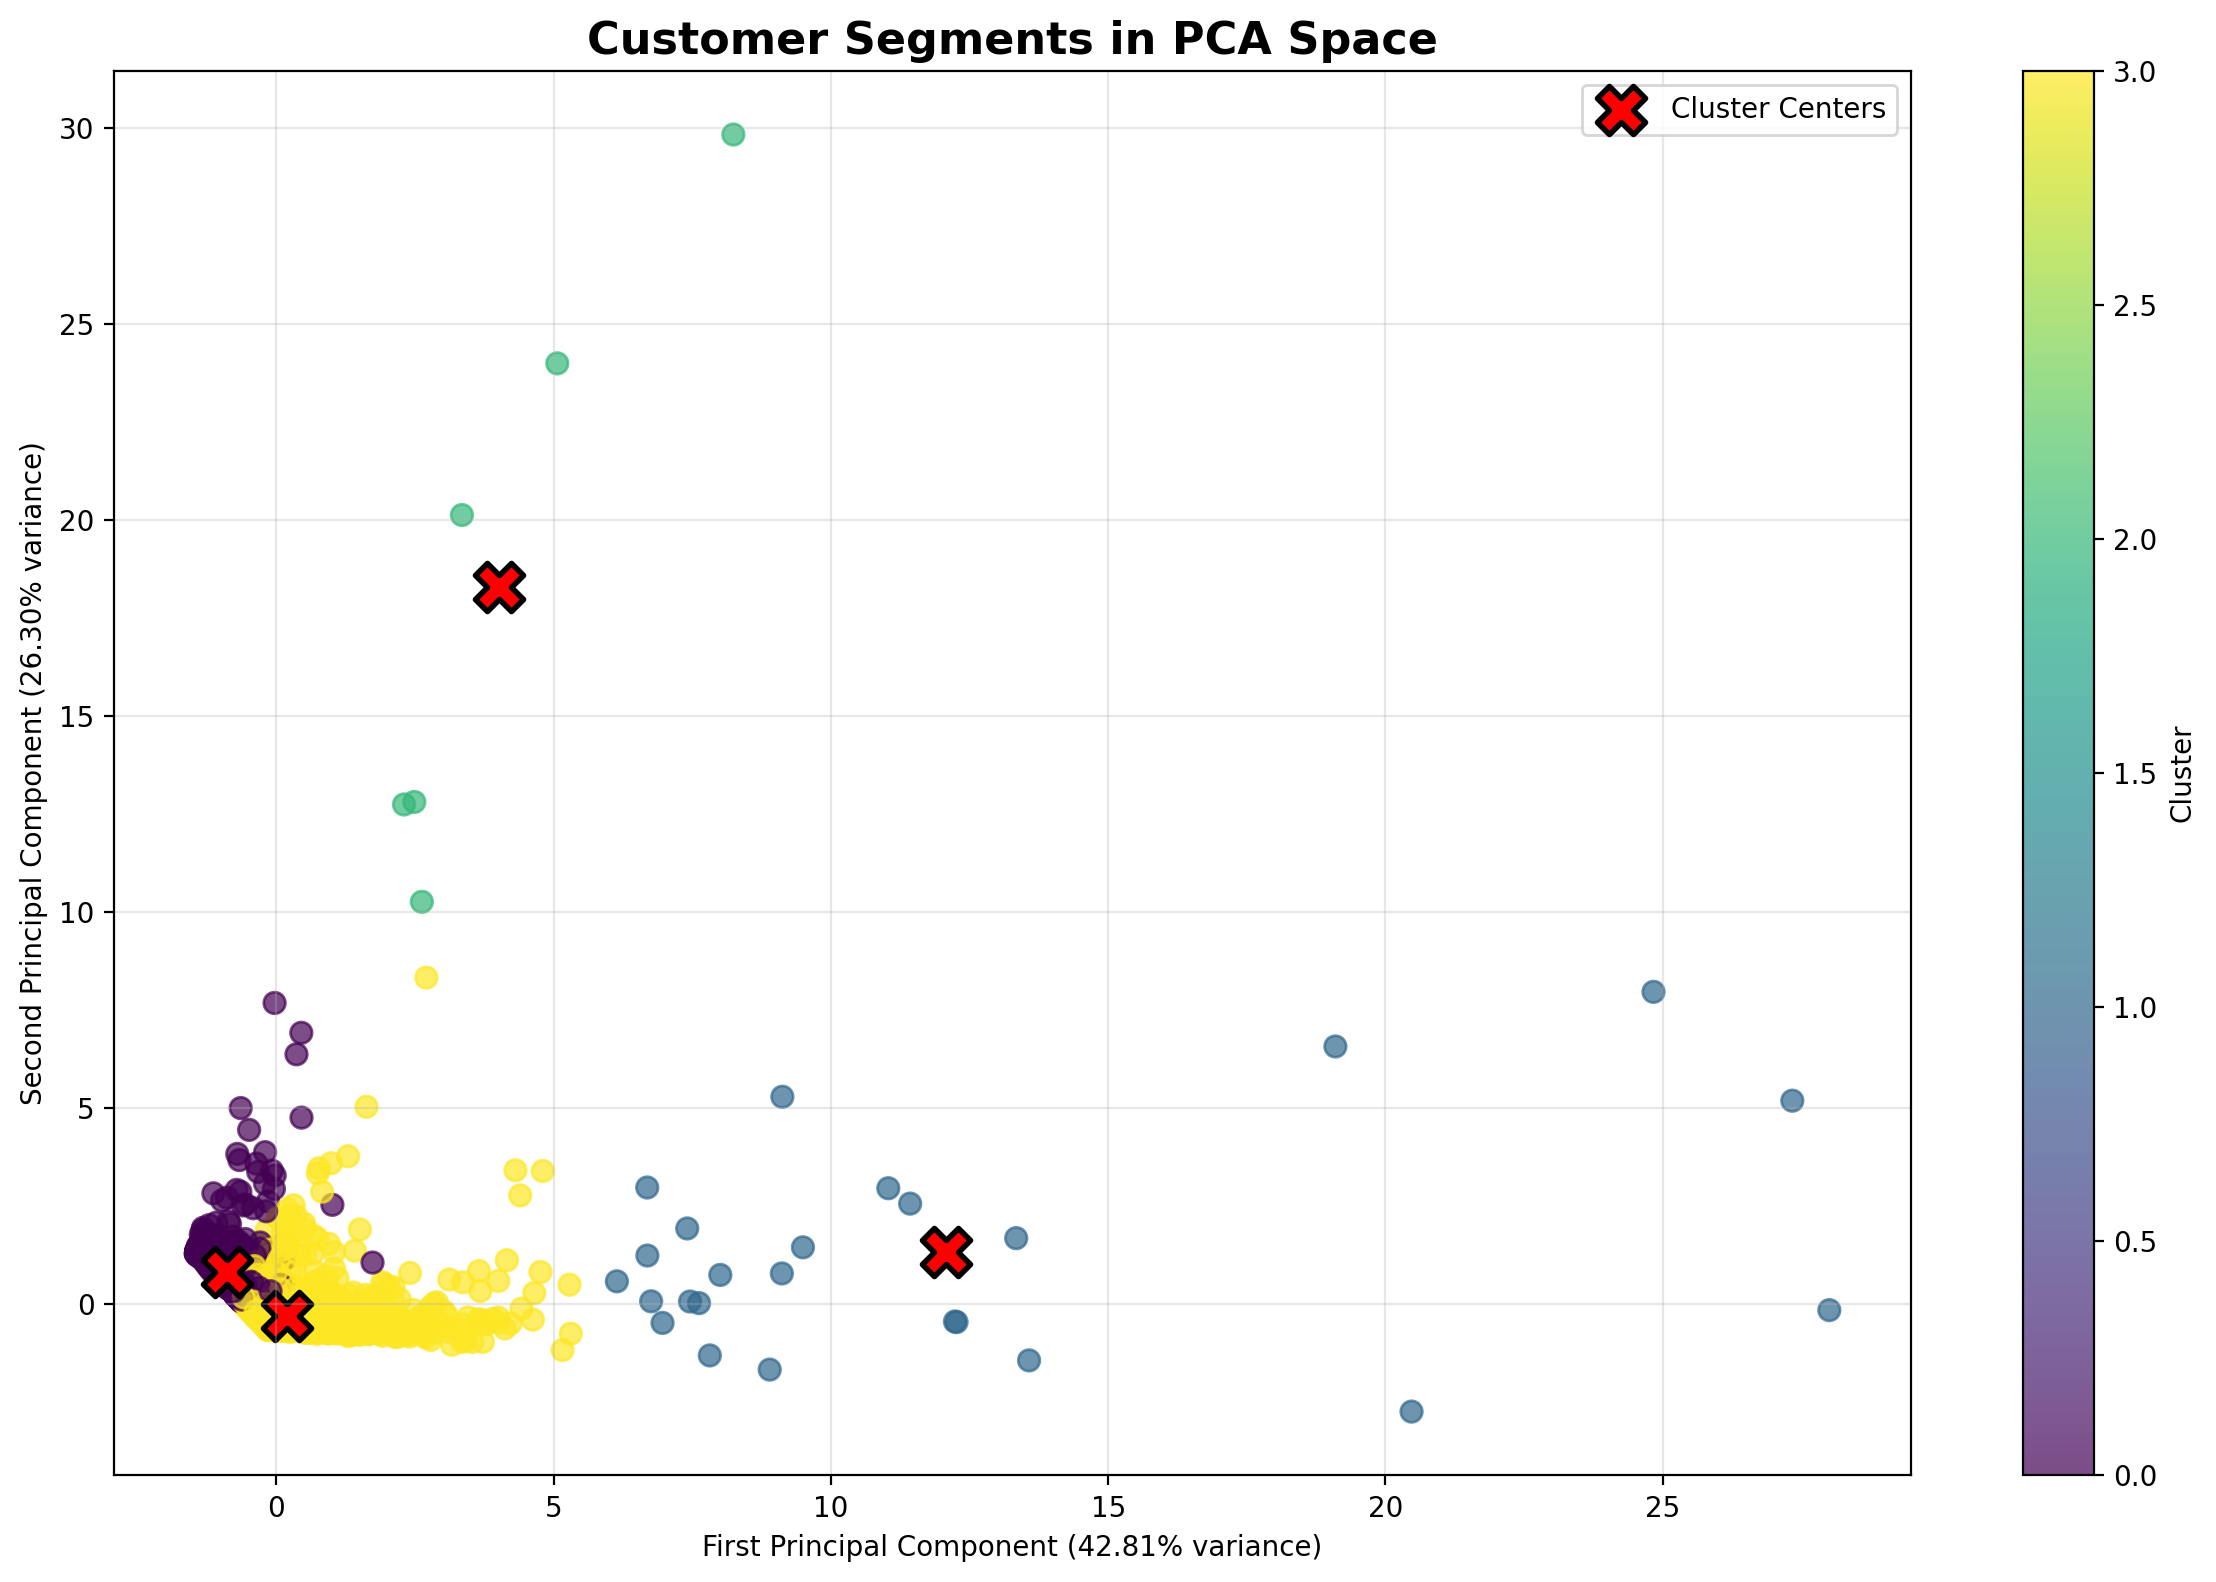

In [46]:
# Create visualizations directory
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# 1. Customer Clusters in PCA Space (Most Important)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=enhanced_rfm_clustered['Cluster'], 
                     cmap='viridis', alpha=0.7, s=60)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('Customer Segments in PCA Space', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add cluster centers
centers_pca = pca.transform(kmeans_model.cluster_centers_)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=300, 
           edgecolors='black', linewidth=2, label='Cluster Centers')
plt.legend()
plt.tight_layout()
plt.savefig('visualizations/customer_clusters_pca.png', dpi=300, bbox_inches='tight')
plt.show()


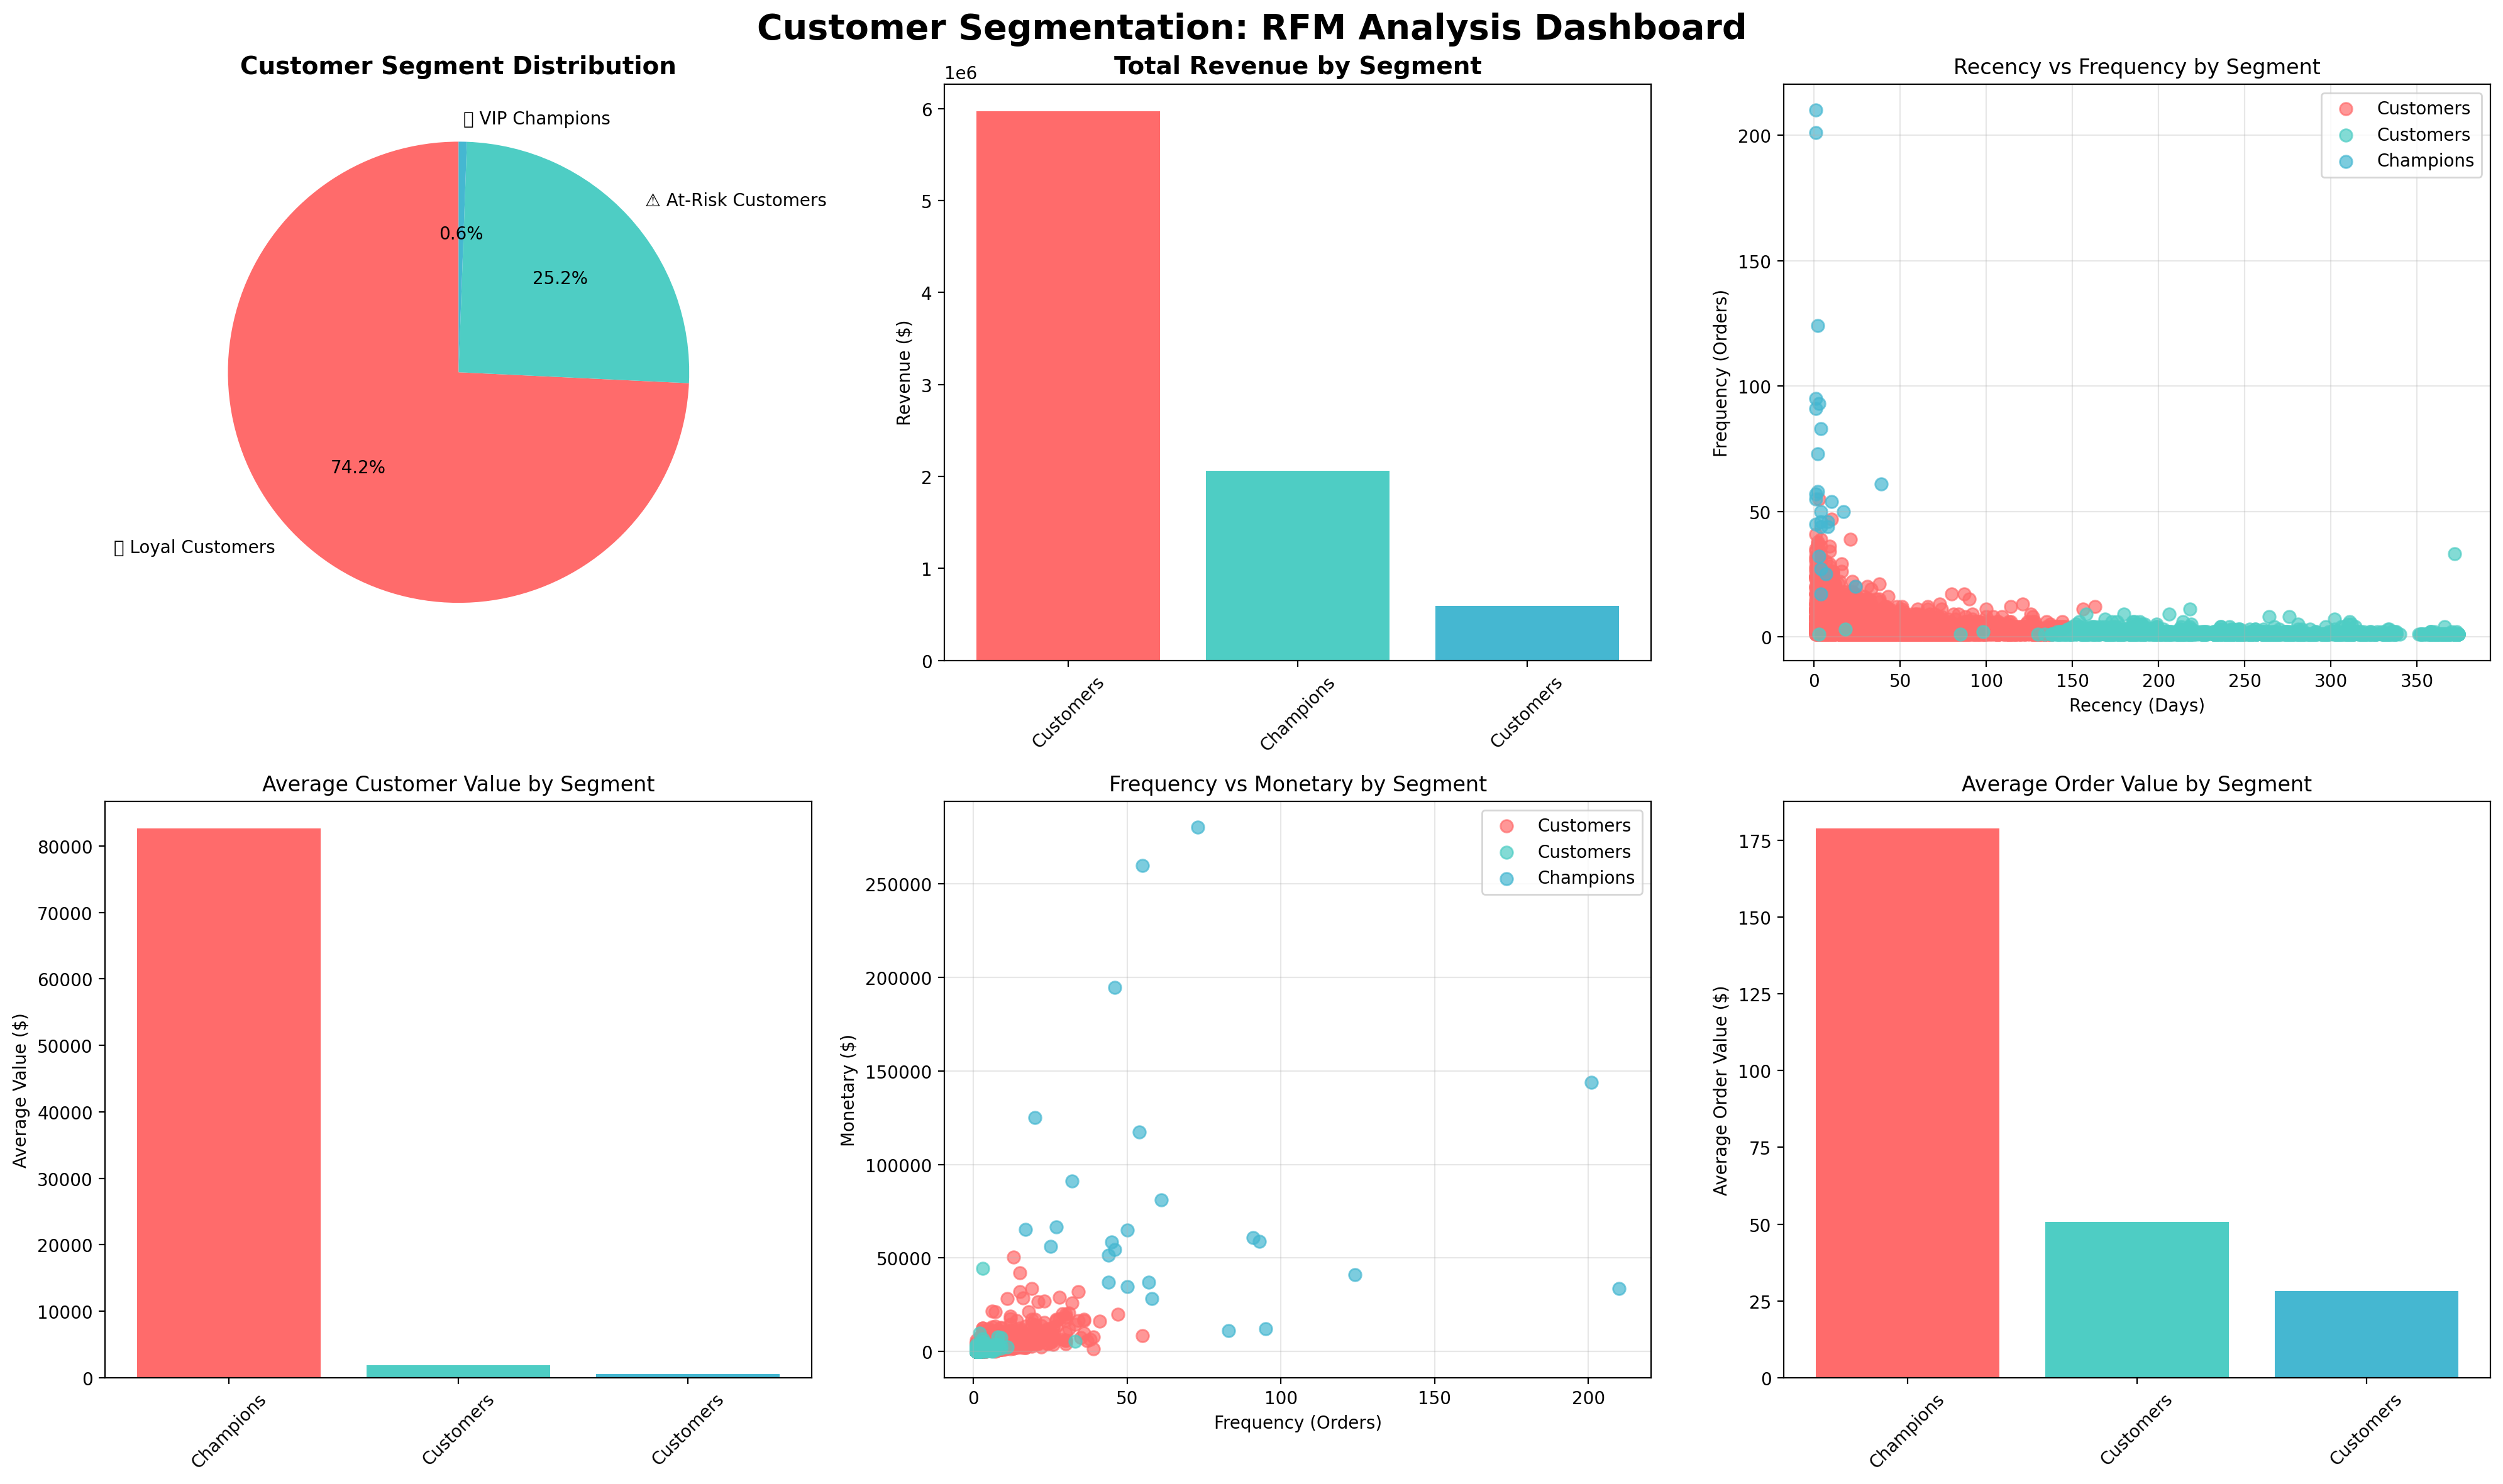

In [47]:
# 2. RFM Analysis Dashboard (Business-Focused)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Customer Segmentation: RFM Analysis Dashboard', fontsize=20, fontweight='bold')

# Segment distribution
segment_counts = enhanced_rfm_clustered['SegmentName'].value_counts()
wedges, texts, autotexts = axes[0,0].pie(segment_counts.values, labels=segment_counts.index, 
                                        autopct='%1.1f%%', colors=colors[:len(segment_counts)], 
                                        startangle=90)
axes[0,0].set_title('Customer Segment Distribution', fontsize=14, fontweight='bold')

# Revenue by segment
revenue_by_segment = enhanced_rfm_clustered.groupby('SegmentName')['Monetary'].sum().sort_values(ascending=False)
bars = axes[0,1].bar(range(len(revenue_by_segment)), revenue_by_segment.values, 
                    color=colors[:len(revenue_by_segment)])
axes[0,1].set_title('Total Revenue by Segment', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Revenue ($)')
axes[0,1].set_xticks(range(len(revenue_by_segment)))
axes[0,1].set_xticklabels([name.split(' ')[-1] for name in revenue_by_segment.index], rotation=45)

# Recency vs Frequency scatter
for i, (segment, color) in enumerate(zip(enhanced_rfm_clustered['SegmentName'].unique(), colors)):
    segment_data = enhanced_rfm_clustered[enhanced_rfm_clustered['SegmentName'] == segment]
    axes[0,2].scatter(segment_data['Recency'], segment_data['Frequency'], 
                     alpha=0.7, s=50, c=color, label=segment.split(' ')[-1])
axes[0,2].set_xlabel('Recency (Days)')
axes[0,2].set_ylabel('Frequency (Orders)')
axes[0,2].set_title('Recency vs Frequency by Segment')
axes[0,2].legend()
axes[0,2].grid(True, alpha=0.3)

# Average customer value by segment
avg_value = enhanced_rfm_clustered.groupby('SegmentName')['Monetary'].mean().sort_values(ascending=False)
axes[1,0].bar(range(len(avg_value)), avg_value.values, color=colors[:len(avg_value)])
axes[1,0].set_title('Average Customer Value by Segment')
axes[1,0].set_ylabel('Average Value ($)')
axes[1,0].set_xticks(range(len(avg_value)))
axes[1,0].set_xticklabels([name.split(' ')[-1] for name in avg_value.index], rotation=45)

# Frequency vs Monetary scatter
for i, (segment, color) in enumerate(zip(enhanced_rfm_clustered['SegmentName'].unique(), colors)):
    segment_data = enhanced_rfm_clustered[enhanced_rfm_clustered['SegmentName'] == segment]
    axes[1,1].scatter(segment_data['Frequency'], segment_data['Monetary'], 
                     alpha=0.7, s=50, c=color, label=segment.split(' ')[-1])
axes[1,1].set_xlabel('Frequency (Orders)')
axes[1,1].set_ylabel('Monetary ($)')
axes[1,1].set_title('Frequency vs Monetary by Segment')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# Average Order Value by segment
aov_by_segment = enhanced_rfm_clustered.groupby('SegmentName')['AvgOrderValue'].mean().sort_values(ascending=False)
axes[1,2].bar(range(len(aov_by_segment)), aov_by_segment.values, color=colors[:len(aov_by_segment)])
axes[1,2].set_title('Average Order Value by Segment')
axes[1,2].set_ylabel('Average Order Value ($)')
axes[1,2].set_xticks(range(len(aov_by_segment)))
axes[1,2].set_xticklabels([name.split(' ')[-1] for name in aov_by_segment.index], rotation=45)

plt.tight_layout()
plt.savefig('visualizations/rfm_analysis_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()


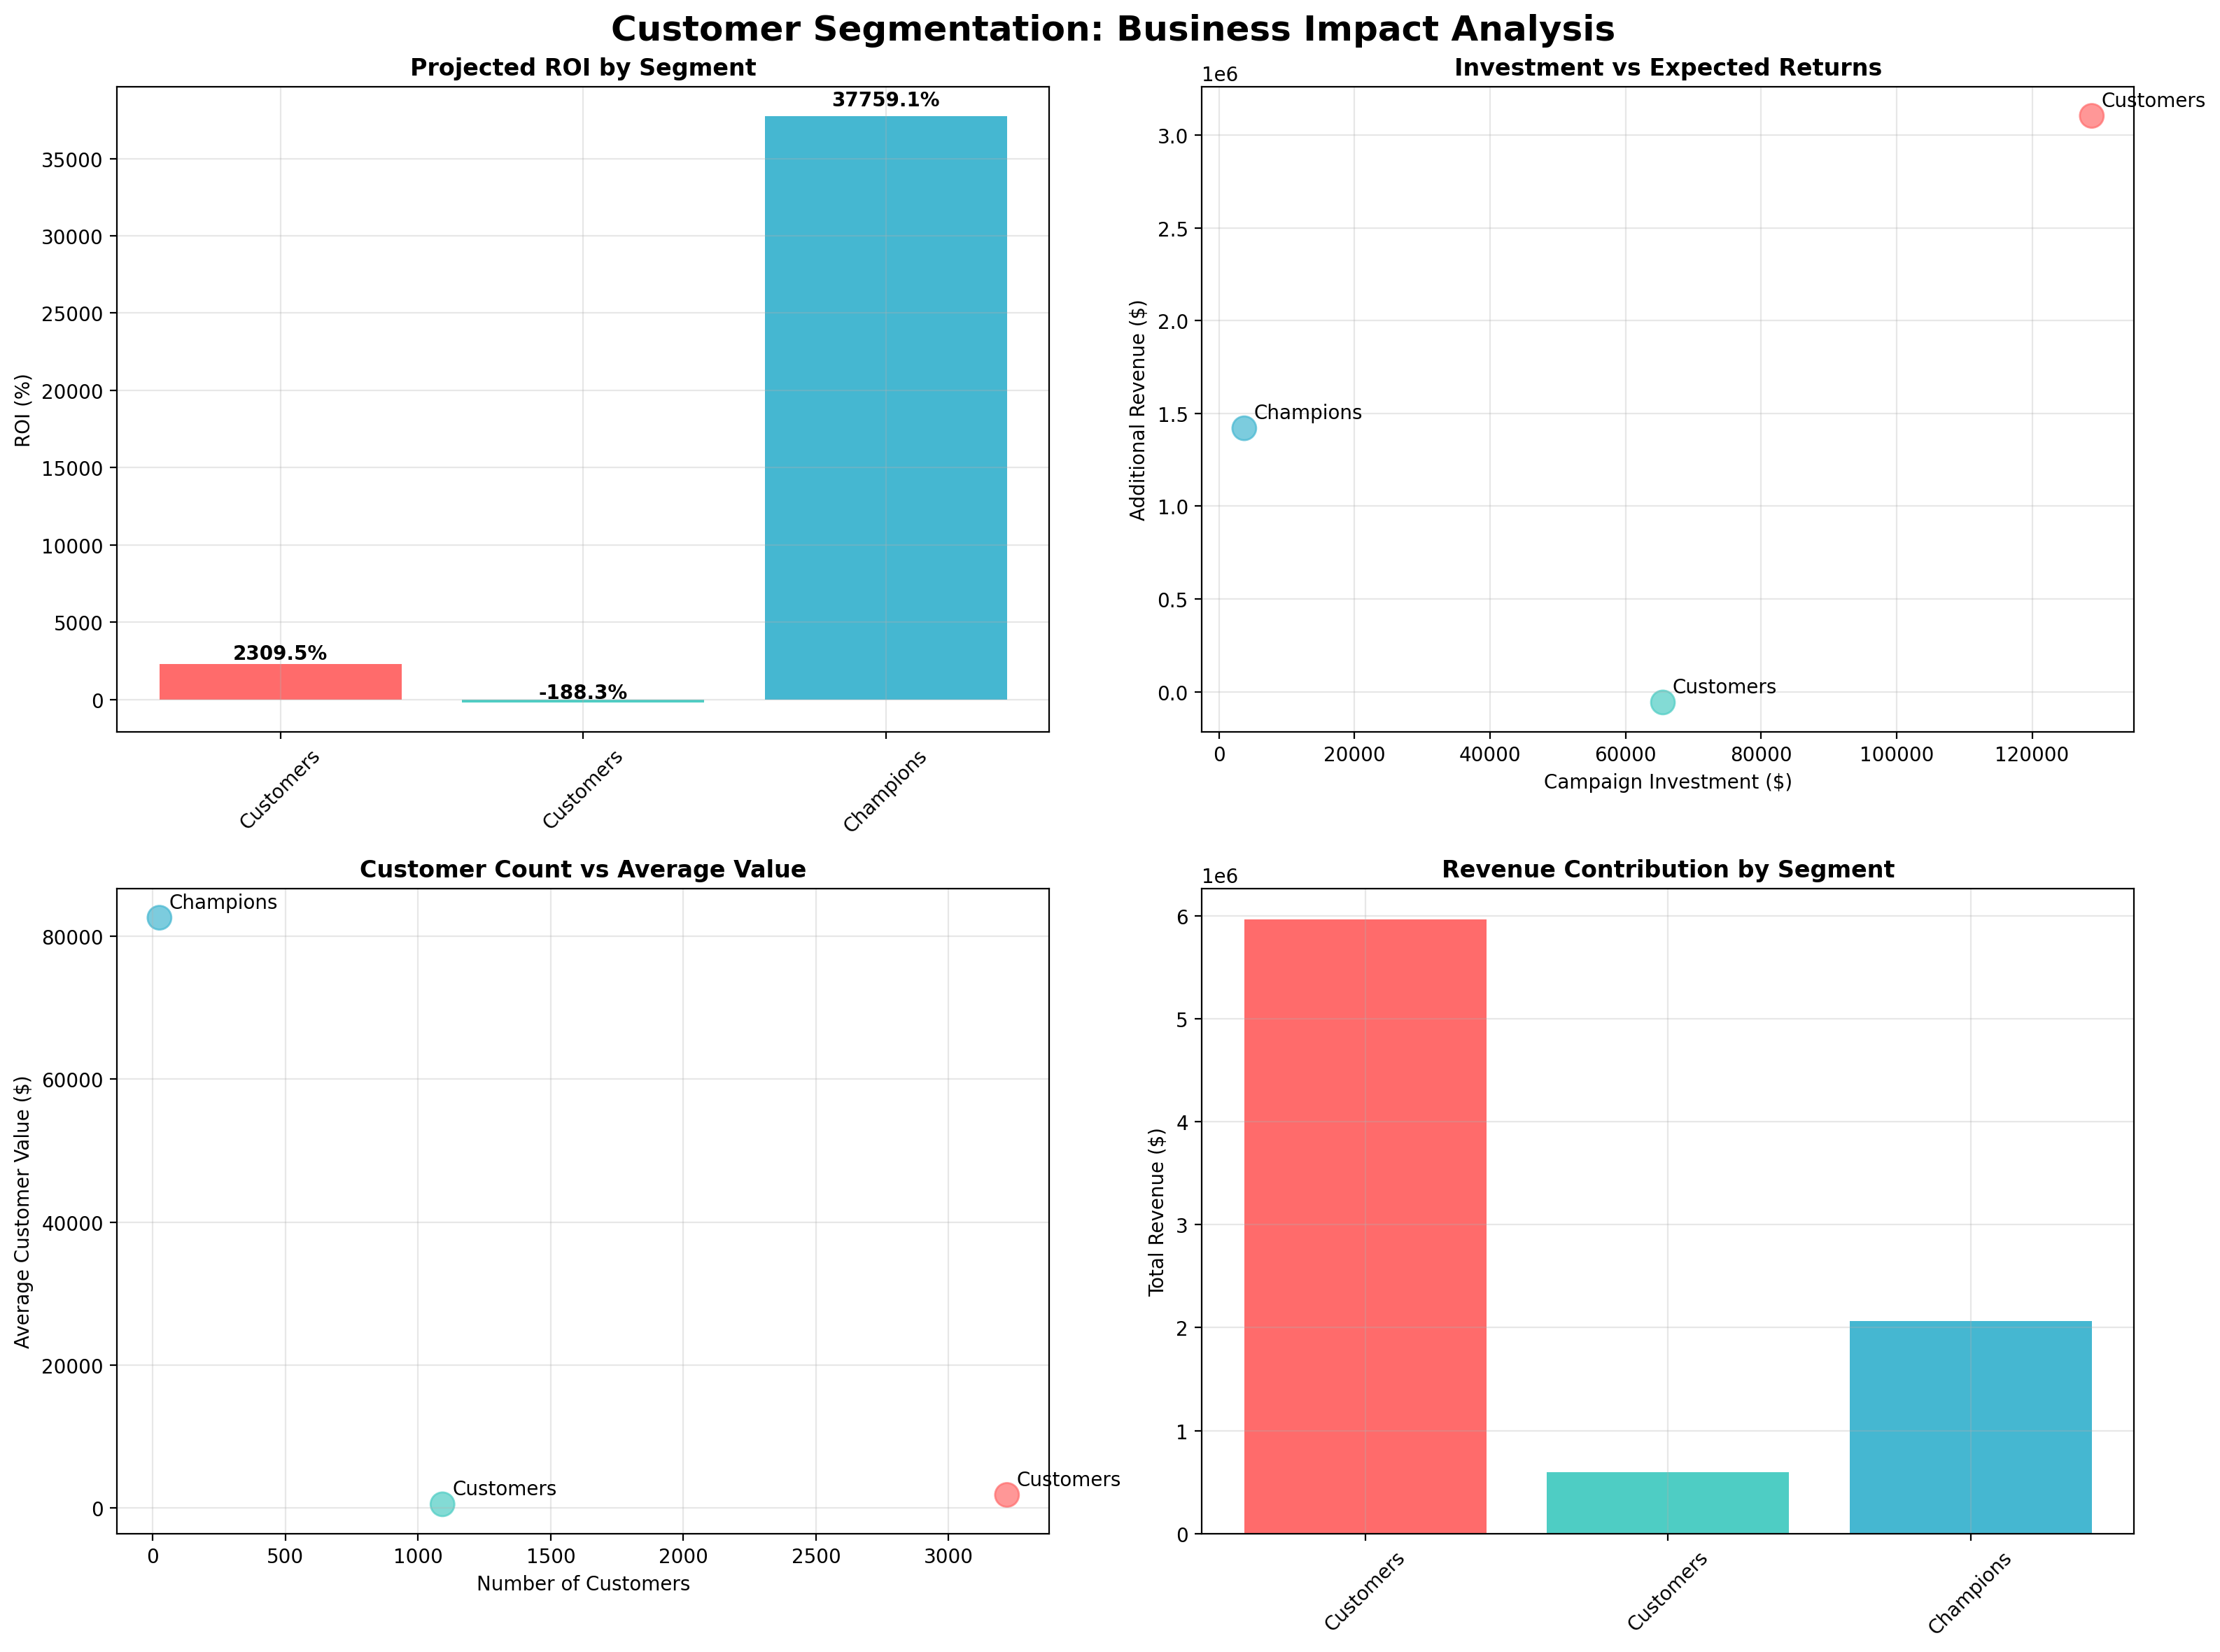

In [48]:
# 3. Business Impact and ROI Projections
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation: Business Impact Analysis', fontsize=18, fontweight='bold')

# ROI by segment
segments = list(roi_projections.keys())
roi_values = [roi_projections[seg]['ROI_Percentage'] for seg in segments]
bars = axes[0,0].bar(range(len(segments)), roi_values, color=colors[:len(segments)])
axes[0,0].set_title('Projected ROI by Segment', fontweight='bold')
axes[0,0].set_ylabel('ROI (%)')
axes[0,0].set_xticks(range(len(segments)))
axes[0,0].set_xticklabels([seg.split(' ')[-1] for seg in segments], rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, roi_values):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                  f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Investment vs Returns
investment = [roi_projections[seg]['Campaign_Cost'] for seg in segments]
returns = [roi_projections[seg]['Additional_Revenue'] for seg in segments]
axes[0,1].scatter(investment, returns, s=150, alpha=0.7, c=colors[:len(segments)])
for i, segment in enumerate(segments):
    axes[0,1].annotate(segment.split(' ')[-1], (investment[i], returns[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[0,1].set_title('Investment vs Expected Returns', fontweight='bold')
axes[0,1].set_xlabel('Campaign Investment ($)')
axes[0,1].set_ylabel('Additional Revenue ($)')
axes[0,1].grid(True, alpha=0.3)

# Customer distribution and value
customer_counts = [len(enhanced_rfm_clustered[enhanced_rfm_clustered['SegmentName'] == seg]) for seg in segments]
avg_values = [enhanced_rfm_clustered[enhanced_rfm_clustered['SegmentName'] == seg]['Monetary'].mean() for seg in segments]
axes[1,0].scatter(customer_counts, avg_values, s=150, alpha=0.7, c=colors[:len(segments)])
for i, segment in enumerate(segments):
    axes[1,0].annotate(segment.split(' ')[-1], (customer_counts[i], avg_values[i]), 
                      xytext=(5, 5), textcoords='offset points', fontsize=10)
axes[1,0].set_title('Customer Count vs Average Value', fontweight='bold')
axes[1,0].set_xlabel('Number of Customers')
axes[1,0].set_ylabel('Average Customer Value ($)')
axes[1,0].grid(True, alpha=0.3)

# Revenue contribution
revenue_contribution = [enhanced_rfm_clustered[enhanced_rfm_clustered['SegmentName'] == seg]['Monetary'].sum() for seg in segments]
axes[1,1].bar(range(len(segments)), revenue_contribution, color=colors[:len(segments)])
axes[1,1].set_title('Revenue Contribution by Segment', fontweight='bold')
axes[1,1].set_ylabel('Total Revenue ($)')
axes[1,1].set_xticks(range(len(segments)))
axes[1,1].set_xticklabels([seg.split(' ')[-1] for seg in segments], rotation=45)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/business_impact_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


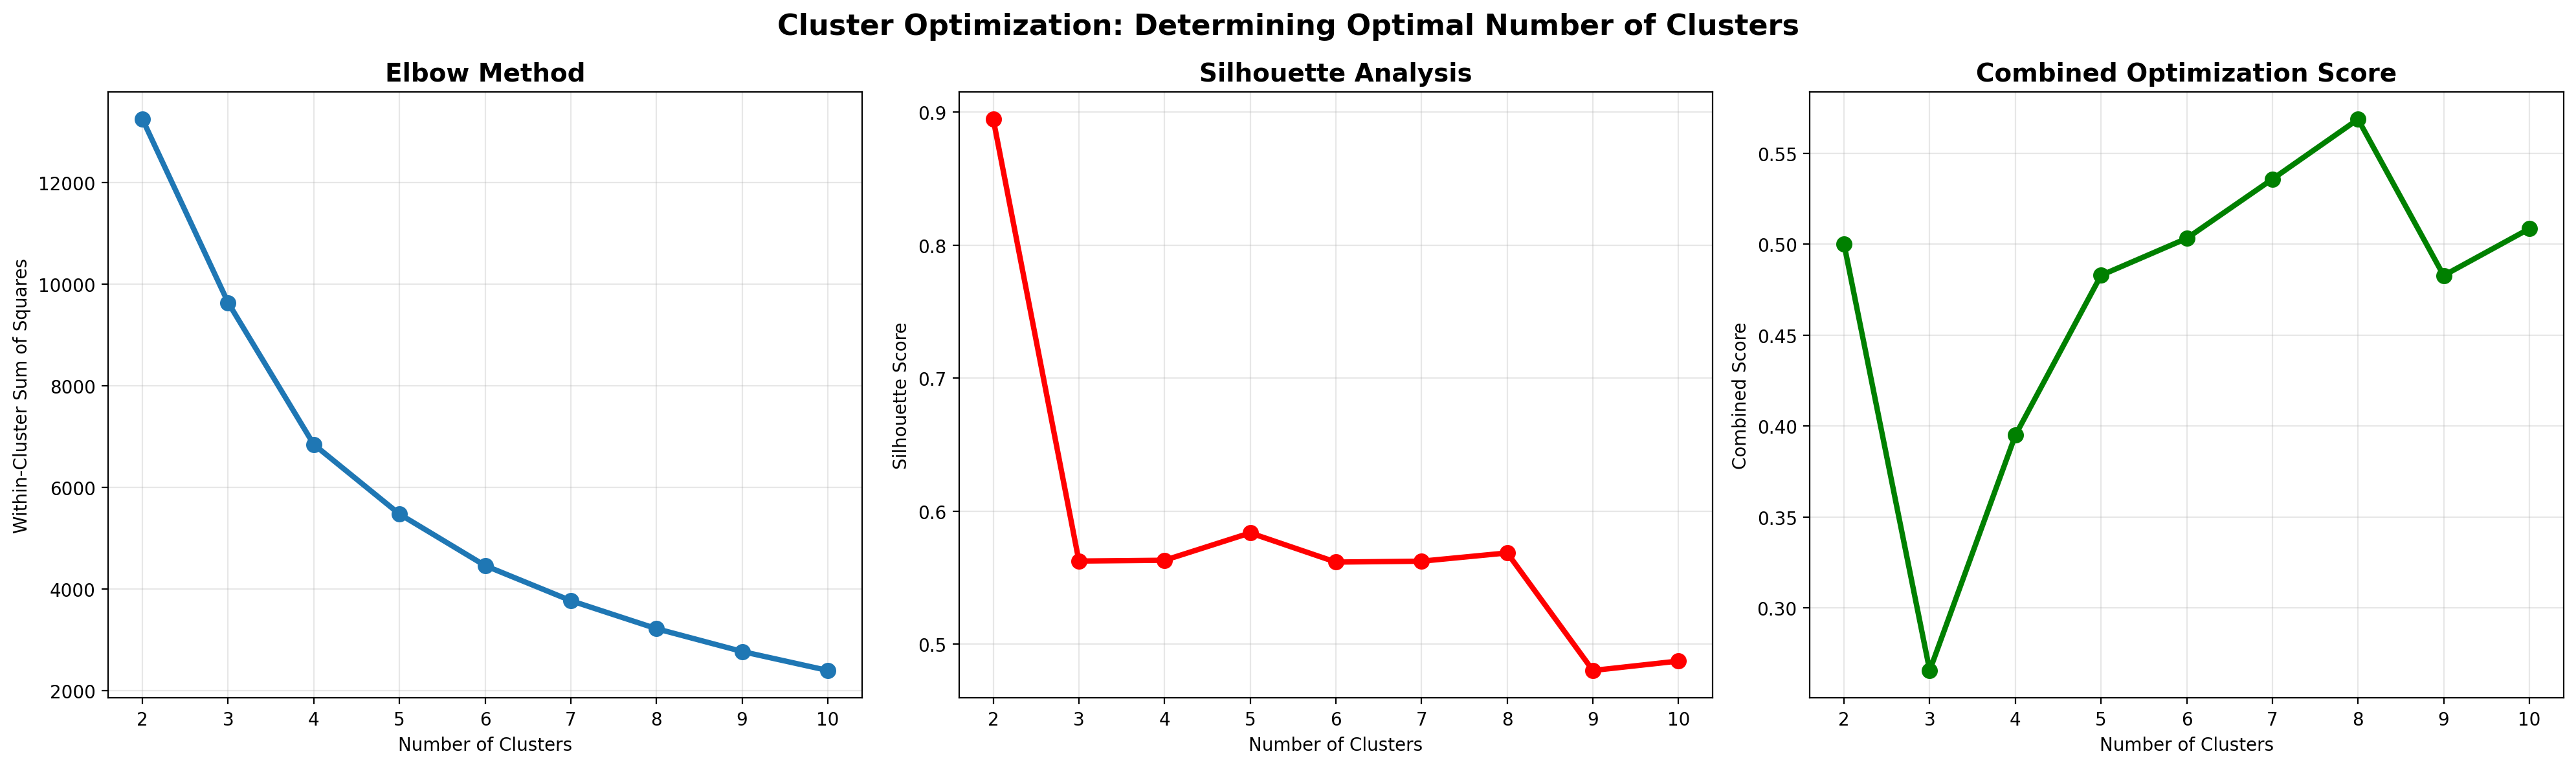

In [49]:
# 4. Cluster Optimization Analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Cluster Optimization: Determining Optimal Number of Clusters', fontsize=16, fontweight='bold')

# Elbow curve
axes[0].plot(cluster_range, inertias, marker='o', linewidth=3, markersize=8)
axes[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Within-Cluster Sum of Squares')
axes[0].grid(True, alpha=0.3)

# Silhouette scores
axes[1].plot(cluster_range, silhouette_scores, marker='o', linewidth=3, markersize=8, color='red')
axes[1].set_title('Silhouette Analysis', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True, alpha=0.3)

# Combined optimization
norm_inertias = 1 - (np.array(inertias) - min(inertias)) / (max(inertias) - min(inertias))
norm_silhouette = (np.array(silhouette_scores) - min(silhouette_scores)) / (max(silhouette_scores) - min(silhouette_scores))
combined_score = (norm_inertias + norm_silhouette) / 2

axes[2].plot(cluster_range, combined_score, marker='o', linewidth=3, markersize=8, color='green')
axes[2].set_title('Combined Optimization Score', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Combined Score')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualizations/cluster_optimization.png', dpi=300, bbox_inches='tight')
plt.show()


In [51]:
# In your Jupyter notebook, add this cell to save your data:
# Save the final customer segmentation data for the dashboard
enhanced_rfm_clustered.to_csv('customer_segments_final.csv', index=False)
print("✅ Data saved for Streamlit dashboard!")

# Also save to the app directory if it exists
if os.path.exists('app/'):
    enhanced_rfm_clustered.to_csv('app/customer_segments_final.csv', index=False)
    print("✅ Data also saved to app directory!")


✅ Data saved for Streamlit dashboard!
